# 1.Imports


## Importamos las librerias

In [299]:
import sys
import os

import numpy as np # Arrays
import pandas as pd # Series and Dataframes

import matplotlib.pyplot as plt
import seaborn as sns # Advanced Plotting
#from google.colab import files
# from google.colab import drive


pd.options.display.max_rows = 100
plt.style.use('ggplot') # Beautify Plots

In [300]:
from pandas import json_normalize
from scipy import stats
from datetime import datetime
from sklearn import model_selection
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import export_graphviz
#import lightgbm as lgb

In [301]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # mstplotlib styles scelglire lo stile
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import chi2_contingency
from pandas import json_normalize
from scipy import stats
from datetime import datetime
from sklearn import model_selection
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import export_graphviz
#import lightgbm as lgb
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import preprocessing #
from sklearn.tree import export_graphviz
import graphviz
#from sklearn.model_selection import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold

##Importamos el archivo csv

In [302]:
url = "https://www.dropbox.com/scl/fi/uvv7j1bragzqkz9zwyvj0/sample_mmp.csv?rlkey=i0mlaxzq6e3blblfu9mhrdpsm&e=1&dl=1"
df= pd.read_csv(url, low_memory=False)

# 2. Data Understanding

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

Nuestro Dataset cuenta con 500.000 Filas y 84 columnas.

*   54 Columns numericas.
*   30 Columns categóricas.

Nuestro TARGET es la columna "HasDetections" que es una variabile booleana. Notamos de el database esta casi perfectamente balanceado con un 50% de 1 y de 0 y sin nulos. No hay otra variable Target

In [304]:
# Eliminaremos el índice por defecto
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [305]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 83 entries, MachineIdentifier to HasDetections
dtypes: float64(36), int64(17), object(30)
memory usage: 316.6+ MB


In [306]:
df.shape[0]

500000

In [307]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 83 entries, MachineIdentifier to HasDetections
dtypes: float64(36), int64(17), object(30)
memory usage: 316.6+ MB


In [308]:
# Chequeamos si contamos con Duplicados
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())

Empty DataFrame
Columns: [MachineIdentifier, ProductName, EngineVersion, AppVersion, AvSigVersion, IsBeta, RtpStateBitfield, IsSxsPassiveMode, DefaultBrowsersIdentifier, AVProductStatesIdentifier, AVProductsInstalled, AVProductsEnabled, HasTpm, CountryIdentifier, CityIdentifier, OrganizationIdentifier, GeoNameIdentifier, LocaleEnglishNameIdentifier, Platform, Processor, OsVer, OsBuild, OsSuite, OsPlatformSubRelease, OsBuildLab, SkuEdition, IsProtected, AutoSampleOptIn, PuaMode, SMode, IeVerIdentifier, SmartScreen, Firewall, UacLuaenable, Census_MDC2FormFactor, Census_DeviceFamily, Census_OEMNameIdentifier, Census_OEMModelIdentifier, Census_ProcessorCoreCount, Census_ProcessorManufacturerIdentifier, Census_ProcessorModelIdentifier, Census_ProcessorClass, Census_PrimaryDiskTotalCapacity, Census_PrimaryDiskTypeName, Census_SystemVolumeTotalCapacity, Census_HasOpticalDiskDrive, Census_TotalPhysicalRAM, Census_ChassisTypeName, Census_InternalPrimaryDiagonalDisplaySizeInInches, Census_InternalPrimaryDisplayResolutionHorizontal, Census_InternalPrimaryDisplayResolutionVertical, Census_PowerPlatformRoleName, Census_InternalBatteryType, Census_InternalBatteryNumberOfCharges, Census_OSVersion, Census_OSArchitecture, Census_OSBranch, Census_OSBuildNumber, Census_OSBuildRevision, Census_OSEdition, Census_OSSkuName, Census_OSInstallTypeName, Census_OSInstallLanguageIdentifier, Census_OSUILocaleIdentifier, Census_OSWUAutoUpdateOptionsName, Census_IsPortableOperatingSystem, Census_GenuineStateName, Census_ActivationChannel, Census_IsFlightingInternal, Census_IsFlightsDisabled, Census_FlightRing, Census_ThresholdOptIn, Census_FirmwareManufacturerIdentifier, Census_FirmwareVersionIdentifier, Census_IsSecureBootEnabled, Census_IsWIMBootEnabled, Census_IsVirtualDevice, Census_IsTouchEnabled, Census_IsPenCapable, Census_IsAlwaysOnAlwaysConnectedCapable, Wdft_IsGamer, Wdft_RegionIdentifier, HasDetections]
Index: []

[0 rows x 83 columns]

In [309]:
# Seleccionamos como índice el identificador de dispositivo

df.set_index('MachineIdentifier', inplace = True)

In [310]:
df.shape[0]

500000

In [311]:
#Definimos el TARGET
target = 'HasDetections'

In [312]:
# Chequeamos la distribución del Target
df["HasDetections"].value_counts()

HasDetections
0    250047
1    249953
Name: count, dtype: int64

In [313]:
# El Target no tiene Nulos
df["HasDetections"].isna().sum()

0

In [314]:
#Vamos a organizar las variables segun tipo de columna para hacer mas facil el Data Cleaning

def lista_variables(dataset):
    variables_numericas=[]
    variables_boolean=[]
    variables_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
               variables_numericas.append(i)
        elif  (dataset[i].dtype.kind=="b" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              variables_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              variables_categoricas.append(i)

    return variables_numericas, variables_boolean,variables_categoricas

In [315]:
var_num, var_bool, var_cat= lista_variables(df)

In [316]:
var_num

['RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled

In [317]:
var_cat

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [318]:
var_bool

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

#3. Data Cleaning reduccion de la dimensionalidad de las variables

En esto apartado vamos a:

1.   Eliminar las columnas con una cantidad importante de nulos.
2.   Eliminar las columnas que no tienen variabilidad.
3.   Eliminar las columnas de tipo numerico con una importante correlation entre ellas.
4.   Reducir la dimensionalidad de las variables de tipo object en vista de OHE.


## 3.1 Eliminacion de las variables con cantidad importante de nulos

In [319]:
df.isna().sum()

ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AvSigVersion                                              0
IsBeta                                                    0
RtpStateBitfield                                       1832
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            475939
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
Platform                                                  0
Processor                                                 0
OsVer                                                     0
OsBuild                                                   0
OsSuite                                                   0
OsPlatformSubRelease                                      0
OsBuildLab                                                1
SkuEdition                                                0
IsProtected                                            1926
AutoSampleOptIn                                           0
PuaMode                                              499874
SMode                                                 29848
IeVerIdentifier                                        3209
SmartScreen                                          178596
Firewall                                               5162
UacLuaenable                                            623
Census_MDC2FormFactor                                     0
Census_DeviceFamily                                       0
Census_OEMNameIdentifier                               5381
Census_OEMModelIdentifier                              5764
Census_ProcessorCoreCount                              2347
Census_ProcessorManufacturerIdentifier                 2347
Census_ProcessorModelIdentifier                        2349
Census_ProcessorClass                                497918
Census_PrimaryDiskTotalCapacity                        2976
Census_PrimaryDiskTypeName                              709
Census_SystemVolumeTotalCapacity                       2976
Census_HasOpticalDiskDrive                                0
Census_TotalPhysicalRAM                                4556
Census_ChassisTypeName                                   37
Census_InternalPrimaryDiagonalDisplaySizeInInches      2654
Census_InternalPrimaryDisplayResolutionHorizontal      2650
Census_InternalPrimaryDisplayResolutionVertical        2650
Census_PowerPlatformRoleName                              2
Census_InternalBatteryType                           355603
Census_InternalBatteryNumberOfCharges                 15038
Census_OSVersion                                          0
Census_OSArchitecture                                     0
Census_OSBranch                                           0
Census_OSBuildNumber                                      0
Census_OSBuildRevision                                    0
Census_OSEdition                                          0
Census_OSSkuName                                          0
Census_OSInstallTypeName                                  0
Census_OSInstallLanguageIdentifier                     3332
Census_OSUILocaleIdentifier                               0
Census_OSWUAutoUpdateOptionsName                          0
Census_IsPortableOperatingSystem                          0
Census_GenuineStateName                                   0
Census_ActivationChannel                

Contamos con diversas columnas cuyo total de nulos es muy alto. Procedemos a agrupar y eliminar las variables con mas de 200,000 nulos

In [320]:
df_nul=pd.DataFrame(df.isna().sum())

In [321]:
list_nul=df_nul[df_nul[0] > 200000].index.tolist()
list_nul

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [322]:
df.drop(list_nul, axis=1, inplace=True)

##3.2 Variables numéricas y booleanas

In [323]:
df.describe(include=np.number).T

count             mean  \
IsBeta                                            500,000.00             0.00   
RtpStateBitfield                                  498,168.00             6.85   
IsSxsPassiveMode                                  500,000.00             0.02   
AVProductStatesIdentifier                         498,062.00        47,850.91   
AVProductsInstalled                               498,062.00             1.33   
AVProductsEnabled                                 498,062.00             1.02   
HasTpm                                            500,000.00             0.99   
CountryIdentifier                                 500,000.00           108.04   
CityIdentifier                                    481,760.00        81,271.65   
OrganizationIdentifier                            345,437.00            24.87   
GeoNameIdentifier                                 499,984.00           169.73   
LocaleEnglishNameIdentifier                       500,000.00           122.61   
OsBuild                                           500,000.00        15,726.93   
OsSuite                                           500,000.00           574.72   
IsProtected                                       498,074.00             0.95   
AutoSampleOptIn                                   500,000.00             0.00   
SMode                                             470,152.00             0.00   
IeVerIdentifier                                   496,791.00           126.66   
Firewall                                          494,838.00             0.98   
UacLuaenable                                      499,377.00            13.73   
Census_OEMNameIdentifier                          494,619.00         2,218.65   
Census_OEMModelIdentifier                         494,236.00       239,128.05   
Census_ProcessorCoreCount                         497,653.00             3.99   
Census_ProcessorManufacturerIdentifier            497,653.00             4.53   
Census_ProcessorModelIdentifier                   497,651.00         2,370.99   
Census_PrimaryDiskTotalCapacity                   497,024.00       514,043.32   
Census_SystemVolumeTotalCapacity                  497,024.00       378,054.64   
Census_HasOpticalDiskDrive                        500,000.00             0.08   
Census_TotalPhysicalRAM                           495,444.00         6,129.23   
Census_InternalPrimaryDiagonalDisplaySizeInInches 497,346.00            16.69   
Census_InternalPrimaryDisplayResolutionHorizontal 497,350.00         1,548.30   
Census_InternalPrimaryDisplayResolutionVertical   497,350.00           898.24   
Census_InternalBatteryNumberOfCharges             484,962.00 1,125,600,150.21   
Census_OSBuildNumber                              500,000.00        15,841.37   
Census_OSBuildRevision                            500,000.00           967.22   
Census_OSInstallLanguageIdentifier                496,668.00            14.61   
Census_OSUILocaleIdentifier                       500,000.00            60.45   
Census_IsPortableOperatingSystem                  500,000.00             0.00   
Census_IsFlightsDisabled                          491,067.00             0.00   
Census_FirmwareManufacturerIdentifier             489,651.00           402.68   
Census_FirmwareVersionIdentifier                  490,939.00        33,030.99   
Census_IsSecureBootEnabled                        500,000.00             0.49   
Census_IsVirtualDevice                            499,099.00             0.01   
Census_IsTouchEnabled                             500,000.00             0.13   
Census_IsPenCapable                               500,000.00             0.04   
Census_IsAlwaysOnAlwaysConnectedCapable           495,960.00             0.06   
Wdft_IsGamer                                      483,050.00             0.28   
Wdft_RegionIdentifier                             483,050.00             7.89   
HasDetections                                     500,000.00             0.50   

    

Analizando el contenido de cada variabile numerica detectamos que hay unas cuantas variables que deberían de ser categóricas

In [324]:
df.describe(exclude="object").columns

Index(['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected',
       'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'Firewall',
       'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber',
       'Census_OSBui

In [325]:
list_field_NUM_CAT= ['AVProductStatesIdentifier', 'AVProductsInstalled',
       'AVProductsEnabled', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite',
       'IeVerIdentifier',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier','Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier',
       'Census_SystemVolumeTotalCapacity',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber','Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier',
       'Census_OSUILocaleIdentifier', 'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier',
       'Wdft_IsGamer','Wdft_RegionIdentifier']

In [326]:
# Cambiamos estos campos de tipo numérico a categórico
df[list_field_NUM_CAT]=df[list_field_NUM_CAT].astype("object")

In [327]:
df.describe(include=np.number).columns

Index(['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'HasTpm',
       'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'UacLuaenable',
       'Census_PrimaryDiskTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled',
       'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice',
       'Census_IsTouchEnabled', 'Census_IsPenCapable',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'HasDetections'],
      dtype='object')

In [328]:
df_num_statistics= pd.DataFrame(df.describe(exclude="object").T)
df_num_statistics

count       mean  \
IsBeta                                            500,000.00       0.00   
RtpStateBitfield                                  498,168.00       6.85   
IsSxsPassiveMode                                  500,000.00       0.02   
HasTpm                                            500,000.00       0.99   
IsProtected                                       498,074.00       0.95   
AutoSampleOptIn                                   500,000.00       0.00   
SMode                                             470,152.00       0.00   
Firewall                                          494,838.00       0.98   
UacLuaenable                                      499,377.00      13.73   
Census_PrimaryDiskTotalCapacity                   497,024.00 514,043.32   
Census_HasOpticalDiskDrive                        500,000.00       0.08   
Census_TotalPhysicalRAM                           495,444.00   6,129.23   
Census_InternalPrimaryDiagonalDisplaySizeInInches 497,346.00      16.69   
Census_InternalPrimaryDisplayResolutionHorizontal 497,350.00   1,548.30   
Census_InternalPrimaryDisplayResolutionVertical   497,350.00     898.24   
Census_IsPortableOperatingSystem                  500,000.00       0.00   
Census_IsFlightsDisabled                          491,067.00       0.00   
Census_IsSecureBootEnabled                        500,000.00       0.49   
Census_IsVirtualDevice                            499,099.00       0.01   
Census_IsTouchEnabled                             500,000.00       0.13   
Census_IsPenCapable                               500,000.00       0.04   
Census_IsAlwaysOnAlwaysConnectedCapable           495,960.00       0.06   
HasDetections                                     500,000.00       0.50   

                                                         std       min  \
IsBeta                                                  0.00      0.00   
RtpStateBitfield                                        1.02      0.00   
IsSxsPassiveMode                                        0.13      0.00   
HasTpm                                                  0.11      0.00   
IsProtected                                             0.23      0.00   
AutoSampleOptIn                                         0.01      0.00   
SMode                                                   0.02      0.00   
Firewall                                                0.15      0.00   
UacLuaenable                                        8,995.85      0.00   
Census_PrimaryDiskTotalCapacity                   370,446.82 10,240.00   
Census_HasOpticalDiskDrive                              0.27      0.00   
Census_TotalPhysicalRAM                             4,964.52    512.00   
Census_InternalPrimaryDiagonalDisplaySizeInInches       5.93      4.90   
Census_InternalPrimaryDisplayResolutionHorizontal     368.57     -1.00   
Census_InternalPrimaryDisplayResolutionVertical       214.86     -1.00   
Census_IsPortableOperatingSystem                        0.02      0.00   
Census_IsFlightsDisabled                                0.00      0.00   
Census_IsSecureBootEnabled                              0.50      0.00   
Census_IsVirtualDevice                                  0.08      0.00   
Census_IsTouchEnabled                                   0.33      0.00   
Census_IsPenCapable                                     0.19      0.00   
Census_IsAlwaysOnAlwaysConnectedCapable                 0.23      0.00   
HasDetections                                           0.50      0.00   

                                                         25%        50%  \
IsBeta                                                  0.00       0.00   
RtpStateBitfield                                        7.00       7.00   
IsSxsPassiveMode                                        0.00       0.00   
HasTpm                                                  1.00       1.00   
IsProtected                                             1.00       1.00   
AutoSampleOptIn            

### 3.2.1 Identificamos las variables sin variabilidad

In [329]:
constant_columns = [columns for columns in df_num_statistics.columns if df_num_statistics[columns].nunique(dropna=False) == 1]
constant_columns

[]

No hay variables con un solo valor, pero hay variable con muy poca variabilidad.

Verificamos si hay varibales con muy poca variabilidad. Creamos una lista de variables numéricas y booleanas si variabilidad.

In [330]:
List_Num_Baja_Variabilidad = df_num_statistics[(df_num_statistics["min"] == 0)&(df_num_statistics["25%"] == 0)&(df_num_statistics["50%"] == 0)&(df_num_statistics["75%"] == 0)].index.tolist()

In [331]:
List_Bool_Baja_Variabilidad = df_num_statistics[(df_num_statistics["min"] == 1.0)&(df_num_statistics["25%"] == 1.0)&(df_num_statistics["50%"] == 1.0)&(df_num_statistics["75%"] == 1.0)].index.tolist()

In [332]:
List_Num_Baja_Variabilidad

['IsBeta',
 'IsSxsPassiveMode',
 'AutoSampleOptIn',
 'SMode',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable']

In [333]:
List_Bool_Baja_Variabilidad

[]

In [334]:
#Correlacion entre variables con poca variabilidad
df_Num_Baja_Variabilidad = df[List_Num_Baja_Variabilidad]
df_Num_Baja_Variabilidad

IsBeta  IsSxsPassiveMode  AutoSampleOptIn  \
MachineIdentifier                                                             
f1cd864e97bae82bdf96523e1a539121       0                 0                0   
fd5ba6f5b75325ec0423a6c67cc75942       0                 0                0   
4e628391e7cc7c482fb3286f486dbd25       0                 0                0   
270a2e9d028144a4df12a9e3da79fba5       0                 0                0   
06ca8fa8d32c2abdc5b3577d676b3269       0                 0                0   
...                                  ...               ...              ...   
a739cacc292f3f1e745827c1ca6c6ada       0                 0                0   
a4c232d528d98343e8f1b73650da7b82       0                 0                0   
fd16cd542d660848d272e4552bcccb1e       0                 0                0   
fa0841f8f6147de7c3d287e05270ed42       0                 0                0   
7b45dc3537e17f16305c5983ca0a1cb9       0                 0                0   

                                  SMode  Census_HasOpticalDiskDrive  \
MachineIdentifier                                                     
f1cd864e97bae82bdf96523e1a539121   0.00                           0   
fd5ba6f5b75325ec0423a6c67cc75942   0.00                           0   
4e628391e7cc7c482fb3286f486dbd25   0.00                           0   
270a2e9d028144a4df12a9e3da79fba5   0.00                           0   
06ca8fa8d32c2abdc5b3577d676b3269   0.00                           0   
...                                 ...                         ...   
a739cacc292f3f1e745827c1ca6c6ada   0.00                           0   
a4c232d528d98343e8f1b73650da7b82   0.00                           0   
fd16cd542d660848d272e4552bcccb1e   0.00                           0   
fa0841f8f6147de7c3d287e05270ed42   0.00                           0   
7b45dc3537e17f16305c5983ca0a1cb9   0.00                           0   

                                  Census_IsPortableOperatingSystem  \
MachineIdentifier                                                    
f1cd864e97bae82bdf96523e1a539121                                 0   
fd5ba6f5b75325ec0423a6c67cc75942                                 0   
4e628391e7cc7c482fb3286f486dbd25                                 0   
270a2e9d028144a4df12a9e3da79fba5                                 0   
06ca8fa8d32c2abdc5b3577d676b3269                                 0   
...                                                            ...   
a739cacc292f3f1e745827c1ca6c6ada                                 0   
a4c232d528d98343e8f1b73650da7b82                                 0   
fd16cd542d660848d272e4552bcccb1e                                 0   
fa0841f8f6147de7c3d287e05270ed42                                 0   
7b45dc3537e17f16305c5983ca0a1cb9                                 0   

                                  Census_IsFlightsDisabled  \
MachineIdentifier                                            
f1cd864e97bae82bdf96523e1a539121                      0.00   
fd5ba6f5b75325ec0423a6c67cc75942                      0.00   
4e628391e7cc7c482fb3286f486dbd25                      0.00   
270a2e9d028144a4df12a9e3da79fba5                      0.00   
06ca8fa8d32c2abdc5b3577d676b3269                      0.00   
...                                                    ...   
a739cacc292f3f1e745827c1ca6c6ada                      0.00   
a4c232d528d98343e8f1b73650da7b82                      0.00   
fd16cd542d660848d272e4552bcccb1e                      0.00   
fa0841f8f6147de7c3d287e05270ed42                      0.00   
7b45dc3537e17f16305c5983ca0a1cb9                      0.00   

                                  Census_IsVirtualDevice  \
MachineIdentifier                                          
f1cd864e97bae82bdf96523e1a539121                    0.00   
fd5ba6f5b75325ec0423a6c67cc75942                    0.00   
4e628391e7cc7c482fb3286f486dbd25                    0.00   
270a2e9d028144a4df12a9e3da79fba5                    0.00   
06ca

In [335]:
#Analizamos las variables con poca variabilidad con el target con una correlacíon
df_Num_Baja_Variabilidad ["Target"] = df["HasDetections"]

<ipython-input-335-905be62c7fd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Num_Baja_Variabilidad ["Target"] = df["HasDetections"]


In [336]:
df_Num_Baja_Variabilidad.head().T

MachineIdentifier                        f1cd864e97bae82bdf96523e1a539121  \
IsBeta                                                               0.00   
IsSxsPassiveMode                                                     0.00   
AutoSampleOptIn                                                      0.00   
SMode                                                                0.00   
Census_HasOpticalDiskDrive                                           0.00   
Census_IsPortableOperatingSystem                                     0.00   
Census_IsFlightsDisabled                                             0.00   
Census_IsVirtualDevice                                               0.00   
Census_IsTouchEnabled                                                0.00   
Census_IsPenCapable                                                  0.00   
Census_IsAlwaysOnAlwaysConnectedCapable                              0.00   
Target                                                               1.00   

MachineIdentifier                        fd5ba6f5b75325ec0423a6c67cc75942  \
IsBeta                                                               0.00   
IsSxsPassiveMode                                                     0.00   
AutoSampleOptIn                                                      0.00   
SMode                                                                0.00   
Census_HasOpticalDiskDrive                                           0.00   
Census_IsPortableOperatingSystem                                     0.00   
Census_IsFlightsDisabled                                             0.00   
Census_IsVirtualDevice                                               0.00   
Census_IsTouchEnabled                                                0.00   
Census_IsPenCapable                                                  0.00   
Census_IsAlwaysOnAlwaysConnectedCapable                              0.00   
Target                                                               0.00   

MachineIdentifier                        4e628391e7cc7c482fb3286f486dbd25  \
IsBeta                                                               0.00   
IsSxsPassiveMode                                                     0.00   
AutoSampleOptIn                                                      0.00   
SMode                                                                0.00   
Census_HasOpticalDiskDrive                                           0.00   
Census_IsPortableOperatingSystem                                     0.00   
Census_IsFlightsDisabled                                             0.00   
Census_IsVirtualDevice                                               0.00   
Census_IsTouchEnabled                                                1.00   
Census_IsPenCapable                                                  1.00   
Census_IsAlwaysOnAlwaysConnectedCapable                              0.00   
Target                                                               0.00   

MachineIdentifier                        270a2e9d028144a4df12a9e3da79fba5  \
IsBeta                                                               0.00   
IsSxsPassiveMode                                                     0.00   
AutoSampleOptIn                                                      0.00   
SMode                                                                0.00   
Census_HasOpticalDiskDrive                                           0.00   
Census_IsPortableOperatingSystem                                     0.00   
Census_IsFlightsDisabled                                             0.00   
Census_IsVirtualDevice                                               0.00   
Census_IsTouchEnabled                                                0.00   
Census_IsPenCapable                                                  0.00   
Census_IsAlwaysOnAlwaysConnectedCapable                              0.00   
Target                                                               1

In [337]:
df_Num_Corr=df_Num_Baja_Variabilidad.corr()
df_Num_Corr.style.background_gradient(cmap='coolwarm')

In [338]:
df_Num_Corr ["Target"].sort_values(ascending=False)

Target                                     1.00
Census_HasOpticalDiskDrive                 0.02
Census_IsPortableOperatingSystem           0.00
AutoSampleOptIn                            0.00
IsBeta                                    -0.00
Census_IsFlightsDisabled                  -0.00
SMode                                     -0.01
Census_IsPenCapable                       -0.02
IsSxsPassiveMode                          -0.03
Census_IsTouchEnabled                     -0.04
Census_IsVirtualDevice                    -0.05
Census_IsAlwaysOnAlwaysConnectedCapable   -0.06
Name: Target, dtype: float64

Notamos que no hay correlacion entra las variables con poca variabilidad y el target.

In [339]:
df.drop(List_Bool_Baja_Variabilidad, axis=1, inplace=True)

In [340]:
df.describe(exclude="object").T

count       mean  \
IsBeta                                            500,000.00       0.00   
RtpStateBitfield                                  498,168.00       6.85   
IsSxsPassiveMode                                  500,000.00       0.02   
HasTpm                                            500,000.00       0.99   
IsProtected                                       498,074.00       0.95   
AutoSampleOptIn                                   500,000.00       0.00   
SMode                                             470,152.00       0.00   
Firewall                                          494,838.00       0.98   
UacLuaenable                                      499,377.00      13.73   
Census_PrimaryDiskTotalCapacity                   497,024.00 514,043.32   
Census_HasOpticalDiskDrive                        500,000.00       0.08   
Census_TotalPhysicalRAM                           495,444.00   6,129.23   
Census_InternalPrimaryDiagonalDisplaySizeInInches 497,346.00      16.69   
Census_InternalPrimaryDisplayResolutionHorizontal 497,350.00   1,548.30   
Census_InternalPrimaryDisplayResolutionVertical   497,350.00     898.24   
Census_IsPortableOperatingSystem                  500,000.00       0.00   
Census_IsFlightsDisabled                          491,067.00       0.00   
Census_IsSecureBootEnabled                        500,000.00       0.49   
Census_IsVirtualDevice                            499,099.00       0.01   
Census_IsTouchEnabled                             500,000.00       0.13   
Census_IsPenCapable                               500,000.00       0.04   
Census_IsAlwaysOnAlwaysConnectedCapable           495,960.00       0.06   
HasDetections                                     500,000.00       0.50   

                                                         std       min  \
IsBeta                                                  0.00      0.00   
RtpStateBitfield                                        1.02      0.00   
IsSxsPassiveMode                                        0.13      0.00   
HasTpm                                                  0.11      0.00   
IsProtected                                             0.23      0.00   
AutoSampleOptIn                                         0.01      0.00   
SMode                                                   0.02      0.00   
Firewall                                                0.15      0.00   
UacLuaenable                                        8,995.85      0.00   
Census_PrimaryDiskTotalCapacity                   370,446.82 10,240.00   
Census_HasOpticalDiskDrive                              0.27      0.00   
Census_TotalPhysicalRAM                             4,964.52    512.00   
Census_InternalPrimaryDiagonalDisplaySizeInInches       5.93      4.90   
Census_InternalPrimaryDisplayResolutionHorizontal     368.57     -1.00   
Census_InternalPrimaryDisplayResolutionVertical       214.86     -1.00   
Census_IsPortableOperatingSystem                        0.02      0.00   
Census_IsFlightsDisabled                                0.00      0.00   
Census_IsSecureBootEnabled                              0.50      0.00   
Census_IsVirtualDevice                                  0.08      0.00   
Census_IsTouchEnabled                                   0.33      0.00   
Census_IsPenCapable                                     0.19      0.00   
Census_IsAlwaysOnAlwaysConnectedCapable                 0.23      0.00   
HasDetections                                           0.50      0.00   

                                                         25%        50%  \
IsBeta                                                  0.00       0.00   
RtpStateBitfield                                        7.00       7.00   
IsSxsPassiveMode                                        0.00       0.00   
HasTpm                                                  1.00       1.00   
IsProtected                                             1.00       1.00   
AutoSampleOptIn            

In [341]:
df.describe(exclude="object").isnull().sum()

IsBeta                                               0
RtpStateBitfield                                     0
IsSxsPassiveMode                                     0
HasTpm                                               0
IsProtected                                          0
AutoSampleOptIn                                      0
SMode                                                0
Firewall                                             0
UacLuaenable                                         0
Census_PrimaryDiskTotalCapacity                      0
Census_HasOpticalDiskDrive                           0
Census_TotalPhysicalRAM                              0
Census_InternalPrimaryDiagonalDisplaySizeInInches    0
Census_InternalPrimaryDisplayResolutionHorizontal    0
Census_InternalPrimaryDisplayResolutionVertical      0
Census_IsPortableOperatingSystem                     0
Census_IsFlightsDisabled                             0
Census_IsSecureBootEnabled                           0
Census_IsVirtualDevice                               0
Census_IsTouchEnabled                                0
Census_IsPenCapable                                  0
Census_IsAlwaysOnAlwaysConnectedCapable              0
HasDetections                                        0
dtype: int64

Estas son las variables numericas que guardamos.Notamos que no hay nulos

In [342]:
#Analisis correlacion entre variables numericas y target
df_Num_Corr=df.describe(exclude="object").corr()
df_Num_Corr.style.background_gradient(cmap='coolwarm')

In [343]:
df_Num_Corr ["HasDetections"].sort_values(ascending=False)

HasDetections                                        1.00
Census_IsSecureBootEnabled                           1.00
Census_IsTouchEnabled                                1.00
Census_HasOpticalDiskDrive                           1.00
Census_IsAlwaysOnAlwaysConnectedCapable              1.00
Census_IsPenCapable                                  1.00
IsSxsPassiveMode                                     1.00
Census_IsVirtualDevice                               1.00
Census_IsPortableOperatingSystem                     1.00
AutoSampleOptIn                                      1.00
IsBeta                                               1.00
Census_IsFlightsDisabled                             1.00
SMode                                                1.00
IsProtected                                          1.00
Firewall                                             1.00
HasTpm                                               1.00
RtpStateBitfield                                     1.00
Census_InternalPrimaryDiagonalDisplaySizeInInches    1.00
Census_InternalPrimaryDisplayResolutionVertical      1.00
Census_InternalPrimaryDisplayResolutionHorizontal    1.00
Census_TotalPhysicalRAM                              0.75
UacLuaenable                                        -0.07
Census_PrimaryDiskTotalCapacity                     -0.14
Name: HasDetections, dtype: float64

Notamos que todas las variables excepto "UacLuaenable" estan muy correlacionada con la variable target HasDetections. Borramos la variable "UacLuaenable". Como estamos en clasificacion utilizando El Random Forest por el momento no borramos las variables currelacionadas entre ellas.

In [344]:
df.drop(["UacLuaenable"], axis=1, inplace=True)

Volvemos con la funcion para ver la lista de variables numéricas, categóricas y booleanas después de la limpieza

In [345]:
var_num, var_bool, var_cat= lista_variables(df)

In [346]:
var_num

['RtpStateBitfield',
 'IsProtected',
 'SMode',
 'Firewall',
 'Census_PrimaryDiskTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_IsFlightsDisabled',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable']

In [347]:
var_bool

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [348]:
var_cat

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Cens

###3.2.2 Análisis y limpieza de variables numéricas y booleanas.

In [349]:
df.describe(exclude="object").T

count       mean  \
IsBeta                                            500,000.00       0.00   
RtpStateBitfield                                  498,168.00       6.85   
IsSxsPassiveMode                                  500,000.00       0.02   
HasTpm                                            500,000.00       0.99   
IsProtected                                       498,074.00       0.95   
AutoSampleOptIn                                   500,000.00       0.00   
SMode                                             470,152.00       0.00   
Firewall                                          494,838.00       0.98   
Census_PrimaryDiskTotalCapacity                   497,024.00 514,043.32   
Census_HasOpticalDiskDrive                        500,000.00       0.08   
Census_TotalPhysicalRAM                           495,444.00   6,129.23   
Census_InternalPrimaryDiagonalDisplaySizeInInches 497,346.00      16.69   
Census_InternalPrimaryDisplayResolutionHorizontal 497,350.00   1,548.30   
Census_InternalPrimaryDisplayResolutionVertical   497,350.00     898.24   
Census_IsPortableOperatingSystem                  500,000.00       0.00   
Census_IsFlightsDisabled                          491,067.00       0.00   
Census_IsSecureBootEnabled                        500,000.00       0.49   
Census_IsVirtualDevice                            499,099.00       0.01   
Census_IsTouchEnabled                             500,000.00       0.13   
Census_IsPenCapable                               500,000.00       0.04   
Census_IsAlwaysOnAlwaysConnectedCapable           495,960.00       0.06   
HasDetections                                     500,000.00       0.50   

                                                         std       min  \
IsBeta                                                  0.00      0.00   
RtpStateBitfield                                        1.02      0.00   
IsSxsPassiveMode                                        0.13      0.00   
HasTpm                                                  0.11      0.00   
IsProtected                                             0.23      0.00   
AutoSampleOptIn                                         0.01      0.00   
SMode                                                   0.02      0.00   
Firewall                                                0.15      0.00   
Census_PrimaryDiskTotalCapacity                   370,446.82 10,240.00   
Census_HasOpticalDiskDrive                              0.27      0.00   
Census_TotalPhysicalRAM                             4,964.52    512.00   
Census_InternalPrimaryDiagonalDisplaySizeInInches       5.93      4.90   
Census_InternalPrimaryDisplayResolutionHorizontal     368.57     -1.00   
Census_InternalPrimaryDisplayResolutionVertical       214.86     -1.00   
Census_IsPortableOperatingSystem                        0.02      0.00   
Census_IsFlightsDisabled                                0.00      0.00   
Census_IsSecureBootEnabled                              0.50      0.00   
Census_IsVirtualDevice                                  0.08      0.00   
Census_IsTouchEnabled                                   0.33      0.00   
Census_IsPenCapable                                     0.19      0.00   
Census_IsAlwaysOnAlwaysConnectedCapable                 0.23      0.00   
HasDetections                                           0.50      0.00   

                                                         25%        50%  \
IsBeta                                                  0.00       0.00   
RtpStateBitfield                                        7.00       7.00   
IsSxsPassiveMode                                        0.00       0.00   
HasTpm                                                  1.00       1.00   
IsProtected                                             1.00       1.00   
AutoSampleOptIn                                         0.00       0.00   
SMode                                                   0.00       0.00   
Firewall                  

#### IsBeta

IsBeta tiene todos los valores como 0 y solo un valor como 1, no es influyente para el modelo, por lo tanto eliminamos esta columna.

In [350]:
df["IsBeta"].value_counts()

IsBeta
0    499999
1         1
Name: count, dtype: int64

In [351]:
df.drop("IsBeta", axis=1, inplace=True)

####RtpStateBitfield

In [352]:
df["RtpStateBitfield"].isna().sum()

1832

In [353]:
#Ponemos el valor de la moda a los nulos
df["RtpStateBitfield"].fillna(df["RtpStateBitfield"].mode()[0], inplace=True)

<ipython-input-353-1966b716865d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RtpStateBitfield"].fillna(df["RtpStateBitfield"].mode()[0], inplace=True)


####IsProtected

In [354]:
df["IsProtected"].isna().sum()

1926

In [355]:
df["IsProtected"].value_counts(dropna=False)

IsProtected
1.00    471073
0.00     27001
NaN       1926
Name: count, dtype: int64

In [356]:
#Los Nulos los convertimos en una variable extrema, -1
df["IsProtected"] = df["IsProtected"].fillna(-1)


####SMode

In [357]:
df["SMode"].isna().sum()

29848

In [358]:
df["SMode"].value_counts(dropna=False)

SMode
0.00    469946
NaN      29848
1.00       206
Name: count, dtype: int64

In [359]:
#Los Nulos los convertimos en una variable extrema, -1
df["SMode"] = df["SMode"].fillna(-1)

####Firewall

In [360]:
df["Firewall"].isna().sum()

5162

In [361]:
df["Firewall"].value_counts(dropna=False)

Firewall
1.00    484071
0.00     10767
NaN       5162
Name: count, dtype: int64

In [362]:
#Los Nulos los convertimos en una variable extrema, -1
df["Firewall"] = df["Firewall"].fillna(-1)

####Census_PrimaryDiskTotalCapacity

In [363]:
df["Census_PrimaryDiskTotalCapacity"].isna().sum()

2976

In [364]:
df["Census_PrimaryDiskTotalCapacity"].value_counts(dropna=False)

Census_PrimaryDiskTotalCapacity
476,940.00    158683
953,869.00    122183
305,245.00     26687
122,104.00     26444
244,198.00     25159
               ...  
948,333.00         1
20,646.00          1
122,069.00         1
190,652.00         1
152,499.00         1
Name: count, Length: 1104, dtype: int64

In [365]:
#Ponemos el valor de la moda a los nulos
df["Census_PrimaryDiskTotalCapacity"].fillna(df["Census_PrimaryDiskTotalCapacity"].mode()[0], inplace=True)

<ipython-input-365-748e127d37e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Census_PrimaryDiskTotalCapacity"].fillna(df["Census_PrimaryDiskTotalCapacity"].mode()[0], inplace=True)


In [366]:
df["Census_PrimaryDiskTotalCapacity"].isna().sum()

0

####Census_TotalPhysicalRAM

In [367]:
df["Census_TotalPhysicalRAM"].isna().sum()

4556

In [368]:
df["Census_TotalPhysicalRAM"].value_counts(dropna=False)

Census_TotalPhysicalRAM
4,096.00     228678
8,192.00     123174
2,048.00      61694
16,384.00     30179
6,144.00      22349
              ...  
1,279.00          1
2,096.00          1
2,064.00          1
2,804.00          1
4,120.00          1
Name: count, Length: 553, dtype: int64

In [369]:
#Ponemos el valor de la moda a los nulos
df["Census_TotalPhysicalRAM"].fillna(df["Census_TotalPhysicalRAM"].mode()[0], inplace=True)

<ipython-input-369-ab79f738656a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Census_TotalPhysicalRAM"].fillna(df["Census_TotalPhysicalRAM"].mode()[0], inplace=True)


####Census_InternalPrimaryDiagonalDisplaySizeInInches

In [370]:
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].isna().sum()

2654

In [371]:
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].value_counts(dropna=False)

Census_InternalPrimaryDiagonalDisplaySizeInInches
15.50    171319
13.90     52873
14.00     30492
11.60     17592
21.50     15441
          ...  
7.30          1
36.40         1
61.70         1
73.20         1
95.40         1
Name: count, Length: 521, dtype: int64

In [372]:
#Ponemos el valor de la moda a los nulos
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].fillna(df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].mode()[0], inplace=True)

<ipython-input-372-fd5cd2c41a9c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].fillna(df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].mode()[0], inplace=True)


####Census_InternalPrimaryDisplayResolutionHorizontal

In [373]:
df["Census_InternalPrimaryDisplayResolutionHorizontal"].isna().sum()

2650

In [374]:
df["Census_InternalPrimaryDisplayResolutionHorizontal"].value_counts(dropna=False)

Census_InternalPrimaryDisplayResolutionHorizontal
1,366.00     251999
1,920.00     125095
1,280.00      29690
1,600.00      28231
1,024.00      19327
1,440.00       9441
1,360.00       7058
1,680.00       6234
2,560.00       3989
2,736.00       3159
NaN            2650
3,840.00       2479
800.00         1784
2,160.00       1760
3,200.00        978
3,000.00        606
2,880.00        557
1,368.00        480
640.00          464
1,152.00        433
2,048.00        308
2,256.00        300
3,440.00        284
1,400.00        261
1,200.00        211
1,080.00        195
768.00          178
1,768.00        112
4,096.00        106
1,824.00         95
5,120.00         95
2,304.00         94
1,800.00         93
1,776.00         82
3,240.00         82
3,360.00         70
1,536.00         67
600.00           53
1,842.00         50
1,364.00         37
4,500.00         34
1,916.00         29
900.00           21
1,050.00         19
1,176.00         19
5,760.00         18
1,716.00         17
1,862.00         16
720.00           13
1,804.00         11
1,792.00         11
1,922.00         10
1,281.00          8
480.00            7
1,904.00          7
1,666.00          6
1,853.00          6
1,228.00          6
1,728.00          6
1,918.00          5
848.00            5
960.00            5
-1.00             4
1,184.00          4
1,902.00          4
1,216.00          4
1,596.00          4
1,855.00          4
2,000.00          4
1,232.00          4
1,322.00          4
1,664.00          4
1,242.00          3
1,720.00          3
1,676.00          3
1,882.00          3
1,076.00          3
1,202.00          3
1,299.00          3
1,535.00          3
1,856.00          3
1,352.00          3
1,700.00          3
1,226.00          3
1,717.00          3
1,064.00          3
1,162.00          3
2,376.00          2
1,330.00          2
946.00            2
958.00            2
2,200.00          2
2,715.00          2
1,179.00          2
1,344.00          2
1,000.00          2
1,195.00          2
1,154.00          2
1,834.00          2
1,616.00          2
1,264.00          2
1,630.00          2
1,548.00          2
1,365.00          2
2,808.00          2
1,504.00          2
1,860.00          2
1,089.00          2
1,142.00          2
1,648.00          2
1,639.00          2
1,840.00          2
681.00            2
1,692.00          2
1,350.00          2
1,610.00          2
1,171.00          2
1,346.00          2
1,745.00          2
2,208.00          2
1,396.00          2
1,668.00          2
1,693.00          2
1,496.00          2
1,266.00          2
3,124.00          2
1,726.00          2
2,556.00          2
1,436.00          2
1,230.00          2
1,704.00          2
7,680.00          2
1,025.00          2
1,644.00          2
1,497.00          2
1,261.00          2
1,556.00          2
1,677.00          2
1,065.00          2
1,086.00          2
1,898.00          2
1,888.00          2
11,520.00         2
1,362.00          2
1,629.00          2
1,865.00          2
1,340.00          2
1,786.00          2
1,165.00          1
1,206.00          1
2,810.00          1
1,391.00          1
1,078.00          1
1,297.00          1
3,432.00          1
926.00            1
1,574.00          1
1,878.00          1
3,356.00          1
1,383.00          1
1,354.00          1
1,558.00          1
1,561.00          1
1,227.00          1
1,290.00          1
1,671.00          1
1,674.00          1
1,459.00          1
1,849.00          1
2,686.00          1
1,166.00          1
2,389.00          1
1,262.00          1
2,494.00          1
1,760.00          1
1,112.00          1
698.00            1
2,133.00          1
1,586.00          1
1,159.00          1
1,363.00          1
1,827.00          1
1,147.00          1
608.00            1
2,338.00          1
1,688.00          1
1,974.00          1
1,301.00          1
803.00            1
1,510.00          1
3,056.00          1
2,479.00          1
1,160.00          1
1,816.00          1
1,296.00          1
2,792.00          1
1,001.00          1
4,076.00  

In [375]:
#Ponemos el valor de la moda a los nulos
df["Census_InternalPrimaryDisplayResolutionHorizontal"].fillna(df["Census_InternalPrimaryDisplayResolutionHorizontal"].mode()[0], inplace=True)

<ipython-input-375-d16822ac804f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Census_InternalPrimaryDisplayResolutionHorizontal"].fillna(df["Census_InternalPrimaryDisplayResolutionHorizontal"].mode()[0], inplace=True)


####Census_InternalPrimaryDisplayResolutionVertical

In [376]:
df["Census_InternalPrimaryDisplayResolutionVertical"].isna().sum()

2650

In [377]:
df["Census_InternalPrimaryDisplayResolutionVertical"].value_counts(dropna=False)

Census_InternalPrimaryDisplayResolutionVertical
768.00      277762
1,080.00    121145
900.00       36912
800.00       14687
1,024.00     10603
             ...  
1,960.00         1
1,295.00         1
2,286.00         1
880.00           1
1,612.00         1
Name: count, Length: 515, dtype: int64

In [378]:
#Ponemos el valor de la moda a los nulos
df["Census_InternalPrimaryDisplayResolutionVertical"].fillna(df["Census_InternalPrimaryDisplayResolutionVertical"].mode()[0], inplace=True)

<ipython-input-378-c9e71ca10af9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Census_InternalPrimaryDisplayResolutionVertical"].fillna(df["Census_InternalPrimaryDisplayResolutionVertical"].mode()[0], inplace=True)


####Census_IsFlightsDisabled

In [379]:
df["Census_IsFlightsDisabled"].isna().sum()

8933

In [380]:
df["Census_IsFlightsDisabled"].value_counts(dropna=False)

Census_IsFlightsDisabled
0.00    491060
NaN       8933
1.00         7
Name: count, dtype: int64

In [381]:
#Los Nulos los convertimos en una variable extrema, -1
df["Census_IsFlightsDisabled"] = df["Census_IsFlightsDisabled"].fillna(-1)

####Census_IsVirtualDevice



In [382]:
df["Census_IsVirtualDevice"].isna().sum()

901

In [383]:
df["Census_IsVirtualDevice"].value_counts(dropna=False)

Census_IsVirtualDevice
0.00    495572
1.00      3527
NaN        901
Name: count, dtype: int64

In [384]:
#Los Nulos los convertimos en una variable extrema, -1
df["Census_IsVirtualDevice"] = df["Census_IsVirtualDevice"].fillna(-1)

####Census_IsAlwaysOnAlwaysConnectedCapable

In [385]:
df["Census_IsAlwaysOnAlwaysConnectedCapable"].isna().sum()

4040

In [386]:
df["Census_IsAlwaysOnAlwaysConnectedCapable"].value_counts(dropna=False)

Census_IsAlwaysOnAlwaysConnectedCapable
0.00    467569
1.00     28391
NaN       4040
Name: count, dtype: int64

In [387]:
#Los Nulos los convertimos en una variable extrema, -1
df["Census_IsAlwaysOnAlwaysConnectedCapable"] = df["Census_IsAlwaysOnAlwaysConnectedCapable"].fillna(-1)

##3.3 Análisis y limpieza de variables Categóricas

In [388]:
df.describe(include="object").T

count     unique  \
ProductName                                500000          3   
EngineVersion                              500000         53   
AppVersion                                 500000         95   
AvSigVersion                               500000       6455   
AVProductStatesIdentifier              498,062.00   5,516.00   
AVProductsInstalled                    498,062.00       5.00   
AVProductsEnabled                      498,062.00       5.00   
CountryIdentifier                          500000        222   
CityIdentifier                         481,760.00  37,157.00   
OrganizationIdentifier                 345,437.00      44.00   
GeoNameIdentifier                      499,984.00     268.00   
LocaleEnglishNameIdentifier                500000        233   
Platform                                   500000          4   
Processor                                  500000          3   
OsVer                                      500000         21   
OsBuild                                    500000         48   
OsSuite                                    500000          9   
OsPlatformSubRelease                       500000          9   
OsBuildLab                                 499999        453   
SkuEdition                                 500000          8   
IeVerIdentifier                        496,791.00     179.00   
SmartScreen                                321404         12   
Census_MDC2FormFactor                      500000         12   
Census_DeviceFamily                        500000          3   
Census_OEMNameIdentifier               494,619.00   1,589.00   
Census_OEMModelIdentifier              494,236.00  40,697.00   
Census_ProcessorCoreCount              497,653.00      27.00   
Census_ProcessorManufacturerIdentifier 497,653.00       4.00   
Census_ProcessorModelIdentifier        497,651.00   2,243.00   
Census_PrimaryDiskTypeName                 499291          4   
Census_SystemVolumeTotalCapacity       497,024.00 142,051.00   
Census_ChassisTypeName                     499963         34   
Census_PowerPlatformRoleName               499998          9   
Census_InternalBatteryNumberOfCharges  484,962.00   5,248.00   
Census_OSVersion                           500000        305   
Census_OSArchitecture                      500000          3   
Census_OSBranch                            500000         15   
Census_OSBuildNumber                       500000         61   
Census_OSBuildRevision                     500000        242   
Census_OSEdition                           500000         22   
Census_OSSkuName                           500000         21   
Census_OSInstallTypeName                   500000          9   
Census_OSInstallLanguageIdentifier     496,668.00      39.00   
Census_OSUILocaleIdentifier                500000         92   
Census_OSWUAutoUpdateOptionsName           500000          6   
Census_GenuineStateName                    500000          4   
Census_ActivationChannel                   500000          6   
Census_FlightRing                          500000          8   
Census_FirmwareManufacturerIdentifier  489,651.00     303.00   
Census_FirmwareVersionIdentifier       490,939.00  23,569.00   
Wdft_IsGamer                           483,050.00       2.00   
Wdft_RegionIdentifier                  483,050.00      15.00   

                                                                             top  \
ProductName                                                         win8defender   
EngineVersion                                                        1.1.15200.1   
AppVersion                                                       4.18.1807.18075   
AvSigVersion                                                        1.273.1420.0   
AVProductStatesIdentifier                                              53,447.00   
AVProductsInstalled                                                         1.00   
AVProductsEnabled                                              

Las variables categoricas las trasformaremos con un HotOneEncoding. Para evitar un grande numero de columna regrupamos los valores con menos de 15.000 linea (3% del database). Analizaremos las variables que tienen un valor con mas de 450.000 ya que consideramos que la variable podría no tener variabilidad. Aquellas variables con diversos valores, tambien las analizaremos para buscar la solucion más óptima para evitar un gran número de columnas.

In [389]:
#Funcion de reduccion de dimensionalidad para las variables categócias:
def red_dim_cat(df,var,dim):
    list_top_var=[]
    list_top_var=df[var].value_counts().head(dim).index.tolist()
    df[var]=df[var].apply(lambda x: x if x in list_top_var else "Other")
    return df[var].describe().T

####ProductName

In [390]:
df["ProductName"].value_counts(dropna=False).head(10)

ProductName
win8defender     494604
mse                5395
mseprerelease         1
Name: count, dtype: int64

In [391]:
#La variable ProductName tiene muy baja variabilidad, por lo que eliminamos la columna.
df.drop(["ProductName"], axis=1, inplace=True)

####EngineVersion

In [392]:
df["EngineVersion"].value_counts(dropna=False).head(10)

EngineVersion
1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
Name: count, dtype: int64

In [393]:
# Para simplificar, nos quedamos con los primeros 6 caracteres
df["EngineVersion"]=df["EngineVersion"].str[:6]

In [394]:
df["EngineVersion"].value_counts(dropna=False).head(10)

EngineVersion
1.1.15    447527
1.1.14     44475
1.1.13      7542
1.1.12       452
1.1.11         3
1.1.10         1
Name: count, dtype: int64

####AppVersion

In [395]:
df["AppVersion"].value_counts(dropna=False).head(10)

AppVersion
4.18.1807.18075     288809
4.18.1806.18062      47641
4.12.16299.15        20197
4.10.209.0           15292
4.13.17134.1         14414
4.16.17656.18052     13185
4.13.17134.228       12729
4.9.10586.1106       11432
4.8.10240.17443      11385
4.14.17639.18041     10670
Name: count, dtype: int64

In [396]:
# Para simplificar, nos quedamos con ka primera version y con la segunda parte
df["AppVersion"] = df["AppVersion"].str.extract(r'(^\d+\.\d+)')

In [397]:
df["AppVersion"].value_counts(dropna=False).head(10)

AppVersion
4.18    337243
4.12     30836
4.13     29076
4.10     25633
4.9      23256
4.8      15309
4.14     13727
4.16     13189
4.11     11458
4.5        126
Name: count, dtype: int64

####AvSigVersion

In [398]:
df["AvSigVersion"].value_counts(dropna=False).head(10)

AvSigVersion
1.273.1420.0    5771
1.263.48.0      5537
1.275.1140.0    5317
1.275.727.0     5214
1.273.371.0     4799
1.273.1826.0    4744
1.275.1244.0    4487
1.251.42.0      4258
1.275.1209.0    3787
1.273.810.0     3708
Name: count, dtype: int64

In [399]:
# Para simplificar, nos quedamos con ka primera version y con la segunda parte
df["AvSigVersion"] = df["AvSigVersion"].str.extract(r'(^\d+\.\d+)')

In [400]:
df["AvSigVersion"].value_counts(dropna=False).head(10)

AvSigVersion
1.275    219654
1.273    208206
1.271     15005
1.269     12092
1.263      9004
1.267      7674
1.251      5251
1.277      4478
1.237      3873
1.261      2761
Name: count, dtype: int64

####AVProductStatesIdentifier

In [401]:
df["AVProductStatesIdentifier"].value_counts(dropna=False).head(10)

AVProductStatesIdentifier
53,447.00    326463
7,945.00      26642
47,238.00     18436
62,773.00     14931
46,413.00      6343
23,657.00      5717
49,480.00      5684
41,571.00      5472
29,199.00      4164
51,954.00      3695
Name: count, dtype: int64

In [402]:
#Dejamos las 4 versiones con mas repeticiones, el resto las dejamos bajo una nueva categoria "Others"
red_dim_cat(df,"AVProductStatesIdentifier",4)

count    500,000.00
unique         5.00
top       53,447.00
freq     326,463.00
Name: AVProductStatesIdentifier, dtype: float64

In [403]:
df["AVProductStatesIdentifier"].value_counts()

AVProductStatesIdentifier
53,447.00    326463
 Other       113528
7,945.00      26642
47,238.00     18436
62,773.00     14931
Name: count, dtype: int64

####AVProductsInstalled

In [404]:
df["AVProductsInstalled"].value_counts(dropna=False).head(10)

AVProductsInstalled
1.00    348046
2.00    137856
3.00     11617
 NaN      1938
4.00       514
5.00        29
Name: count, dtype: int64

In [405]:
red_dim_cat(df,"AVProductsInstalled",3)

count    500,000.00
unique         4.00
top            1.00
freq     348,046.00
Name: AVProductsInstalled, dtype: float64

####AVProductsEnabled

In [406]:
df["AVProductsEnabled"].value_counts()

AVProductsEnabled
1.00    485179
2.00     11074
0.00      1467
3.00       316
4.00        26
Name: count, dtype: int64

In [407]:
#La variable AVProductsEnabled tiene muy baja variabilidad, por lo que eliminamos la columna.
df.drop(["AVProductsEnabled"], axis=1, inplace=True)

#### CountryIdentifier // CityIdentifier // GeoNameIdentifier // LocaleEnglishNameIdentifier // Wdft_RegionIdentifier

In [408]:
list_1=["CountryIdentifier", "CityIdentifier","Wdft_RegionIdentifier", "GeoNameIdentifier", "LocaleEnglishNameIdentifier"]

In [409]:
df[list_1].nunique()

CountryIdentifier                222
CityIdentifier                 37157
Wdft_RegionIdentifier             15
GeoNameIdentifier                268
LocaleEnglishNameIdentifier      233
dtype: int64

Excepto "Wdft_RegionIdentifier", las variables tienen muchos valores distintos, miramos si en cada variable hay valores más frequentes para agruparlos.

#####CountryIdentifier

In [410]:
df[list_1].iloc[:,0:1].value_counts()

CountryIdentifier
43                   22339
29                   19273
141                  18420
93                   16205
171                  15743
60                   13118
201                  12405
207                  11981
66                   11607
89                   11064
97                   10883
214                  10576
158                  10302
44                   10159
9                     9763
107                   9446
68                    8950
41                    8948
51                    8868
203                   8785
35                    7845
149                   7475
160                   7456
195                   7444
142                   7378
205                   6547
155                   6179
164                   6033
173                   5269
88                    5085
159                   5019
59                    4950
101                   4590
12                    4557
220                   4551
91                    4521
169                   4479
50                    4215
80                    4050
2                     3822
19                    3678
57                    3665
84                    3549
177                   3415
11                    3223
18                    3210
95                    3179
21                    3037
110                   2929
178                   2704
45                    2663
39                    2558
211                   2380
53                    2377
180                   2343
86                    2297
94                    2265
81                    2243
55                    2191
147                   2187
150                   2171
33                    2092
170                   1981
122                   1973
118                   1925
90                    1868
115                   1848
154                   1838
179                   1834
152                   1757
56                    1677
100                   1654
167                   1623
108                   1608
104                   1584
151                   1578
188                   1556
62                    1514
208                   1441
85                    1412
120                   1411
102                   1383
73                    1360
27                    1359
166                   1332
162                   1259
58                    1210
153                   1190
112                   1136
199                   1128
99                    1101
49                    1024
183                   1012
202                    992
131                    987
16                     885
70                     877
168                    858
7                      814
124                    813
222                    763
148                    757
40                     730
22                     721
138                    687
42                     671
8                      666
137                    639
61                     636
204                    623
133                    609
129                    608
15                     593
144                    590
6                      564
78                     546
163                    542
190                    540
135                    508
132                    481
221                    480
96                     468
87                     441
32                     429
119                    416
26                     394
30                     390
143                    372
83                     356
17                     354
139                    325
176                    311
206                    307
63                     282
121                    281
185                    271
111                    264
184                    263
3                      248
127                    231
34                     228
145                    218
125                    216
36                     214
71                     213
24                     209
209                    209
103          

In [411]:
red_dim_cat(df,"CountryIdentifier",5)

count     500000
unique         6
top        Other
freq      408020
Name: CountryIdentifier, dtype: object

#####CityIdentifier

In [412]:
df[list_1].iloc[:,1:2].value_counts()

CityIdentifier
130,775.00        5271
16,668.00         4747
82,373.00         4649
10,222.00         4011
61,668.00         3724
                  ... 
76,480.00            1
76,470.00            1
76,462.00            1
76,461.00            1
167,958.00           1
Name: count, Length: 37157, dtype: int64

In [413]:
red_dim_cat(df,"CityIdentifier",6)

count     500000
unique         7
top        Other
freq      474026
Name: CityIdentifier, dtype: object

In [414]:
df[list_1].iloc[:,1:2].value_counts()

CityIdentifier
 Other            474026
130,775.00          5271
16,668.00           4747
82,373.00           4649
10,222.00           4011
61,668.00           3724
143,782.00          3572
Name: count, dtype: int64

In [415]:
# ELiminamos la variable
df.drop(["CityIdentifier"], axis=1, inplace=True)

In [416]:
list_1.remove("CityIdentifier")

#####Wdft_RegionIdentifier

In [417]:
df[list_1].iloc[:,2:3].value_counts()

GeoNameIdentifier
277.00               86080
211.00               23593
53.00                22977
89.00                20174
240.00               19489
35.00                19144
167.00               18845
276.00               16600
267.00               12106
126.00               11028
119.00               10419
98.00                10234
138.00                9717
255.00                9008
57.00                 8722
10.00                 8008
204.00                7776
52.00                 7764
181.00                7297
120.00                7104
45.00                 6388
205.00                6315
202.00                6162
224.00                5818
157.00                5607
201.00                5191
117.00                5052
258.00                4806
129.00                4800
15.00                 4447
68.00                 4161
237.00                4068
101.00                3766
125.00                3611
287.00                3520
274.00                3466
251.00                3343
24.00                 3174
115.00                3038
76.00                 2701
230.00                2557
209.00                2518
275.00                2494
16.00                 2420
252.00                2335
71.00                 2330
39.00                 2236
233.00                2225
77.00                 2122
64.00                 2058
63.00                 2013
192.00                2010
234.00                1775
107.00                1755
29.00                 1592
184.00                1474
198.00                1452
88.00                 1448
150.00                1354
123.00                1316
194.00                1272
78.00                 1173
122.00                1163
75.00                 1080
282.00                1074
144.00                1035
81.00                 1001
114.00                 991
226.00                 958
134.00                 955
200.00                 899
30.00                  868
121.00                 808
187.00                 791
140.00                 775
133.00                 716
23.00                  715
241.00                 635
207.00                 623
193.00                 615
21.00                  611
32.00                  509
185.00                 504
264.00                 497
135.00                 439
295.00                 426
143.00                 396
206.00                 394
127.00                 387
175.00                 379
145.00                 376
19.00                  367
165.00                 363
67.00                  359
118.00                 349
178.00                 324
99.00                  290
180.00                 289
253.00                 282
11.00                  269
160.00                 268
44.00                  267
97.00                  250
38.00                  249
151.00                 243
154.00                 240
208.00                 232
170.00                 232
3.00                   223
33.00                  223
294.00                 201
43.00                  185
266.00                 183
104.00                 181
163.00                 173
225.00                 170
22.00                  165
87.00                  162
6.00                   160
69.00                  159
177.00                 153
17.00                  150
18.00                  146
257.00                 142
2.00                   137
148.00                 123
111.00                 120
152.00                 120
273.00                 117
158.00                 116
196.00                 110
176.00                 109
286.00                 106
112.00                 103
172.00                 100
183.00                  99
25.00                   96
293.00                  95
82.00                   86
91.00                   84
244.00                  74
90.00                   70
66.00                   67
283.00                  63
12.00                   63
199.00                  59
156.00                  58
248.00       

In [418]:
red_dim_cat(df,"Wdft_RegionIdentifier",8)

count    500,000.00
unique         9.00
top           10.00
freq     100,392.00
Name: Wdft_RegionIdentifier, dtype: float64

In [419]:
df[list_1].iloc[:,2:3].value_counts()

GeoNameIdentifier
277.00               86080
211.00               23593
53.00                22977
89.00                20174
240.00               19489
35.00                19144
167.00               18845
276.00               16600
267.00               12106
126.00               11028
119.00               10419
98.00                10234
138.00                9717
255.00                9008
57.00                 8722
10.00                 8008
204.00                7776
52.00                 7764
181.00                7297
120.00                7104
45.00                 6388
205.00                6315
202.00                6162
224.00                5818
157.00                5607
201.00                5191
117.00                5052
258.00                4806
129.00                4800
15.00                 4447
68.00                 4161
237.00                4068
101.00                3766
125.00                3611
287.00                3520
274.00                3466
251.00                3343
24.00                 3174
115.00                3038
76.00                 2701
230.00                2557
209.00                2518
275.00                2494
16.00                 2420
252.00                2335
71.00                 2330
39.00                 2236
233.00                2225
77.00                 2122
64.00                 2058
63.00                 2013
192.00                2010
234.00                1775
107.00                1755
29.00                 1592
184.00                1474
198.00                1452
88.00                 1448
150.00                1354
123.00                1316
194.00                1272
78.00                 1173
122.00                1163
75.00                 1080
282.00                1074
144.00                1035
81.00                 1001
114.00                 991
226.00                 958
134.00                 955
200.00                 899
30.00                  868
121.00                 808
187.00                 791
140.00                 775
133.00                 716
23.00                  715
241.00                 635
207.00                 623
193.00                 615
21.00                  611
32.00                  509
185.00                 504
264.00                 497
135.00                 439
295.00                 426
143.00                 396
206.00                 394
127.00                 387
175.00                 379
145.00                 376
19.00                  367
165.00                 363
67.00                  359
118.00                 349
178.00                 324
99.00                  290
180.00                 289
253.00                 282
11.00                  269
160.00                 268
44.00                  267
97.00                  250
38.00                  249
151.00                 243
154.00                 240
208.00                 232
170.00                 232
3.00                   223
33.00                  223
294.00                 201
43.00                  185
266.00                 183
104.00                 181
163.00                 173
225.00                 170
22.00                  165
87.00                  162
6.00                   160
69.00                  159
177.00                 153
17.00                  150
18.00                  146
257.00                 142
2.00                   137
148.00                 123
111.00                 120
152.00                 120
273.00                 117
158.00                 116
196.00                 110
176.00                 109
286.00                 106
112.00                 103
172.00                 100
183.00                  99
25.00                   96
293.00                  95
82.00                   86
91.00                   84
244.00                  74
90.00                   70
66.00                   67
283.00                  63
12.00                   63
199.00                  59
156.00                  58
248.00       

#####GeoNameIdentifier

In [420]:
df[list_1].iloc[:,3:4].value_counts()

LocaleEnglishNameIdentifier
75                             117818
182                             25187
42                              23007
74                              22894
88                              20988
233                             19225
171                             19027
227                             18427
251                             11889
124                             10843
103                             10035
134                              9700
64                               9526
46                               8994
218                              8676
214                              7782
217                              7686
170                              7680
56                               6809
172                              6270
70                               5873
68                               5157
231                              5110
60                               5044
115                              4953
126                              4776
58                               4638
16                               4494
51                               4107
72                               4064
107                              3315
262                              3072
239                              3030
118                              2932
113                              2811
44                               2526
222                              2515
102                              2387
71                               2375
52                               2177
246                              2065
210                              2048
219                              1830
162                              1664
224                              1663
55                               1661
34                               1594
106                              1563
211                              1550
215                              1537
49                               1514
69                               1448
81                               1393
253                              1391
83                               1305
229                              1291
66                               1267
80                               1232
179                              1212
266                              1160
277                              1131
223                              1096
7                                 995
236                               910
221                               893
225                               884
140                               860
230                               807
216                               790
226                               772
8                                 640
77                                614
139                               579
97                                534
73                                465
228                               462
202                               430
76                                429
168                               407
9                                 396
61                                375
63                                359
235                               350
67                                347
10                                318
19                                258
234                               244
94                                235
14                                232
114                               223
36                                214
65                                202
82                                200
232                               194
116                               193
95                                192
32                                190
17                                187
125                               124
263                               123
15                                118
90                                116
96                                116
45                                107
160                 

In [421]:
red_dim_cat(df,"GeoNameIdentifier",7)

count     500000
unique         8
top        Other
freq      289698
Name: GeoNameIdentifier, dtype: object

#####LocaleEnglishNameIdentifier

In [422]:
df[list_1].iloc[:,3:4].value_counts()

LocaleEnglishNameIdentifier
75                             117818
182                             25187
42                              23007
74                              22894
88                              20988
233                             19225
171                             19027
227                             18427
251                             11889
124                             10843
103                             10035
134                              9700
64                               9526
46                               8994
218                              8676
214                              7782
217                              7686
170                              7680
56                               6809
172                              6270
70                               5873
68                               5157
231                              5110
60                               5044
115                              4953
126                              4776
58                               4638
16                               4494
51                               4107
72                               4064
107                              3315
262                              3072
239                              3030
118                              2932
113                              2811
44                               2526
222                              2515
102                              2387
71                               2375
52                               2177
246                              2065
210                              2048
219                              1830
162                              1664
224                              1663
55                               1661
34                               1594
106                              1563
211                              1550
215                              1537
49                               1514
69                               1448
81                               1393
253                              1391
83                               1305
229                              1291
66                               1267
80                               1232
179                              1212
266                              1160
277                              1131
223                              1096
7                                 995
236                               910
221                               893
225                               884
140                               860
230                               807
216                               790
226                               772
8                                 640
77                                614
139                               579
97                                534
73                                465
228                               462
202                               430
76                                429
168                               407
9                                 396
61                                375
63                                359
235                               350
67                                347
10                                318
19                                258
234                               244
94                                235
14                                232
114                               223
36                                214
65                                202
82                                200
232                               194
116                               193
95                                192
32                                190
17                                187
125                               124
263                               123
15                                118
90                                116
96                                116
45                                107
160                 

In [423]:
red_dim_cat(df,"LocaleEnglishNameIdentifier",8)

count     500000
unique         9
top        Other
freq      233427
Name: LocaleEnglishNameIdentifier, dtype: object

In [424]:
df[list_1].iloc[:,3:4].value_counts()

LocaleEnglishNameIdentifier
Other                          233427
75                             117818
182                             25187
42                              23007
74                              22894
88                              20988
233                             19225
171                             19027
227                             18427
Name: count, dtype: int64

####OrganizationIdentifier

In [425]:
df["OrganizationIdentifier"].value_counts()

OrganizationIdentifier
27.00    234885
18.00     98842
48.00      3658
50.00      2538
37.00      1048
11.00      1037
49.00       747
46.00       641
14.00       255
32.00       230
36.00       207
52.00       174
33.00       171
2.00        153
5.00        110
40.00       100
28.00        98
4.00         79
10.00        69
51.00        53
1.00         39
20.00        38
8.00         37
6.00         25
31.00        23
47.00        22
22.00        21
39.00        21
3.00         20
21.00        19
16.00        16
19.00        10
29.00         8
42.00         8
7.00          7
44.00         6
26.00         6
43.00         4
45.00         4
41.00         2
35.00         2
23.00         2
25.00         1
17.00         1
Name: count, dtype: int64

In [426]:
red_dim_cat(df,"OrganizationIdentifier",5)

count    500,000.00
unique         6.00
top           27.00
freq     234,885.00
Name: OrganizationIdentifier, dtype: float64

In [427]:
df["OrganizationIdentifier"].value_counts()

OrganizationIdentifier
27.00     234885
 Other    159029
18.00      98842
48.00       3658
50.00       2538
37.00       1048
Name: count, dtype: int64

####Platform

In [428]:
df["Platform"].value_counts()

Platform
windows10      483048
windows8        10825
windows7         5314
windows2016       813
Name: count, dtype: int64

In [429]:
#La variable Platform tiene muy baja variabilidad, por lo que eliminamos la columna.
df.drop(["Platform"], axis=1, inplace=True)

####Processor

In [430]:
df["Processor"].value_counts()

Processor
x64      454423
x86       45563
arm64        14
Name: count, dtype: int64

No hacemos ningna variacion

####OsVer

In [431]:
df["OsVer"].value_counts()

OsVer
10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.3.0            2
10.0.0.1           2
6.3.1.0            2
10.0.32.72         2
10.0.32.0          1
10.0.80.0          1
10.0.5.0           1
10.0.2.0           1
6.3.5.0            1
10.0.4.0           1
10.0.8.0           1
10.0.0.112         1
6.3.32.72          1
6.3.7.0            1
10.0.7.0           1
Name: count, dtype: int64

In [432]:
#Agrupamos entre las versiones 10 o 6
df["OsVer"] = df["OsVer"].str.extract(r'(^\d+)')


In [433]:
df['OsVer'].value_counts()

OsVer
10    483861
6      16139
Name: count, dtype: int64

In [434]:
#La variable OsVer tiene muy baja variabilidad, por lo que eliminamos la columna.
df.drop(["OsVer"], axis=1, inplace=True)

####OsBuild

In [435]:
df["OsBuild"].value_counts()

OsBuild
17134    220779
16299    139901
15063     43352
14393     40717
10586     22955
10240     15014
9600      10825
7601       5281
17692       155
17738       134
17744       129
17758        86
17746        62
17713        60
17754        56
17751        53
17741        51
17755        45
17735        37
17686        36
17733        34
17763        33
7600         33
17760        31
17682        20
17677        17
18234        16
17672        15
18242        12
18237        12
17661         9
17666         8
17723         4
17634         4
17639         3
17730         3
17618         3
17747         3
17655         2
17650         2
17753         1
17604         1
18214         1
17711         1
17704         1
18219         1
17623         1
17749         1
Name: count, dtype: int64

In [436]:
red_dim_cat(df,"OsBuild",5)

count     500000
unique         6
top        17134
freq      220779
Name: OsBuild, dtype: int64

In [437]:
df["OsBuild"].value_counts()

OsBuild
17134    220779
16299    139901
15063     43352
14393     40717
Other     32296
10586     22955
Name: count, dtype: int64

####OsSuite

In [438]:
df["OsSuite"].value_counts()

OsSuite
768    311226
256    187951
272       677
16         53
400        47
305        33
784        10
274         2
18          1
Name: count, dtype: int64

In [439]:
red_dim_cat(df,"OsSuite",2)

count     500000
unique         3
top          768
freq      311226
Name: OsSuite, dtype: int64

In [440]:
df["OsSuite"].value_counts()

OsSuite
768      311226
256      187951
Other       823
Name: count, dtype: int64

####OsPlatformSubRelease

In [441]:
df["OsPlatformSubRelease"].value_counts()

OsPlatformSubRelease
rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: count, dtype: int64

Esta variable parece representar diferentes versiones o subversiones del sistema operativo. Los nombres como rs4, rs3, rs2, y similares, son códigos internos de Microsoft que representan versiones específicas del sistema operativo Windows 10, relacionadas con las actualizaciones de características (Feature Updates). "th" hace referencia a "Threshold", que fue el nombre en clave utilizado por Microsoft para las primeras versiones de Windows 10, antes de la serie "Redstone"

In [442]:
# Tanto las categorías rs como th forman parte de Windows10, las agrupamos.

df.loc[~df['OsPlatformSubRelease'].str.contains('windows', case=False, na=False), 'OsPlatformSubRelease'] = 'windows10'

In [443]:
df['OsPlatformSubRelease'].value_counts()

OsPlatformSubRelease
windows10     483861
windows8.1     10825
windows7        5314
Name: count, dtype: int64

####OsBuildLab

In [444]:
df["OsBuildLab"].value_counts()

OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                    206436
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908        69884
16299.15.amd64fre.rs3_release.170928-1534                    53826
15063.0.amd64fre.rs2_release.170317-1834                     39908
17134.1.x86fre.rs4_release.180410-1804                       14334
16299.15.x86fre.rs3_release.170928-1534                      13105
14393.2189.amd64fre.rs1_release.180329-1711                  10724
10240.17443.amd64fre.th1.170602-2340                          9538
10586.1176.amd64fre.th2_release_sec.170913-1848               8385
15063.0.x86fre.rs2_release.170317-1834                        3444
14393.0.amd64fre.rs1_release.160715-1616                      3239
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033           3160
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800           3139
16299.637.amd64fre.rs3_release_svc.180808-1748                2439
14393.2189.x86fre.rs1_release.180329-1711                     2231
10586.1176.x86fre.th2_release_sec.170913-1848                 2005
14393.693.amd64fre.rs1_release.161220-1747                    2001
10240.17443.x86fre.th1.170602-2340                            1847
14393.2214.amd64fre.rs1_release_1.180402-1758                 1702
10586.0.amd64fre.th2_release.151029-1700                      1491
10240.16384.amd64fre.th1.150709-1700                          1415
14393.2007.amd64fre.rs1_release.171231-1800                   1278
14393.1593.amd64fre.rs1_release.170731-1934                   1224
14393.447.amd64fre.rs1_release_inmarket.161102-0100           1100
14393.1944.amd64fre.rs1_release.171129-2100                   1099
14393.1770.amd64fre.rs1_release.170917-1700                   1085
7601.24214.amd64fre.win7sp1_ldr_escrow.180801-1700            1082
14393.1198.amd64fre.rs1_release_sec.170427-1353               1040
7601.24168.amd64fre.win7sp1_ldr.180608-0600                   1030
10586.672.amd64fre.th2_release_sec.161024-1825                 975
10586.162.amd64fre.th2_release_sec.160223-1728                 952
14393.1358.amd64fre.rs1_release.170602-2252                    944
9600.19125.amd64fre.winblue_ltsb.180812-0703                   873
10586.1106.amd64fre.th2_release.170904-1742                    869
14393.2068.amd64fre.rs1_release.180209-1727                    840
14393.1066.amd64fre.rs1_release_sec.170327-1835                827
14393.953.amd64fre.rs1_release_inmarket.170303-1614            821
14393.1794.amd64fre.rs1_release.171008-1615                    815
14393.1480.amd64fre.rs1_release.170706-2004                    789
14393.1715.amd64fre.rs1_release_inmarket.170906-1810           767
9600.19035.amd64fre.winblue_ltsb_escrow.180522-1700            745
14393.351.amd64fre.rs1_release_inmarket.161014-1755            721
10586.494.amd64fre.th2_release_sec.160630-1736                 704
14393.2125.amd64fre.rs1_release.180301-2139                    594
14393.187.amd64fre.rs1_release_inmarket.160906-1818            564
10586.420.amd64fre.th2_release_sec.160527-1834                 560
10586.1045.amd64fre.th2_release.170728-1941                    523
9600.18821.amd64fre.winblue_ltsb.170914-0600                   521
10586.103.amd64fre.th2_release.160126-1819                     519
14393.576.amd64fre.rs1_release_inmarket.161208-2252            512
14393.2214.x86fre.rs1_release_1.180402-1758                    509
10586.545.amd64fre.th2_release.160802-1857                     462
9600.19000.amd64fre.winblue_ltsb.180410-0600                   449
7601.24214.x86fre.win7sp1_ldr_escrow.180801-1700               417
10586.306.amd64fre.th2_release_sec.160422-1850                 411
10586.839.amd64fre.th2_release.170303-1605                     397
7601.24231.amd64fre.win7sp1_ldr.180810-0600                    395
7601.24168.x86fre.win7sp1_ldr.180608-0600                      376
16299.402.amd64fre.rs3_release_svc_escrow_im.180415-0955       361
10586.212.amd64fre.th2_release_sec.1

Vemos que todas las categorías tienen una de las 3 especificaciones: x86, amd64 o arm62, las cuales hacen referencia a la arquitectura del procesador que utiliza el sistema operativo. Las agruparemos

In [445]:
# amd64
df.loc[df['OsBuildLab'].str.contains('amd64', case=False, na=False), 'OsBuildLab'] = 'amd64'

# x86
df.loc[df['OsBuildLab'].str.contains('x86', case=False, na=False), 'OsBuildLab'] = 'x86'

# arm64
df.loc[df['OsBuildLab'].str.contains('arm64', case=False, na=False), 'OsBuildLab'] = 'arm64'

df['OsBuildLab'].fillna('amd64', inplace=True)


<ipython-input-445-0b7b2c950358>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OsBuildLab'].fillna('amd64', inplace=True)


In [446]:
df['OsBuildLab'].value_counts(dropna=False)

OsBuildLab
amd64    454423
x86       45563
arm64        14
Name: count, dtype: int64

####SkuEdition

In [447]:
df["SkuEdition"].value_counts()

SkuEdition
Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: count, dtype: int64

In [448]:
# Juntamos Enterprise LTSB y Enterprise
df.loc[df['SkuEdition'].str.contains('Enterprise LTSB', case=False, na=False), 'SkuEdition'] = 'Enterprise'

In [449]:
df['SkuEdition'].value_counts()

SkuEdition
Home          308567
Pro           181042
Invalid         4423
Enterprise      3140
Education       2321
Cloud            309
Server           198
Name: count, dtype: int64

In [450]:
red_dim_cat(df,"SkuEdition",2)

count     500000
unique         3
top         Home
freq      308567
Name: SkuEdition, dtype: object

In [451]:
df['SkuEdition'].value_counts()

SkuEdition
Home     308567
Pro      181042
Other     10391
Name: count, dtype: int64

####IeVerIdentifier

La variable IeVerIdentifier probablemente representa un identificador relacionado con las versiones del navegador Internet Explorer instaladas en los dispositivos dentro del conjunto de datos.

In [452]:
df["IeVerIdentifier"].value_counts()

IeVerIdentifier
137.00    219142
117.00     98667
108.00     26353
111.00     26143
98.00      19731
135.00     12314
74.00      11395
53.00      11352
94.00       9715
105.00      9695
333.00      8751
107.00      7080
103.00      6364
96.00       4695
76.00       3242
71.00       2275
41.00       1918
114.00      1862
323.00      1814
335.00      1422
334.00      1356
87.00        936
81.00        809
78.00        655
73.00        615
82.00        571
337.00       540
42.00        502
302.00       413
85.00        399
84.00        355
91.00        310
72.00        263
92.00        262
68.00        258
86.00        258
332.00       254
88.00        246
90.00        228
44.00        181
327.00       150
163.00       135
180.00       131
295.00       128
185.00       126
331.00       107
325.00       106
64.00        103
49.00         92
65.00         84
199.00        83
45.00         77
288.00        77
52.00         73
322.00        71
307.00        68
311.00        63
186.00        62
169.00        59
194.00        56
50.00         53
190.00        52
182.00        50
47.00         50
51.00         48
308.00        47
326.00        46
309.00        43
102.00        43
196.00        42
63.00         40
178.00        37
158.00        36
336.00        36
77.00         35
176.00        34
315.00        34
48.00         34
280.00        32
205.00        32
282.00        31
312.00        30
201.00        28
324.00        27
66.00         26
321.00        26
39.00         25
305.00        25
329.00        22
318.00        21
156.00        20
383.00        18
364.00        18
347.00        17
306.00        17
154.00        17
162.00        17
313.00        17
153.00        15
218.00        15
316.00        14
284.00        14
304.00        14
46.00         13
320.00        13
275.00        13
224.00        12
317.00        12
429.00        12
62.00         12
61.00         11
319.00        11
220.00        11
314.00        10
151.00         9
388.00         8
152.00         8
398.00         8
303.00         7
287.00         7
59.00          7
57.00          6
60.00          5
298.00         4
297.00         4
300.00         4
143.00         4
296.00         4
58.00          4
171.00         4
328.00         4
290.00         3
293.00         3
294.00         3
285.00         3
56.00          3
187.00         3
140.00         3
145.00         3
174.00         3
147.00         2
283.00         2
384.00         2
362.00         2
299.00         2
55.00          2
150.00         2
408.00         2
212.00         1
407.00         1
348.00         1
166.00         1
211.00         1
277.00         1
168.00         1
390.00         1
395.00         1
141.00         1
188.00         1
428.00         1
109.00         1
274.00         1
139.00         1
338.00         1
378.00         1
291.00         1
330.00         1
292.00         1
17.00          1
391.00         1
427.00         1
110.00         1
75.00          1
8.00           1
79.00          1
15.00          1
54.00          1
192.00         1
281.00         1
Name: count, dtype: int64

<Axes: >

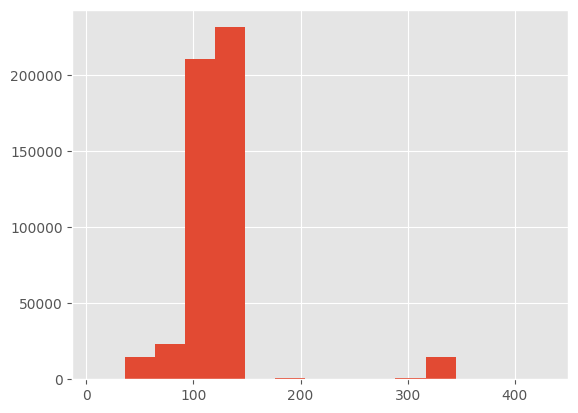

In [453]:
#histograma
df["IeVerIdentifier"].hist(bins=15)

Vemos que la mayor concentración de valores se encuentra entre las versiones 108 a 137. Agrupamos en 3 categorías

In [454]:
df['IeVerGroup'] = pd.cut(df['IeVerIdentifier'],
                          bins=[0, 100, 200, 500],  # Define los rangos
                          labels=['Bajas', 'Medias', 'Altas'])

In [455]:
df['IeVerGroup'].fillna(df['IeVerGroup'].mode()[0], inplace=True)

<ipython-input-455-a0c5cc437908>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IeVerGroup'].fillna(df['IeVerGroup'].mode()[0], inplace=True)


In [456]:
df['IeVerGroup'].value_counts(dropna=False)

IeVerGroup
Medias    409272
Bajas      74699
Altas      16029
Name: count, dtype: int64

In [457]:
#borramos la variable original
df.drop(["IeVerIdentifier"], axis=1, inplace=True)

####SmartScreen

In [458]:
df["SmartScreen"].value_counts()

SmartScreen
RequireAdmin    241594
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: count, dtype: int64

In [459]:
# Agrupamos las categrías que indican lo mismo
df['SmartScreen'] = df['SmartScreen'].replace({'on': 'On', 'off': 'Off', 'requireadmin': 'RequireAdmin'})

In [460]:
df['SmartScreen'].value_counts(dropna=False)

SmartScreen
RequireAdmin    241595
NaN             178596
ExistsNotSet     58497
Off              10463
Warn              7530
Prompt            1950
Block             1274
On                  61
&#x02;              20
&#x01;              14
Name: count, dtype: int64

In [461]:
red_dim_cat(df,"SmartScreen",6)

count           500000
unique               7
top       RequireAdmin
freq            241595
Name: SmartScreen, dtype: object

In [462]:
df['SmartScreen'].value_counts(dropna=False)

SmartScreen
RequireAdmin    241595
Other           178691
ExistsNotSet     58497
Off              10463
Warn              7530
Prompt            1950
Block             1274
Name: count, dtype: int64

####Census_MDC2FormFactor

In [463]:
df["Census_MDC2FormFactor"].value_counts()

Census_MDC2FormFactor
Notebook        320948
Desktop         109527
Convertible      22369
Detachable       16802
AllInOne         16372
PCOther           7800
LargeTablet       3645
SmallTablet       1797
SmallServer        496
MediumServer       192
LargeServer         50
ServerOther          2
Name: count, dtype: int64

In [464]:
red_dim_cat(df,"Census_MDC2FormFactor",5)

count       500000
unique           6
top       Notebook
freq        320948
Name: Census_MDC2FormFactor, dtype: object

In [465]:
df["Census_MDC2FormFactor"].value_counts()

Census_MDC2FormFactor
Notebook       320948
Desktop        109527
Convertible     22369
Detachable      16802
AllInOne        16372
Other           13982
Name: count, dtype: int64

####Census_DeviceFamily

In [466]:
df["Census_DeviceFamily"].value_counts().head(10)

Census_DeviceFamily
Windows.Desktop    499183
Windows.Server        816
Windows                 1
Name: count, dtype: int64

In [467]:
#La variable Census_DeviceFamily no tiene variabilidad. La borramos
df.drop(["Census_DeviceFamily"], axis=1, inplace=True)

####Census_OEMModelIdentifier

In [468]:
df["Census_OEMModelIdentifier"].value_counts(dropna=False).head(10)

Census_OEMModelIdentifier
313,586.00    17092
242,491.00    14726
317,701.00     7676
317,708.00     6541
 NaN           5764
228,975.00     4389
188,345.00     4063
241,876.00     3929
245,824.00     3815
244,755.00     2826
Name: count, dtype: int64

In [469]:
# Contar la frecuencia de cada modelo
model_counts = df["Census_OEMModelIdentifier"].value_counts()

# Definir los rangos de agrupación
bins = [0, 3000, 7000, model_counts.max()]  # Ajusta estos valores según tus datos
labels = ["Baja frecuencia", "Media frecuencia", "Alta frecuencia"]

# Crear los grupos de modelos según frecuencia
model_groups = pd.cut(model_counts, bins=bins, labels=labels, include_lowest=True)

# Asignar las etiquetas al DataFrame
df["OEM_Model_Grupo"] = df["Census_OEMModelIdentifier"].map(model_groups)

# Manejar valores nulos asignándolos a "Desconocido"
df["OEM_Model_Grupo"] = df["OEM_Model_Grupo"].astype("category")
df["OEM_Model_Grupo"] = df["OEM_Model_Grupo"].cat.add_categories("Desconocido")
df["OEM_Model_Grupo"] = df["OEM_Model_Grupo"].fillna("Desconocido")

# Ver distribución
print(df["OEM_Model_Grupo"].value_counts())

OEM_Model_Grupo
Baja frecuencia     432005
Alta frecuencia      39494
Media frecuencia     22737
Desconocido           5764
Name: count, dtype: int64


In [470]:
df["OEM_Model_Grupo"].value_counts(dropna=False).head(10)

OEM_Model_Grupo
Baja frecuencia     432005
Alta frecuencia      39494
Media frecuencia     22737
Desconocido           5764
Name: count, dtype: int64

In [471]:
# Eliminamos variable inicial
df.drop(["Census_OEMModelIdentifier"], axis=1, inplace=True)

####dCensus_OEMMamelIdentifier

In [472]:
df["Census_OEMNameIdentifier"].value_counts().head(10)

Census_OEMNameIdentifier
2,668.00    72011
2,102.00    57924
1,443.00    53210
2,206.00    51888
585.00      50304
525.00      47299
4,589.00    17404
4,730.00    16993
1,980.00    16157
4,142.00    11212
Name: count, dtype: int64

In [473]:
# Contar la frecuencia de cada OEM
oem_counts = df["Census_OEMNameIdentifier"].value_counts()

# Definir los rangos de agrupación (ajusta los valores según necesites)
bins = [0, 10000, 30000, 50000, oem_counts.max()]
labels = ["Baja frecuencia", "Media frecuencia", "Alta frecuencia", "Muy alta frecuencia"]

# Crear una serie categórica con los rangos definidos
oem_groups = pd.cut(oem_counts, bins=bins, labels=labels)

# Mapear los identificadores a sus grupos en el DataFrame
df["OEM_Grupo"] = df["Census_OEMNameIdentifier"].map(oem_groups)

# Convertir la columna a tipo categoría y agregar "Sin Frecuencia" como nueva categoría
df["OEM_Grupo"] = df["OEM_Grupo"].astype("category")
df["OEM_Grupo"] = df["OEM_Grupo"].cat.add_categories("Sin Frecuencia")

# Asignar "Sin Frecuencia" a los valores nulos
df["OEM_Grupo"] = df["OEM_Grupo"].fillna("Sin Frecuencia")

# Mostrar la distribución de la nueva variable
print(df["OEM_Grupo"].value_counts())



OEM_Grupo
Muy alta frecuencia    285337
Baja frecuencia        100217
Media frecuencia        61766
Alta frecuencia         47299
Sin Frecuencia           5381
Name: count, dtype: int64


In [474]:
df["OEM_Grupo"].value_counts(dropna=False).head(10)

OEM_Grupo
Muy alta frecuencia    285337
Baja frecuencia        100217
Media frecuencia        61766
Alta frecuencia         47299
Sin Frecuencia           5381
Name: count, dtype: int64

In [475]:
# Eliminamos variable inicial
df.drop(["Census_OEMNameIdentifier"], axis=1, inplace=True)

####Census_ProcessorManufacturerIdentifier

In [476]:
df["Census_ProcessorManufacturerIdentifier"].value_counts(dropna=False)

Census_ProcessorManufacturerIdentifier
5.00     439028
1.00      58604
 NaN       2347
10.00        14
3.00          7
Name: count, dtype: int64

In [477]:
red_dim_cat(df,"Census_ProcessorManufacturerIdentifier",2)

count    500,000.00
unique         3.00
top            5.00
freq     439,028.00
Name: Census_ProcessorManufacturerIdentifier, dtype: float64

In [478]:
df["Census_ProcessorManufacturerIdentifier"].value_counts()

Census_ProcessorManufacturerIdentifier
5.00      439028
1.00       58604
 Other      2368
Name: count, dtype: int64

####Census_ProcessorCoreCount

Indica la cantidad de núcleos del procesador en cada equipo registrado en el dataset. Es una variable numérica discreta que representa el número de cores de la CPU.

In [479]:
df["Census_ProcessorCoreCount"].value_counts(dropna=False)

Census_ProcessorCoreCount
4.00     304102
2.00     129178
8.00      48995
12.00      5184
6.00       4023
1.00       3980
 NaN       2347
16.00      1006
3.00        752
32.00       113
20.00        97
24.00        95
40.00        39
28.00        17
36.00        16
48.00        15
5.00         10
10.00        10
56.00         8
7.00          3
11.00         2
64.00         2
52.00         1
44.00         1
88.00         1
80.00         1
14.00         1
46.00         1
Name: count, dtype: int64

Se observa que la mayoría de los equipos tienen 4 núcleos (304,102 casos) o 2 núcleos (129,178 casos), lo cual es común en computadoras de escritorio y laptops estándar.

También hay presencia de procesadores con 8, 6 y 12 núcleos, típicos en dispositivos más potentes.

Existen algunos valores altos como 32, 64, 80 núcleos, lo cual es inusual y podría corresponder a servidores o estaciones de trabajo de alto rendimiento.

In [480]:
df["CPU_Grupo"] = df["Census_ProcessorCoreCount"].apply(lambda x:
    "Desconocido" if pd.isna(x) else
    "Básico (1-2 cores)" if x <= 2 else
    "Estándar (3-4 cores)" if x <= 4 else
    "Alto rendimiento (6-8 cores)" if x <= 8 else
    "Profesional (12-16 cores)" if x <= 16 else
    "Servidor (32+ cores)"
)

In [481]:
df["CPU_Grupo"].value_counts(dropna=False)

CPU_Grupo
Estándar (3-4 cores)            304854
Básico (1-2 cores)              133158
Alto rendimiento (6-8 cores)     53031
Profesional (12-16 cores)         6203
Desconocido                       2347
Servidor (32+ cores)               407
Name: count, dtype: int64

In [482]:
# Eliminamos variable inicial
df.drop(["Census_ProcessorCoreCount"], axis=1, inplace=True)

####Census_ProcessorManufacturerIdentifier

In [483]:
df["Census_ProcessorManufacturerIdentifier"].value_counts(dropna=False)

Census_ProcessorManufacturerIdentifier
5.00      439028
1.00       58604
 Other      2368
Name: count, dtype: int64

####Census_ProcessorModelIdentifier

In [484]:
df["Census_ProcessorModelIdentifier"].value_counts().head(20)

Census_ProcessorModelIdentifier
2,697.00    16180
1,998.00    14874
2,660.00    10736
2,373.00     9885
1,992.00     9502
2,382.00     9496
2,640.00     8506
2,097.00     7440
1,985.00     7414
1,848.00     6944
2,737.00     6864
1,916.00     6630
3,063.00     6236
2,321.00     6137
2,574.00     5789
3,082.00     5046
2,412.00     4851
3,026.00     4414
2,523.00     4334
2,569.00     4050
Name: count, dtype: int64

In [485]:
# Obtenemos el Top 10 de modelos más frecuentes
top_10 = df["Census_ProcessorModelIdentifier"].value_counts().head(10).index

# Reemplazamos valores fuera del Top 10 por "Otros"
df["Census_ProcessorModelIdentifier"] = df["Census_ProcessorModelIdentifier"].apply(lambda x: x if x in top_10 else "Otros")

# Verificamos la nueva distribución
print(df["Census_ProcessorModelIdentifier"].value_counts())

Census_ProcessorModelIdentifier
 Otros      399023
2,697.00     16180
1,998.00     14874
2,660.00     10736
2,373.00      9885
1,992.00      9502
2,382.00      9496
2,640.00      8506
2,097.00      7440
1,985.00      7414
1,848.00      6944
Name: count, dtype: int64


####Census_PrimaryDiskTypeName

In [486]:
df["Census_PrimaryDiskTypeName"].value_counts()

Census_PrimaryDiskTypeName
HDD            325429
SSD            138155
UNKNOWN         20083
Unspecified     15624
Name: count, dtype: int64

In [487]:
#Agrupamos unspecified y UNKNOWN, asi como los nulos
df['Census_PrimaryDiskTypeName'] = df['Census_PrimaryDiskTypeName'].replace({'Unspecified': 'UNKNOWN'}).fillna('UNKNOWN')


In [488]:
df['Census_PrimaryDiskTypeName'].value_counts(dropna=False)

Census_PrimaryDiskTypeName
HDD        325429
SSD        138155
UNKNOWN     36416
Name: count, dtype: int64

####Census_SystemVolumeTotalCapacity

In [489]:
df["Census_SystemVolumeTotalCapacity"].value_counts().head(20)

Census_SystemVolumeTotalCapacity
28,542.00     2922
926,992.00    2866
476,389.00    2380
476,324.00    2306
102,400.00    2303
953,253.00    2272
952,728.00    2138
476,323.00    1994
475,799.00    1981
952,727.00    1922
952,792.00    1844
476,438.00    1787
28,558.00     1747
380,772.00    1595
243,582.00    1591
476,373.00    1529
113,922.00    1504
121,488.00    1478
953,318.00    1476
476,388.00    1475
Name: count, dtype: int64

Dado que la capacidad de almacenamiento sigue un patrón numérico, podemos usar rangos de almacenamiento en lugar de valores individuales.

In [490]:
# Definimos función para categorizar almacenamiento
def categorizar_almacenamiento(capacidad):
    if capacidad < 32000:  # Menos de 32GB
        return "Muy pequeña"
    elif capacidad < 128000:  # Entre 32GB y 128GB
        return "Pequeña"
    elif capacidad < 512000:  # Entre 128GB y 512GB
        return "Mediana"
    elif capacidad < 1000000:  # Entre 512GB y 1TB
        return "Grande"
    else:  # Más de 1TB
        return "Muy grande"

# Aplicamos la función a la columna
df["Census_SystemVolumeTotalCapacity"] = df["Census_SystemVolumeTotalCapacity"].apply(categorizar_almacenamiento)

# Verificamos la nueva distribución
print(df["Census_SystemVolumeTotalCapacity"].value_counts())

Census_SystemVolumeTotalCapacity
Mediana        260715
Pequeña        113375
Grande          90034
Muy pequeña     28378
Muy grande       7498
Name: count, dtype: int64


####Census_ChassisTypeName

In [491]:
df["Census_ChassisTypeName"].value_counts()

Census_ChassisTypeName
Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32                          1
ExpansionChassis            1
25                          1
Name: count, dtype: int64

In [492]:
# Unificamos unknown con y sin mayúscula
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'UNKNOWN': 'unknown'})

In [493]:
# Sustituimos unknown por Nodata
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].fillna('unknown')

In [494]:
#Los nulos a NoData
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].fillna('NoData')

In [495]:
# sustituir los números por NoData
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace(r'\d+', 'NoData', regex=True)

In [496]:
df['Census_ChassisTypeName'].value_counts()

Census_ChassisTypeName
Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
unknown                  3732
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
NoData                     23
StickPC                     7
MultisystemChassis          3
PizzaBox                    3
Blade                       3
SubChassis                  2
ExpansionChassis            1
Name: count, dtype: int64

In [497]:
red_dim_cat(df,"Census_ChassisTypeName",5)

count       500000
unique           6
top       Notebook
freq        294232
Name: Census_ChassisTypeName, dtype: object

In [498]:
df['Census_ChassisTypeName'].value_counts()

Census_ChassisTypeName
Notebook    294232
Desktop     104979
Laptop       38261
Other        30940
Portable     20181
AllinOne     11407
Name: count, dtype: int64

####Census_PowerPlatformRoleName

In [499]:
df["Census_PowerPlatformRoleName"].value_counts()

Census_PowerPlatformRoleName
Mobile               346378
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
Name: count, dtype: int64

In [500]:
df.loc[df['Census_PowerPlatformRoleName'].str.contains('server', case=False, na=False), 'Census_PowerPlatformRoleName'] = 'server'

In [501]:
df['Census_PowerPlatformRoleName'].value_counts()

Census_PowerPlatformRoleName
Mobile         346378
Desktop        116054
Slate           27475
Workstation      6235
server           2472
UNKNOWN          1172
AppliancePC       212
Name: count, dtype: int64

####Census_InternalBatteryNumberOfCharges

In [502]:
df["Census_InternalBatteryNumberOfCharges"].value_counts()

Census_InternalBatteryNumberOfCharges
0.00                283189
4,294,967,295.00    126436
1.00                  2955
16.00                 1517
2.00                  1503
                     ...  
8,331.00                 1
57,727.00                1
1,030.00                 1
43,544.00                1
1,900.00                 1
Name: count, Length: 5248, dtype: int64

Según los datos la variable parece indicar la cantidad de ciclos de carga que ha tenido la batería interna de un dispositivo. Agruparemos en rangos 0-50, 51-300, +300

In [503]:
df['Census_InternalBatteryNumberOfCharges'].fillna(df['Census_InternalBatteryNumberOfCharges'].mode()[0], inplace=True)

<ipython-input-503-5417ef9e9323>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Census_InternalBatteryNumberOfCharges'].fillna(df['Census_InternalBatteryNumberOfCharges'].mode()[0], inplace=True)
<ipython-input-503-5417ef9e9323>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Census_InternalBatteryNu

In [504]:
df['Census_InternalBatteryNumberOfCharges'] = pd.cut(df['Census_InternalBatteryNumberOfCharges'],
                                  bins=[-1, 50, 300, float('inf')],
                                  labels=['Nueva', 'Moderada', 'Alto Desgaste'])

<Axes: >

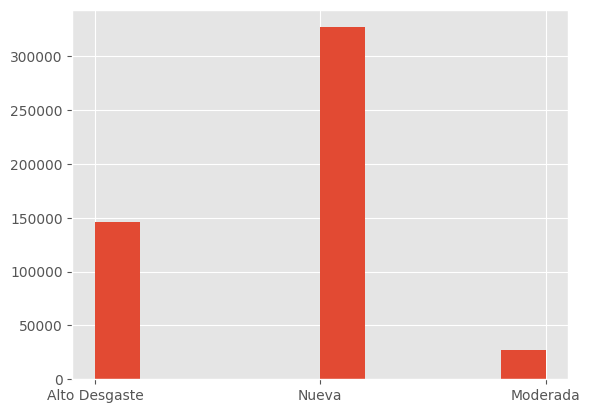

In [505]:
#histograma BatteryChargeGroup
df["Census_InternalBatteryNumberOfCharges"].hist()

In [506]:
df['Census_InternalBatteryNumberOfCharges'].value_counts(dropna=False)

Census_InternalBatteryNumberOfCharges
Nueva            327134
Alto Desgaste    145736
Moderada          27130
Name: count, dtype: int64

####Census_OSVersion

In [507]:
df["Census_OSVersion"].value_counts()

Census_OSVersion
10.0.17134.228      79975
10.0.17134.165      50511
10.0.16299.431      30519
10.0.17134.285      26289
10.0.17134.112      19501
10.0.16299.547      19179
10.0.16299.371      18195
10.0.17134.191      12990
10.0.14393.2189     12409
10.0.16299.611      12267
10.0.16299.125      12038
10.0.10240.17443    11476
10.0.10586.1176     10235
10.0.16299.492       9467
10.0.16299.309       8293
10.0.17134.286       7840
10.0.16299.15        6717
10.0.17134.254       6292
10.0.15063.1206      5700
10.0.17134.1         5678
10.0.15063.1266      5642
10.0.16299.192       5563
10.0.17134.167       4842
10.0.17134.137       4420
10.0.16299.248       4282
10.0.17134.48        3808
10.0.15063.0         3619
10.0.15063.1088      3535
10.0.14393.0         3311
10.0.17134.81        3044
10.0.14393.693       2801
10.0.15063.1155      2565
10.0.10586.164       2322
10.0.10586.318       2257
10.0.10586.0         2242
10.0.14393.2214      2183
10.0.15063.786       2139
10.0.16299.665       2118
10.0.15063.674       1961
10.0.15063.1324      1908
10.0.10586.494       1807
10.0.15063.850       1755
10.0.15063.726       1729
10.0.15063.483       1660
10.0.14393.447       1642
10.0.14393.1593      1543
10.0.14393.2007      1506
10.0.10586.420       1500
10.0.10240.16384     1499
10.0.15063.608       1421
10.0.14393.1198      1419
10.0.14393.1944      1396
10.0.15063.540       1388
10.0.10586.545       1383
10.0.15063.1029      1367
10.0.14393.1770      1303
10.0.15063.909       1299
10.0.10586.104       1296
10.0.14393.1358      1175
10.0.14393.1066      1162
10.0.15063.966       1117
10.0.10586.218       1116
10.0.15063.250       1082
10.0.10586.1106      1061
10.0.14393.1480      1025
10.0.14393.2068      1022
10.0.14393.953        988
10.0.16299.579        973
10.0.16299.98         955
10.0.14393.1884       953
10.0.14393.1715       949
10.0.14393.351        913
10.0.10586.753        895
10.0.16299.461        880
10.0.14393.576        793
10.0.14393.2125       769
10.0.16299.64         755
10.0.15063.413        742
10.0.14393.187        719
10.0.17134.319        719
10.0.10586.589        680
10.0.15063.332        662
10.0.10586.36         645
10.0.10586.1045       638
10.0.16299.251        636
10.0.16299.214        626
10.0.16299.666        601
10.0.16299.551        598
10.0.10586.633        592
10.0.10586.122        527
10.0.16299.19         524
10.0.14393.321        485
10.0.16299.522        472
10.0.14393.5          402
10.0.10586.14         399
10.0.10586.679        374
10.0.10586.3          362
10.0.16299.402        358
10.0.15063.1235       349
10.0.10240.16405      349
10.0.15063.1209       345
10.0.10586.916        339
10.0.15063.296        338
10.0.16299.334        332
10.0.10586.63         325
10.0.14393.1914       306
10.0.10586.1007       281
10.0.15063.632        280
10.0.14393.2430       278
10.0.10586.839        272
10.0.10586.962        270
10.0.10586.873        267
10.0.10586.29         260
10.0.10586.713        260
10.0.15063.502        246
10.0.10586.71         239
10.0.14393.222        227
10.0.10240.16487      227
10.0.14393.105        218
10.0.15063.138        212
10.0.14393.2363       194
10.0.10240.17946      193
10.0.15063.1112       190
10.0.16299.637        175
10.0.14393.2248       173
10.0.15063.1292       168
10.0.17738.1000       165
10.0.10586.17         158
10.0.14393.2485       156
10.0.14393.479        154
10.0.15063.729        153
10.0.15063.447        136
10.0.17692.1004       131
10.0.14393.82         116
10.0.15063.1182       107
10.0.10240.17889      103
10.0.14393.2395        96
10.0.10586.446         93
10.0.10240.17914       87
10.0.14393.2273        86
10.0.10240.17236       82
10.0.15063.877         79
10.0.15063.1058        78
10.0.10240.17071       76
10.0.10240.17394       75
10.0.10240.16520       72
10.0.14393.2035        71
10.0.14393.2368        71
10.0.14393.969         70
10.0.14393.970         68
10.0.15063.1356        66
10.0.17746.1000        65
10.0.10240.16413       64
10.0.

La variable tiene 4 elementos divididas por puntos.



*   Primer elemento: major (10)
*   Segundo elemento: minor (0)
*   Tercer elemento: Build (17134)
*   Cuarto elemento: Revision 228)

En este caso, el número de Build es el más importante, porque te ayuda a identificar qué actualización de Windows 10 está instalada, lo que tiene implicaciones de compatibilidad y seguridad.

Por esto cogeremos solo los 3 primeros números de Build

In [508]:
df['Extracted_Version'] = df['Census_OSVersion'].apply(lambda x: x.split('.')[2][:3])

In [509]:
df['Extracted_Version'].value_counts()

Extracted_Version
171    226000
162    136573
150     44265
143     43703
105     33193
102     15106
177       842
176       262
182        43
149         5
170         3
960         1
110         1
142         1
144         1
161         1
Name: count, dtype: int64

In [510]:
# Agrupamos las categorías minoritarias:
red_dim_cat(df,"Extracted_Version",5)


count     500000
unique         6
top          171
freq      226000
Name: Extracted_Version, dtype: object

In [511]:
df['Extracted_Version'].value_counts()

Extracted_Version
171      226000
162      136573
150       44265
143       43703
105       33193
Other     16266
Name: count, dtype: int64

In [512]:
# ELiminamos la variable inicial
df.drop(["Census_OSVersion"], axis=1, inplace=True)

####Census_OSArchitecture

In [513]:
df["Census_OSArchitecture"].value_counts(dropna=False)

Census_OSArchitecture
amd64    454435
x86       45551
arm64        14
Name: count, dtype: int64

#### Census_OSBranch

La variable parece indicar la rama de desarrollo o versión de compilación del sistema operativo Windows que está instalada en los dispositivos. Estas ramas se utilizan internamente por Microsoft para diferenciar las versiones de Windows según su estado de desarrollo, distribución y características específicas. 'rs' hace referencia a Redstone, 'th' a Threshold. 'Winblue_ltsb_escrow': podría referirse a una versión LTSB (Long-Term Servicing Branch) de Windows y 'rs_prerelease'indica una versión preliminar (Pre-Release), pertenece a WIndows 8.

In [514]:
df["Census_OSBranch"].value_counts()

Census_OSBranch
rs4_release                  226001
rs3_release                   69216
rs3_release_svc_escrow        67027
rs2_release                   44264
rs1_release                   43705
th2_release                   18298
th2_release_sec               14895
th1_st1                       10822
th1                            4284
rs5_release                     839
rs3_release_svc_escrow_im       329
rs_prerelease                   184
rs_prerelease_flt               132
rs5_release_sigma                 3
winblue_ltsb_escrow               1
Name: count, dtype: int64

In [515]:
# Unimos todos los que son Windows 10 release, todos los que son Windows 10 Threshold y Windows 8

def OSBranch_groupped(value):
    w10_redstone = [
        'rs4_release', 'rs3_release', 'rs2_release', 'rs1_release',
        'rs5_release', 'rs3_release_svc_escrow', 'rs3_release_svc_escrow_im',
        'rs_prerelease', 'rs_prerelease_flt', 'rs5_release_sigma'
    ]
    w10_threshold = ['th2_release', 'th2_release_sec', 'th1_st1', 'th1']
    w8 = ['winblue_ltsb_escrow']

    value_lower = str(value).lower()
    if value_lower in w10_redstone:
        return 'w10_Redstone'
    elif value_lower in w10_threshold:
        return 'w10_Threshold'
    elif value_lower in w8:
        return 'w8'
    else:
        return value

df['Census_OSBranch'] = df['Census_OSBranch'].apply(OSBranch_groupped)


print(df['Census_OSBranch'].value_counts())

Census_OSBranch
w10_Redstone     451700
w10_Threshold     48299
w8                    1
Name: count, dtype: int64


####Census_OSBuildNumber

La variable representa el número de compilación (Build) del sistema operativo Windows instalado en los dispositivos del conjunto de datos. Este número es una referencia interna utilizada por Microsoft para identificar versiones específicas de Windows, incluyendo actualizaciones principales y parches de seguridad.

In [516]:
df["Census_OSBuildNumber"].value_counts()

Census_OSBuildNumber
17134    225979
16299    136572
15063     44262
14393     43702
10586     33193
10240     15106
17738       165
17692       146
17744       135
17758        99
17746        65
17754        59
17763        59
17751        54
17741        45
17755        40
17735        39
17733        35
17686        34
17760        31
17133        21
17682        20
17677        17
17672        15
18237        14
18234        14
18242        13
17661         9
17713         8
17666         7
17634         4
17639         3
17747         3
17730         2
17655         2
14986         2
17650         2
17046         1
17004         1
14295         1
18219         1
17623         1
17749         1
14421         1
14971         1
17723         1
16193         1
14926         1
17604         1
17618         1
11082         1
14328         1
15019         1
18214         1
16251         1
14946         1
9600          1
17074         1
17753         1
15042         1
15048         1
Name: count, dtype: int64

In [517]:
# Crear una función para asignar categorías
def categorize_build(build):
    if build <= 10586:
        return 'Threshold'
    elif build <= 14393:
        return 'Redstone 1'
    elif build <= 15063:
        return 'Redstone 2'
    elif build <= 16299:
        return 'Redstone 3'
    elif build <= 17134:
        return 'Redstone 4'
    else:
        return 'Posterior'

# Aplicar la función para categorizar
df['OSBuildCategory'] = df['Census_OSBuildNumber'].apply(categorize_build)

# Ver la distribución
print(df['OSBuildCategory'].value_counts())

OSBuildCategory
Redstone 4    226003
Redstone 3    136574
Threshold      48300
Redstone 2     44271
Redstone 1     43705
Posterior       1147
Name: count, dtype: int64


In [518]:
df["OSBuildCategory"].value_counts()

OSBuildCategory
Redstone 4    226003
Redstone 3    136574
Threshold      48300
Redstone 2     44271
Redstone 1     43705
Posterior       1147
Name: count, dtype: int64

In [519]:
# ELiminamos la variable inicial
df.drop(["Census_OSBuildNumber"], axis=1, inplace=True)

####Census_OSBuildRevision

In [520]:
df["Census_OSBuildRevision"].value_counts()

Census_OSBuildRevision
228      79975
165      50511
431      30519
285      26289
112      19503
547      19179
371      18195
191      12991
2189     12409
611      12267
125      12038
17443    11476
1176     10235
492       9467
0         9175
309       8293
286       7840
15        6717
254       6292
1         5999
1206      5700
1266      5642
192       5562
167       4842
137       4420
248       4282
48        3808
1088      3535
81        3044
693       2801
1155      2565
164       2322
318       2257
2214      2183
786       2139
665       2118
674       1961
1324      1908
494       1807
447       1778
726       1773
850       1756
483       1660
1593      1543
2007      1506
420       1500
16384     1499
608       1421
1198      1419
1944      1396
540       1388
545       1383
1029      1367
1770      1303
909       1299
104       1296
1358      1175
1066      1162
966       1117
218       1116
250       1082
1106      1061
1480      1025
2068      1022
953        988
579        973
98         955
1884       953
1715       949
351        913
753        895
461        880
576        793
2125       769
64         755
413        742
187        719
319        719
589        680
332        662
36         645
1045       638
251        636
214        626
666        601
551        598
633        592
122        527
19         524
1000       493
321        485
522        472
5          455
14         408
3          393
679        374
402        358
16405      349
1235       349
1209       345
916        339
296        338
334        332
63         325
1914       306
1007       281
632        280
2430       278
839        272
962        270
873        267
713        260
29         260
502        246
71         239
16487      227
222        227
105        224
138        212
2363       194
17946      193
1112       190
637        175
2248       173
1004       170
1292       168
17         158
2485       156
479        154
729        153
82         116
1182       107
17889      103
2395        96
446         93
1003        87
17914       87
2273        86
17236       82
11          82
877         79
1058        78
17071       76
17394       75
16520       72
2035        71
2368        71
969         70
970         68
1356        66
16413       64
2312        63
1001        58
2457        58
17976       56
13          52
17319       52
17146       51
994         51
16445       49
17354       49
17861       45
2155        45
10          44
17024       44
51          41
4           39
2339        39
16430       37
338         36
17190       35
16942       35
577         34
16397       32
16854       31
936         31
17918       28
16463       26
2097        26
16644       25
696         23
16725       22
194         22
2396        21
67          20
16549       20
16683       19
17113       19
223         17
2515        16
16601       16
83          16
17202       15
17831       14
1378        14
17797       13
1532        13
16771       13
16433       11
499         11
675         11
1002        10
1154        10
1537         8
594          7
16590        7
330          6
242          6
17738        6
17770        6
17673        5
17709        4
73           4
17533        3
16394        3
842          2
17488        2
16393        2
16387        2
1613         2
16389        2
79           2
103          2
456          1
1670         1
448          1
281          1
1737         1
1177         1
1005         1
2156         1
601          1
19069        1
16566        1
1149         1
201          1
17446        1
17643        1
1230         1
491          1
206          1
16399        1
Name: count, dtype: int64

In [521]:
# Función personalizada para clasificar
def categorize_revision(revision):
    if revision in [228, 165, 431]:
        return 'Común'
    elif revision <= 150:
        return 'Antigua'
    elif revision >= 300:
        return 'Actualizada'
    else:
        return 'Otras'

# Aplicar la función para agrupar
df['OSBuildRevisionGroup'] = df['Census_OSBuildRevision'].apply(categorize_revision)

# Ver la distribución
print(df['OSBuildRevisionGroup'].value_counts())

OSBuildRevisionGroup
Actualizada    191285
Común          161005
Otras           75212
Antigua         72498
Name: count, dtype: int64


In [522]:
df["OSBuildRevisionGroup"].value_counts()

OSBuildRevisionGroup
Actualizada    191285
Común          161005
Otras           75212
Antigua         72498
Name: count, dtype: int64

In [523]:
# Eliminamos variable inicial
df.drop(["Census_OSBuildRevision"], axis=1, inplace=True)

####Census_OSEdition

In [524]:
# Identificamos que las categorías se distribuyen segun: professional, education, core, edition, cloud, workstation. Lo que haremos será agrupar las categorías

def OSEdition_groupped(edition):
    edition = str(edition).lower()

    core = ['core', 'coresinglelanguage', 'corecountryspecific', 'coren']
    professional = ['professional', 'professionaln', 'professionaleducation',
                    'professionaleducationn', 'enterprise', 'enterprises',
                    'enterprisen', 'enterprisesn']
    education = ['education', 'educationn']
    server = ['serverstandard', 'serverstandardeval', 'serverdatacentereval', 'serversolution']
    cloud = ['cloud', 'cloudn']
    workstation = ['professionalworkstation', 'professionalworkstationn']

    if edition in core:
        return 'CORE'
    elif edition in professional:
        return 'PROFESSIONAL'
    elif edition in education:
        return 'EDUCATION'
    elif edition in server:
        return 'SERVER'
    elif edition in cloud:
        return 'CLOUD'
    elif edition in workstation:
        return 'WORKSTATION'
    else:
        return edition

df['Census_OSEdition'] = df['Census_OSEdition'].apply(OSEdition_groupped)

# Verificamos las agrupaciones
print(df['Census_OSEdition'].value_counts())

Census_OSEdition
CORE            312691
PROFESSIONAL    183782
EDUCATION         2371
SERVER             816
CLOUD              337
WORKSTATION          3
Name: count, dtype: int64


In [525]:
red_dim_cat(df,"Census_OSEdition",2)

count     500000
unique         3
top         CORE
freq      312691
Name: Census_OSEdition, dtype: object

In [526]:
df["Census_OSEdition"].value_counts().head(10)

Census_OSEdition
CORE            312691
PROFESSIONAL    183782
Other             3527
Name: count, dtype: int64

####Census_OSSkuName

In [527]:
# Agrupamos como en el caso anterior segun categorías: education, server, cloud, professiona, standard_server, workstation y unlicensed

def OSSkuName_categor(sku_name):
    # Consumidores Generales
    core_group = ['CORE', 'CORE_SINGLELANGUAGE', 'CORE_COUNTRYSPECIFIC', 'CORE_N']

    # Profesionales y Empresariales
    professional_group = ['PROFESSIONAL', 'PROFESSIONAL_N', 'ENTERPRISE', 'ENTERPRISE_S', 'ENTERPRISE_S_N', 'ENTERPRISE_N']

    # Educación
    education_group = ['EDUCATION', 'EDUCATION_N']

    # Servidor
    server_group = ['STANDARD_SERVER', 'STANDARD_EVALUATION_SERVER', 'DATACENTER_EVALUATION_SERVER', 'SB_SOLUTION_SERVER']

    # Cloud
    cloud_group = ['CLOUD', 'CLOUDN']

    # Workstation
    workstation_group = ['PRO_WORKSTATION', 'PRO_WORKSTATION_N']

    # Unlicensed
    unlicensed_group = ['UNLICENSED']

    # Clasificación
    if sku_name in core_group:
        return 'CORE'
    elif sku_name in professional_group:
        return 'PROFESSIONAL'
    elif sku_name in education_group:
        return 'EDUCATION'
    elif sku_name in server_group:
        return 'SERVER'
    elif sku_name in cloud_group:
        return 'CLOUD'
    elif sku_name in workstation_group:
        return 'WORKSTATION'
    elif sku_name in unlicensed_group:
        return 'UNLICENSED'
    else:
        return sku_name

df['Census_OSSkuName'] = df['Census_OSSkuName'].apply(OSSkuName_categor)


print(df['Census_OSSkuName'].value_counts())

Census_OSSkuName
CORE            312646
PROFESSIONAL    183827
EDUCATION         2374
SERVER             816
CLOUD              333
WORKSTATION          3
UNLICENSED           1
Name: count, dtype: int64


In [528]:
df["Census_OSSkuName"].value_counts()

Census_OSSkuName
CORE            312646
PROFESSIONAL    183827
EDUCATION         2374
SERVER             816
CLOUD              333
WORKSTATION          3
UNLICENSED           1
Name: count, dtype: int64

In [529]:
red_dim_cat(df,"Census_OSSkuName",2)

count     500000
unique         3
top         CORE
freq      312646
Name: Census_OSSkuName, dtype: object

####Census_OSInstallTypeName

La variable indica el tipo de instalación del sistema operativo Windows en los dispositivos del conjunto de datos. Este dato describe cómo se realizó la instalación del sistema operativo, ya sea como una actualización, una instalación limpia, un reinicio o algún otro método. Dado que los tipos de instalación tienen similitudes en su propósito, puedes agruparlos en categorías más amplias para simplificar el análisis:

In [530]:
df["Census_OSInstallTypeName"].value_counts()

Census_OSInstallTypeName
UUPUpgrade        146780
IBSClean           92403
Update             88892
Upgrade            70013
Other              46960
Reset              36510
Refresh            11540
Clean               3885
CleanPCRefresh      3017
Name: count, dtype: int64

In [531]:
def categorize_install_type(install_type):
    if install_type in ['UUPUpgrade', 'Update', 'Upgrade']:
        return 'Actualización'
    elif install_type in ['IBSClean', 'Clean', 'CleanPCRefresh']:
        return 'Instalación Limpia'
    elif install_type in ['Reset', 'Refresh']:
        return 'Restauración'
    else:
        return 'Otros'

# Aplicar la función
df['InstallTypeGroup'] = df['Census_OSInstallTypeName'].apply(categorize_install_type)

# Ver la distribución por grupo
print(df['InstallTypeGroup'].value_counts())

InstallTypeGroup
Actualización         305685
Instalación Limpia     99305
Restauración           48050
Otros                  46960
Name: count, dtype: int64


In [532]:
df["InstallTypeGroup"].value_counts()

InstallTypeGroup
Actualización         305685
Instalación Limpia     99305
Restauración           48050
Otros                  46960
Name: count, dtype: int64

In [533]:
# Eliminamos variable inicial
df.drop(["Census_OSInstallTypeName"], axis=1, inplace=True)

####Census_OSInstallLanguageIdentifier

Indica el idioma en el que se instaló el sistema operativo Windows en los dispositivos. Cada número es un identificador que corresponde a un idioma específico.

In [534]:
df["Census_OSInstallLanguageIdentifier"].value_counts()

Census_OSInstallLanguageIdentifier
8.00     178405
9.00      58013
7.00      28766
29.00     27669
14.00     24191
37.00     22635
10.00     20268
26.00     18520
5.00      14085
35.00     11497
39.00     11221
18.00     10600
20.00      9512
24.00      8127
25.00      7502
27.00      5956
19.00      4775
17.00      4695
1.00       4516
3.00       4067
6.00       2881
33.00      2807
15.00      2311
4.00       1996
30.00      1793
23.00      1652
31.00      1213
12.00      1119
2.00       1096
36.00       846
16.00       837
28.00       713
34.00       584
13.00       581
21.00       413
32.00       246
11.00       197
38.00       185
22.00       178
Name: count, dtype: int64

In [535]:
# Crear rangos según la frecuencia
def categorize_language(lang_id):
    if lang_id in [10, 14, 37, 26]:  # Ejemplo: los más comunes
        return 'Común'
    elif lang_id in [5, 35, 39]:  # Ejemplo: frecuencias moderadas
        return 'Intermedio'
    else:
        return 'Raro'

# Aplicar la agrupación
df['LanguageCategory'] = df['Census_OSInstallLanguageIdentifier'].apply(categorize_language)

# Ver la distribución
print(df['LanguageCategory'].value_counts())

LanguageCategory
Raro          377583
Común          85614
Intermedio     36803
Name: count, dtype: int64


In [536]:
df["LanguageCategory"].value_counts()

LanguageCategory
Raro          377583
Común          85614
Intermedio     36803
Name: count, dtype: int64

In [537]:
# Eliminamos variable inicial
df.drop(["Census_OSInstallLanguageIdentifier"], axis=1, inplace=True)

####Census_OSUILocaleIdentifier

La variable Census_OSUILocaleIdentifier representa el identificador del idioma y configuración regional del sistema operativo (UI Locale), el cual está relacionado con el idioma de la interfaz de usuario y la configuración regional del dispositivo.

In [538]:
df["Census_OSUILocaleIdentifier"].value_counts()

Census_OSUILocaleIdentifier
31     177983
34      58307
30      28798
125     28001
49      24423
158     22930
35      20890
119     18696
26      14096
148     11617
160     11244
72      10662
83       9596
109      8143
115      7496
120      5993
74       4791
64       4747
5        4599
20       4087
28       2895
140      2815
58       2339
24       2004
128      1808
105      1654
130      1246
11       1120
44       1118
151       863
62        857
123       718
48        597
145       589
90        432
156       421
68        259
136       256
38        206
159       195
92        188
17        126
42         17
15         15
32         15
126        13
54         11
161        10
59          9
36          7
12          6
131         5
93          5
63          5
37          5
152         4
162         4
116         4
65          4
121         4
27          3
91          3
7           3
29          3
146         3
122         2
95          2
75          2
73          2
110         2
149         2
76          2
84          2
132         2
19          2
33          1
39          1
153         1
157         1
21          1
40          1
1           1
43          1
102         1
98          1
51          1
70          1
89          1
22          1
6           1
71          1
141         1
Name: count, dtype: int64

In [539]:
# Crear una función para categorizar por frecuencia
def categorize_locale(freq):
    if freq > 500:  # Ajustar el umbral según los datos
        return 'Común'
    elif freq > 100:
        return 'Poco Común'
    else:
        return 'Raro'

# Aplicar la función
locale_counts = df['Census_OSUILocaleIdentifier'].value_counts()
df['LocaleCategory'] = df['Census_OSUILocaleIdentifier'].map(locale_counts).apply(categorize_locale)

# Ver la distribución por categoría
print(df['LocaleCategory'].value_counts())

LocaleCategory
Común         497722
Poco Común      2083
Raro             195
Name: count, dtype: int64


In [540]:
df["LocaleCategory"].value_counts()

LocaleCategory
Común         497722
Poco Común      2083
Raro             195
Name: count, dtype: int64

In [541]:
# Eliminamos variable inicial
df.drop(["Census_OSUILocaleIdentifier"], axis=1, inplace=True)

####Census_OSWUAutoUpdateOptionsName

La variable Census_OSWUAUtoUpdateOptionsName indica la configuración de las actualizaciones automáticas del sistema operativo Windows en cada dispositivo. Este valor refleja cómo los dispositivos manejan la instalación de actualizaciones, lo que puede impactar en la seguridad, la estabilidad del sistema y la frecuencia de actualizaciones.

In [542]:
df["Census_OSWUAutoUpdateOptionsName"].value_counts()

Census_OSWUAutoUpdateOptionsName
FullAuto                                 222482
UNKNOWN                                  140961
Notify                                   113507
AutoInstallAndRebootAtMaintenanceTime     20731
Off                                        1506
DownloadNotify                              813
Name: count, dtype: int64

Los clasificaremos según el nivel de seguridad:



*   "Seguro": Incluye opciones como FullAuto y AutoInstallAndRebootAtMaintenanceTime.
*   "Riesgo": Incluye Off, Notify, y DownloadNotify.

In [543]:
def security_risk_category(option):
    if option in ['FullAuto', 'AutoInstallAndRebootAtMaintenanceTime']:
        return 'Seguro'
    else:
        return 'Riesgo'

df['SecurityRiskCategory'] = df['Census_OSWUAutoUpdateOptionsName'].apply(security_risk_category)

# Ver la distribución por categoría de seguridad
print(df['SecurityRiskCategory'].value_counts())

SecurityRiskCategory
Riesgo    256787
Seguro    243213
Name: count, dtype: int64


In [544]:
df["SecurityRiskCategory"].value_counts()

SecurityRiskCategory
Riesgo    256787
Seguro    243213
Name: count, dtype: int64

In [545]:
# Eliminamos variable inicial
df.drop(["Census_OSWUAutoUpdateOptionsName"], axis=1, inplace=True)

####Census_GenuineStateName

Indica el estado de validez de la licencia del sistema operativo Windows en los dispositivos. Este estado es importante para determinar si el sistema operativo está activado correctamente, si tiene problemas de licencia o si no se puede verificar la autenticidad.



In [546]:
df["Census_GenuineStateName"].value_counts()

Census_GenuineStateName
IS_GENUINE         441402
INVALID_LICENSE     44990
OFFLINE             12834
UNKNOWN               774
Name: count, dtype: int64

In [547]:
#Dividimos los valores en "Válido", "No Válido" y "Indeterminado":

def categorize_license_state(state):
    if state == 'IS_GENUINE':
        return 'Válido'
    elif state == 'INVALID_LICENSE':
        return 'No Válido'
    else:
        return 'Indeterminado'

# Aplicar la agrupación
df['LicenseCategory'] = df['Census_GenuineStateName'].apply(categorize_license_state)

# Ver la distribución por categoría
print(df['LicenseCategory'].value_counts())

LicenseCategory
Válido           441402
No Válido         44990
Indeterminado     13608
Name: count, dtype: int64


In [548]:
df  ["LicenseCategory"].value_counts()

LicenseCategory
Válido           441402
No Válido         44990
Indeterminado     13608
Name: count, dtype: int64

In [549]:
# Eliminamos variable inicial
df.drop(["Census_GenuineStateName"], axis=1, inplace=True)

####Census_ActivationChannel

La variable Census_ActivationChannel indica el canal de activación utilizado para validar la licencia del sistema operativo Windows en cada dispositivo. Este canal refleja el método mediante el cual se activó Windows, lo que puede estar relacionado con el tipo de licencia adquirida (retail, OEM, corporativa, etc.).

In [550]:
df["Census_ActivationChannel"].value_counts()

Census_ActivationChannel
Retail            264932
OEM:DM            191350
Volume:GVLK        25109
OEM:NONSLP         17943
Volume:MAK           468
Retail:TB:Eval       198
Name: count, dtype: int64

Retail: Indica que el sistema operativo fue adquirido a través de un canal de venta directa al consumidor, como una tienda física o en línea.

OEM:DM :La licencia está preinstalada por el fabricante del equipo original

Volume:GVLK (25,109 registros):Activación por licencias por volumen utilizando GVLK (Generic Volume License Key).

OEM:NONSPL (17,943 registros): También es una licencia OEM, pero con un método diferente al digital marker.Es menos frecuente y podría estar relacionado con sistemas antiguos o configuraciones personalizadas.

Volume:MAK: Licencias por volumen utilizando MAK (Multiple Activation Key). Un método diferente de activación corporativa, donde cada dispositivo consume una activación única.

Retail:TB:Eval: Licencia de evaluación o prueba temporal adquirida a través del canal retail.

In [551]:
# Agrupamos por tipo de licencia
def categorize_activation_channel(channel):
    if channel in ['Retail', 'Retail:TB:Eval']:
        return 'Individual'
    elif channel in ['OEM:DM', 'OEM:NONSPL']:
        return 'OEM (Fabricante)'
    elif channel in ['Volume:GVLK', 'Volume:MAK']:
        return 'Corporativo'
    else:
        return 'Otro'

# Aplicar la agrupación
df['ActivationCategory'] = df['Census_ActivationChannel'].apply(categorize_activation_channel)

# Ver la distribución por categoría
print(df['ActivationCategory'].value_counts())

ActivationCategory
Individual          265130
OEM (Fabricante)    191350
Corporativo          25577
Otro                 17943
Name: count, dtype: int64


In [552]:
df["ActivationCategory"].value_counts()

ActivationCategory
Individual          265130
OEM (Fabricante)    191350
Corporativo          25577
Otro                 17943
Name: count, dtype: int64

In [553]:
# Eliminamos variable incial
df.drop(["Census_ActivationChannel"], axis=1, inplace=True)

####Census_FlightRing

Indica el canal de actualización al que pertenece el dispositivo dentro del sistema de actualización de Windows

In [554]:
df["Census_FlightRing"].value_counts()

Census_FlightRing
Retail      468299
NOT_SET      16044
Unknown      13701
WIS            606
RP             583
WIF            549
Disabled       217
OSG              1
Name: count, dtype: int64

In [555]:
def categorize_flight_ring(ring):
    if ring == 'Retail':
        return 'Estándar'
    elif ring in ['WIS', 'WIF', 'RP']:
        return 'Insider'
    elif ring in ['NOT_SET', 'Unknown']:
        return 'Indeterminado'
    elif ring == 'Disabled':
        return 'Deshabilitado'
    else:
        return 'Otro'

# Aplicar la agrupación
df['FlightRingCategory'] = df['Census_FlightRing'].apply(categorize_flight_ring)

# Ver la distribución por categoría
print(df['FlightRingCategory'].value_counts())


FlightRingCategory
Estándar         468299
Indeterminado     29745
Insider            1738
Deshabilitado       217
Otro                  1
Name: count, dtype: int64


In [556]:
df["FlightRingCategory"].value_counts()

FlightRingCategory
Estándar         468299
Indeterminado     29745
Insider            1738
Deshabilitado       217
Otro                  1
Name: count, dtype: int64

In [557]:
red_dim_cat(df,"FlightRingCategory",3)

count       500000
unique           4
top       Estándar
freq        468299
Name: FlightRingCategory, dtype: object

In [558]:
#La variable no tiene informacion relevante - se borra
df.drop(["Census_FlightRing"], axis=1, inplace=True)

####Census_FirmwareManufacturerIdentifier

In [559]:
df["Census_FirmwareManufacturerIdentifier"].value_counts()

Census_FirmwareManufacturerIdentifier
142.00      151374
628.00       68781
554.00       65673
355.00       52758
556.00       44919
500.00       21686
93.00        10666
807.00        8803
513.00        7899
127.00        6933
486.00        6060
897.00        6001
512.00        5303
677.00        4656
168.00        4603
803.00        3321
644.00        2756
559.00        2575
444.00        1666
809.00        1369
152.00        1342
134.00        1105
781.00         839
440.00         782
691.00         663
789.00         560
105.00         506
798.00         484
442.00         329
633.00         305
491.00         287
299.00         286
1,075.00       283
361.00         258
106.00         247
465.00         245
360.00         232
845.00         165
446.00         140
1,030.00       128
560.00         124
819.00         123
869.00         117
827.00         104
639.00         104
820.00          96
831.00          84
839.00          79
311.00          69
196.00          62
369.00          60
1,080.00        54
1,014.00        48
279.00          46
520.00          44
522.00          41
150.00          39
888.00          37
109.00          36
671.00          32
357.00          32
892.00          31
85.00           28
876.00          28
140.00          26
1,040.00        26
537.00          25
488.00          25
107.00          24
422.00          23
310.00          23
353.00          21
991.00          20
350.00          19
545.00          19
301.00          18
108.00          18
659.00          18
833.00          17
529.00          17
359.00          17
453.00          17
717.00          16
302.00          15
182.00          14
893.00          14
349.00          13
338.00          13
658.00          13
354.00          13
653.00          12
1,069.00        12
298.00          12
870.00          12
552.00          12
1,081.00        11
696.00          11
344.00          11
664.00          10
1,083.00        10
718.00          10
902.00          10
445.00          10
588.00          10
1,018.00        10
1,079.00        10
998.00          10
434.00           9
1,038.00         9
821.00           9
461.00           8
507.00           8
187.00           7
276.00           7
508.00           7
315.00           7
541.00           7
521.00           7
118.00           7
190.00           6
551.00           6
642.00           6
651.00           6
480.00           6
828.00           6
205.00           6
661.00           6
562.00           6
439.00           6
119.00           5
808.00           5
687.00           5
496.00           5
669.00           5
853.00           5
701.00           5
347.00           4
208.00           4
699.00           4
448.00           4
540.00           4
989.00           4
139.00           4
770.00           4
587.00           4
319.00           4
104.00           4
483.00           4
191.00           4
1,036.00         4
178.00           4
665.00           4
708.00           4
1,006.00         3
538.00           3
873.00           3
777.00           3
901.00           3
561.00           3
680.00           3
1,025.00         3
848.00           3
460.00           3
607.00           3
11.00            3
606.00           3
1,005.00         3
99.00            3
692.00           3
539.00           2
518.00           2
829.00           2
527.00           2
94.00            2
916.00           2
603.00           2
215.00           2
273.00           2
878.00           2
285.00           2
800.00           2
231.00           2
214.00           2
130.00           2
567.00           2
805.00           2
568.00           2
183.00           2
610.00           2
371.00           2
313.00           2
240.00           2
605.00           2
523.00           2
155.00           2
663.00           2
1,044.00         2
17.00            2
887.00           2
688.00           2
329.00           2
289.00           2
153.00           2
715.00           2
960.00           2
60.00            2
363.00           2
482.00           2
851.00    

In [560]:
# Calcular la distribución de valores en la columna
firmware_counts = df['Census_FirmwareManufacturerIdentifier'].value_counts()

# Obtener los principales fabricantes
top_manufacturers = firmware_counts.head(5).index

# Crear una nueva columna agrupando los principales y el resto
df['TopFirmwareManufacturer'] = df['Census_FirmwareManufacturerIdentifier'].apply(
    lambda x: x if x in top_manufacturers else 'Otros'
)

# Ver la distribución
print(df['TopFirmwareManufacturer'].value_counts())

TopFirmwareManufacturer
142.00    151374
 Otros    116495
628.00     68781
554.00     65673
355.00     52758
556.00     44919
Name: count, dtype: int64


In [561]:
df["TopFirmwareManufacturer"].value_counts()

TopFirmwareManufacturer
142.00    151374
 Otros    116495
628.00     68781
554.00     65673
355.00     52758
556.00     44919
Name: count, dtype: int64

In [562]:
# Eliminar variable inicial
df.drop(["Census_FirmwareManufacturerIdentifier"], axis=1, inplace=True)

####Census_FirmwareVersionIdentifier

In [563]:
df["Census_FirmwareVersionIdentifier"].value_counts()

Census_FirmwareVersionIdentifier
33,105.00    5036
33,111.00    3356
33,054.00    3124
33,108.00    3071
63,175.00    2968
             ... 
41,482.00       1
41,752.00       1
20,762.00       1
15,577.00       1
54,497.00       1
Name: count, Length: 23569, dtype: int64

In [564]:
# Calcular la frecuencia de cada versión
version_counts = df['Census_FirmwareVersionIdentifier'].value_counts()

# Obtener las versiones más comunes (por ejemplo, las 5 principales)
top_versions = version_counts.head(5).index

# Crear una nueva columna agrupando las principales versiones y el resto
df['FirmwareVersionCategory'] = df['Census_FirmwareVersionIdentifier'].apply(
    lambda x: x if x in top_versions else 'Otras'
)

# Ver la distribución por categoría
print(df['FirmwareVersionCategory'].value_counts())

FirmwareVersionCategory
 Otras       482445
33,105.00      5036
33,111.00      3356
33,054.00      3124
33,108.00      3071
63,175.00      2968
Name: count, dtype: int64


In [565]:
df["FirmwareVersionCategory"].value_counts()

FirmwareVersionCategory
 Otras       482445
33,105.00      5036
33,111.00      3356
33,054.00      3124
33,108.00      3071
63,175.00      2968
Name: count, dtype: int64

In [566]:
# Eliminamos variable inicial
df.drop(["Census_FirmwareVersionIdentifier"], axis=1, inplace=True)

####Census_IsAlwaysOnAlwaysConnectedCapable

In [567]:
df["Census_IsAlwaysOnAlwaysConnectedCapable"].value_counts(dropna=False)

Census_IsAlwaysOnAlwaysConnectedCapable
0.00     467569
1.00      28391
-1.00      4040
Name: count, dtype: int64

In [568]:
red_dim_cat(df,"Census_IsAlwaysOnAlwaysConnectedCapable",2)

count    500,000.00
unique         3.00
top            0.00
freq     467,569.00
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: float64

####Wdft_IsGamer

La variable Wdft_IsGamer indica si el dispositivo está clasificado como usado para gaming (juegos).

In [569]:
df["Wdft_IsGamer"].value_counts()

Wdft_IsGamer
0.00    345835
1.00    137215
Name: count, dtype: int64

In [570]:
#nulos
df["Wdft_IsGamer"].isna().sum()

16950

In [571]:
# Entendemos que si no está especificado es que no es gaming, sustituimos nulos por 0
df["Wdft_IsGamer"].fillna(value=0,inplace=True)

<ipython-input-571-98df0533f958>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Wdft_IsGamer"].fillna(value=0,inplace=True)
<ipython-input-571-98df0533f958>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Wdft_IsGamer"].fillna(value=0,inplace=True)


In [572]:
df["Wdft_IsGamer"].value_counts()

Wdft_IsGamer
0.00    362785
1.00    137215
Name: count, dtype: int64

#4. One Hot Encoding (OHE)

In [573]:
df2= df.copy()

In [574]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 67 entries, EngineVersion to FirmwareVersionCategory
dtypes: category(4), float64(12), int64(9), object(42)
memory usage: 262.2+ MB


In [575]:
#lista de las variables categoricas
var_num, var_bool, var_cat= lista_variables(df)

In [576]:
_dummy_dataset = pd.get_dummies(df[var_cat], prefix=var_cat)
df = pd.concat([df, _dummy_dataset], axis=1)
df.drop(var_cat, axis=1, inplace=True)

In [577]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 281 entries, RtpStateBitfield to FirmwareVersionCategory_Otras
dtypes: bool(260), float64(12), int64(9)
memory usage: 224.0+ MB


Tenemos un dataframe con 281 columnas después de la transformación con OHE.

In [578]:
df.head(30)

RtpStateBitfield  IsSxsPassiveMode  HasTpm  \
MachineIdentifier                                                              
f1cd864e97bae82bdf96523e1a539121              7.00                 0       1   
fd5ba6f5b75325ec0423a6c67cc75942              7.00                 0       1   
4e628391e7cc7c482fb3286f486dbd25              7.00                 0       1   
270a2e9d028144a4df12a9e3da79fba5              7.00                 0       1   
06ca8fa8d32c2abdc5b3577d676b3269              7.00                 0       1   
6c3ff3036d3ecc96729a615653742608              7.00                 0       1   
8ab73b7f8dbb0d0d57f54a8b4799e960              7.00                 0       1   
1c4ec21828b563afb6b0aa72ef88926d              7.00                 0       1   
0b247aa88737776d0f88ce4dee447216              7.00                 0       1   
cc9e1141a127a305cddc17baaa36bcb3              7.00                 0       1   
1843aa258152c018f0298a8ba9915ebd              7.00                 0       1   
9d1dc31365febf655fcf01aa5076f546              7.00                 0       1   
4458ad1edb42d5f05ac868afa37f628e              7.00                 0       1   
8a24377c5d9769db1802dd355a38d2cb              7.00                 0       1   
b8903724cf2bea8d61db07713d54fd11              7.00                 0       1   
5cf61e2c98c3d9becaa46eb4a99996ef              7.00                 0       1   
aad1e798db865780f340539c0429934d              7.00                 0       1   
f2203748ea4c33c38acd8ee26442c35e              7.00                 0       1   
eaa1b0097a1265915dfe8a17e4bb08be              7.00                 0       1   
503ff9f5e17315afd880eb6745316439              7.00                 0       1   
4cde6cd3ef60c9b238b1762fba1c7754              7.00                 0       1   
9f96b12839d8aaf7c99fbf0994068991              7.00                 0       1   
e33406a6129620f28107078aa0d48f3d              7.00                 0       1   
5026859b83cff43fa1e05b404d6c74e5              7.00                 0       1   
c5f8fc4fdc544b0891c364c9fef0205a              7.00                 0       1   
08c698e20360fcdd512dabd5dec78d77              7.00                 0       1   
a2782f050b97a5584edc67e45f09fde6              7.00                 0       1   
dbcfae86673500e121e931929b0c1e23              7.00                 0       1   
7492ef2e6ef03634d33e1ac903f8b7ed              7.00                 0       1   
3b8beb8d804ccaa953ee1c6e101ad4ec              7.00                 0       1   

                                  IsProtected  AutoSampleOptIn  SMode  \
MachineIdentifier                                                       
f1cd864e97bae82bdf96523e1a539121         1.00                0   0.00   
fd5ba6f5b75325ec0423a6c67cc75942         1.00                0   0.00   
4e628391e7cc7c482fb3286f486dbd25         1.00                0   0.00   
270a2e9d028144a4df12a9e3da79fba5         1.00                0   0.00   
06ca8fa8d32c2abdc5b3577d676b3269         1.00                0   0.00   
6c3ff3036d3ecc96729a615653742608         1.00                0   0.00   
8ab73b7f8dbb0d0d57f54a8b4799e960         1.00                0   0.00   
1c4ec21828b563afb6b0aa72ef88926d         1.00                0   0.00   
0b247aa88737776d0f88ce4dee447216         1.00                0   0.00   
cc9e1141a127a305cddc17baaa36bcb3         1.00                0   0.00   
1843aa258152c018f0298a8ba9915ebd         1.00                0   0.00   
9d1dc31365febf655fcf01aa5076f546         1.00                0   0.00   
4458ad1edb42d5f05ac868afa37f628e         1.00                0   0.00   
8a24377c5d9769db1802dd355a38d2cb         1.00                0   0.00   
b8903724cf2bea8d61db07713d54fd11         1.00                0  -1.00   
5cf61e2c98c3d9becaa46eb4a99996ef         1.00                0   0.00   
aad1e798db865780f340539c0429934d         1.00                0   0.00   
f2203748ea4c33c38acd8ee26442c35e         1.00                0   0.00   
eaa1b0097a126

In [579]:
# Mostrar los nombres de las columnas
print(df.columns.tolist())



['RtpStateBitfield', 'IsSxsPassiveMode', 'HasTpm', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'Census_PrimaryDiskTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Wdft_IsGamer', 'HasDetections', 'EngineVersion_1.1.10', 'EngineVersion_1.1.11', 'EngineVersion_1.1.12', 'EngineVersion_1.1.13', 'EngineVersion_1.1.14', 'EngineVersion_1.1.15', 'AppVersion_4.10', 'AppVersion_4.11', 'AppVersion_4.12', 'AppVersion_4.13', 'AppVersion_4.14', 'AppVersion_4.15', 'AppVersion_4.16', 'AppVersion_4.17', 'AppVersion_4.18', 'AppVersion_4.4', 'AppVersion_4.5', 'AppVersion_4.6', 'AppVersion_4.7', 'AppVersion_4.8', 'AppVersion_4.9', 'AvSigVersion_0.0', '

##MinMaxScaler

In [580]:
var_num

['RtpStateBitfield',
 'IsProtected',
 'SMode',
 'Firewall',
 'Census_PrimaryDiskTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_IsFlightsDisabled',
 'Census_IsVirtualDevice']

In [581]:
from sklearn import preprocessing

In [582]:
MinMax = preprocessing.MinMaxScaler()

In [583]:
df[var_num] = MinMax.fit_transform(df[var_num])

In [584]:
df[var_num].describe().T

count  mean  std  min  \
RtpStateBitfield                                  500,000.00  0.20 0.03 0.00   
IsProtected                                       500,000.00  0.97 0.13 0.00   
SMode                                             500,000.00  0.47 0.12 0.00   
Firewall                                          500,000.00  0.98 0.12 0.00   
Census_PrimaryDiskTotalCapacity                   500,000.00  0.01 0.01 0.00   
Census_TotalPhysicalRAM                           500,000.00  0.01 0.01 0.00   
Census_InternalPrimaryDiagonalDisplaySizeInInches 500,000.00  0.09 0.04 0.00   
Census_InternalPrimaryDisplayResolutionHorizontal 500,000.00  0.13 0.03 0.00   
Census_InternalPrimaryDisplayResolutionVertical   500,000.00  0.21 0.05 0.00   
Census_IsFlightsDisabled                          500,000.00  0.49 0.07 0.00   
Census_IsVirtualDevice                            500,000.00  0.50 0.05 0.00   

                                                   25%  50%  75%  max  
RtpStateBitfield                                  0.20 0.20 0.20 1.00  
IsProtected                                       1.00 1.00 1.00 1.00  
SMode                                             0.50 0.50 0.50 1.00  
Firewall                                          1.00 1.00 1.00 1.00  
Census_PrimaryDiskTotalCapacity                   0.00 0.01 0.02 1.00  
Census_TotalPhysicalRAM                           0.01 0.01 0.02 1.00  
Census_InternalPrimaryDiagonalDisplaySizeInInches 0.07 0.08 0.09 1.00  
Census_InternalPrimaryDisplayResolutionHorizontal 0.12 0.12 0.17 1.00  
Census_InternalPrimaryDisplayResolutionVertical   0.18 0.18 0.25 1.00  
Census_IsFlightsDisabled                          0.50 0.50 0.50 1.00  
Census_IsVirtualDevice                            0.50 0.50 0.50 1.00

#5. MODELING

## 5.1 DATASPLIT

Sacamos del dataset los datos para la validación. No hay una lógica en la separación de los datos, tomamos los datos por la ramdon holdout.

In [585]:
df_Val = df.sample(frac=0.2)

In [586]:
df_Val.shape[0]

100000

In [587]:
df_Train = df.drop(df_Val.index)

In [588]:
df_Train.shape[0]

400000

In [589]:
#dividimos los datos de entrenamiento en datos de desarrollo y datos de validacion
dev_y = df_Train[target]
dev_X = df_Train.drop(target, axis=1)

val_y = df_Val[target]
val_X = df_Val.drop(target, axis=1)

In [590]:
#Utilizamos el RandomHoldout para dividir los datos de desarrollo en datos de entrenamiento y datos de test
X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_X, dev_y, test_size=0.2)

In [591]:
y_train.value_counts()

HasDetections
0    160096
1    159904
Name: count, dtype: int64

## 5.2 Random Forest


In [635]:
# Instanciamos el modelo
modef1_rf= RandomForestClassifier(
    n_estimators=40,
    max_depth=10,
    min_samples_split=5000,
    random_state=42
)


In [636]:
#Model fit
modef1_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5000, n_estimators=40,
                       random_state=42)

In [637]:
tree_list = modef1_rf.estimators_

In [638]:
modef1_rf.score(X_train, y_train)

0.6237

#### Ejemplo de Decision Three

In [639]:
dot_data = export_graphviz(
    decision_tree=tree_list[20],
    feature_names=X_train.columns,
    class_names=["No Detected", "Detected"],
    filled=True,
    leaves_parallel=False,
    impurity=True,
    node_ids=True,
    proportion=True,
    rotate=False,
    rounded=True,
    fontname='helvetica',
    precision=4,
)

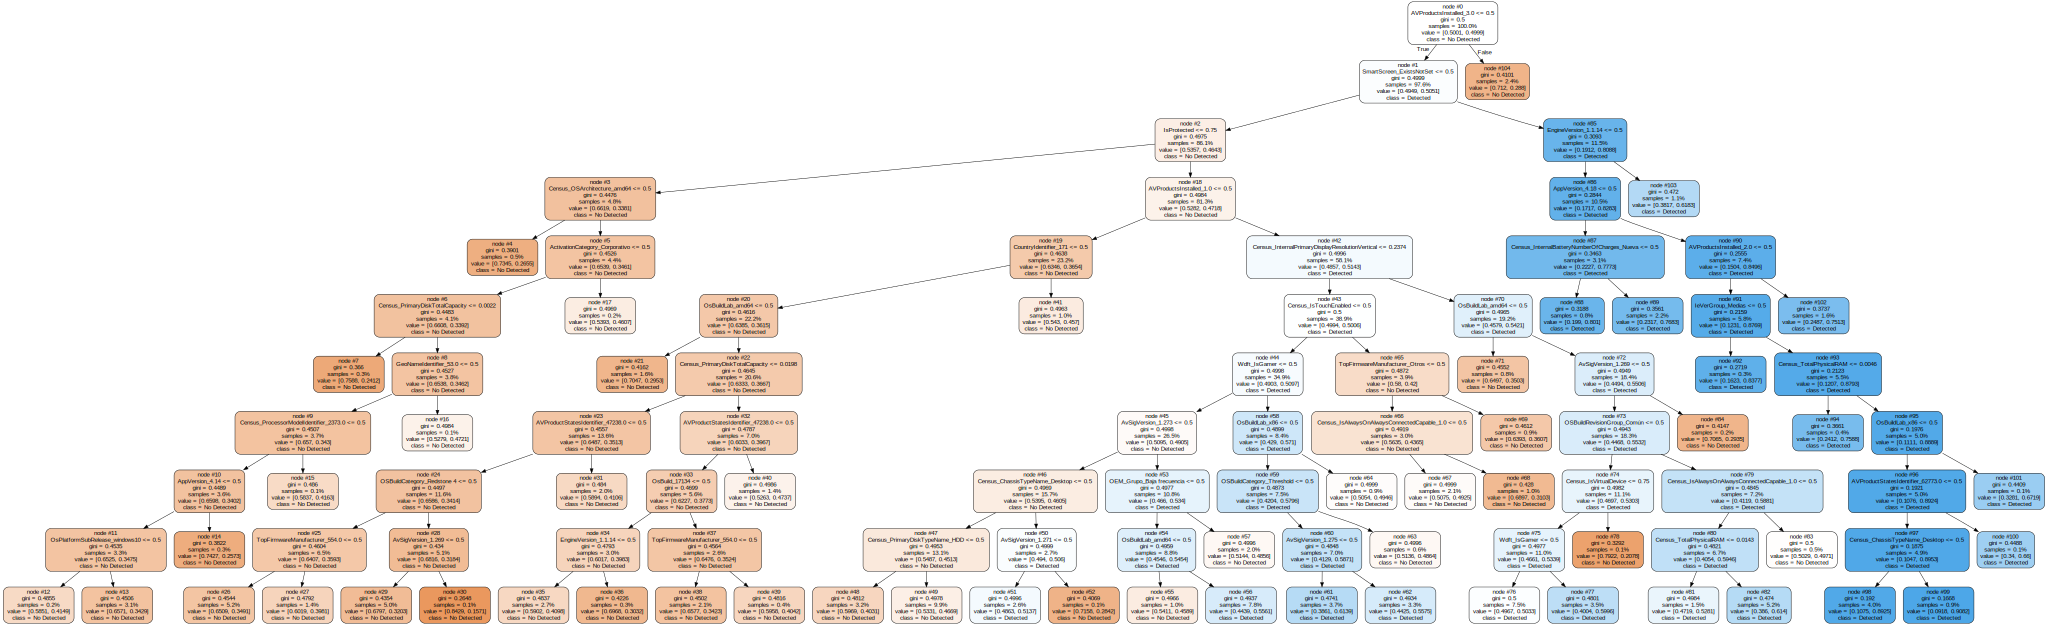

In [640]:
graphviz.Source(dot_data)

#### Feature Importance

In [641]:
modef1_rf.feature_importances_
top_features=pd.DataFrame(modef1_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False).head(30)
top_features

importance
SmartScreen_ExistsNotSet                                 0.27
AVProductsInstalled_1.0                                  0.10
AVProductStatesIdentifier_53447.0                        0.08
SmartScreen_RequireAdmin                                 0.05
AVProductStatesIdentifier_Other                          0.04
AVProductsInstalled_2.0                                  0.03
AvSigVersion_1.273                                       0.03
AVProductStatesIdentifier_7945.0                         0.02
Census_InternalPrimaryDiagonalDisplaySizeInInches        0.02
SmartScreen_Other                                        0.02
Census_TotalPhysicalRAM                                  0.02
EngineVersion_1.1.14                                     0.02
EngineVersion_1.1.15                                     0.01
AVProductsInstalled_3.0                                  0.01
Census_PrimaryDiskTotalCapacity                          0.01
AppVersion_4.14                                          0.01
AvSigVersion_1.271                                       0.01
Processor_x64                                            0.01
Census_PowerPlatformRoleName_Slate                       0.01
CPU_Grupo_Básico (1-2 cores)                             0.01
Wdft_IsGamer                                             0.01
Census_OSArchitecture_amd64                              0.01
Census_IsVirtualDevice                                   0.01
AppVersion_4.16                                          0.01
OsBuildLab_x86                                           0.01
Processor_x86                                            0.01
Census_InternalPrimaryDisplayResolutionHorizontal        0.01
IsProtected                                              0.01
AppVersion_4.18                                          0.01
AvSigVersion_1.275                                       0.01

<Axes: >

<Figure size 1500x500 with 0 Axes>

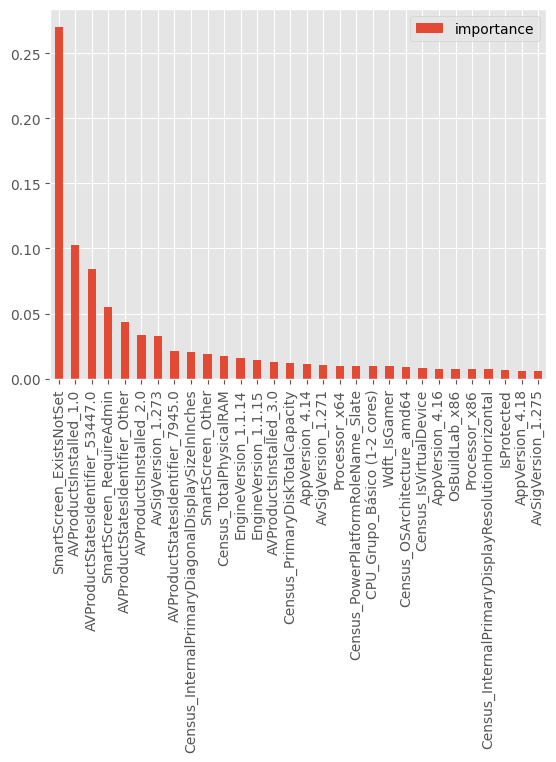

In [642]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

#### Evaluación del Modelo

##### Accuracy

In [643]:
#Calculamos Predicciones y lo one,o en un dataframe
y_test_pred= pd.DataFrame(modef1_rf.predict(X_test),index=X_test.index,columns=["HasDetections_Prediction"])

In [644]:
y_test_pred.head()

HasDetections_Prediction
MachineIdentifier                                         
9bd4ffe8aed4a371d310ce8611673bb3                         0
6f0d33a0801514c14dd4b16702e5a257                         0
6bdcf150ce78b177557bd10e11b2bb98                         0
055244220e9197f3212f361857ab9b84                         0
6dee50c43fc5cf23e1c4a8ad70fee068                         1

In [645]:
y_test_Dataframe= pd.DataFrame(y_test,index=X_test.index,columns=["HasDetections"])

In [646]:
y_test.head()

MachineIdentifier
9bd4ffe8aed4a371d310ce8611673bb3    1
6f0d33a0801514c14dd4b16702e5a257    1
6bdcf150ce78b177557bd10e11b2bb98    0
055244220e9197f3212f361857ab9b84    1
6dee50c43fc5cf23e1c4a8ad70fee068    1
Name: HasDetections, dtype: int64

In [647]:
results_df = pd.DataFrame(pd.concat([y_test, y_test_pred], axis=1))
results_df.head()

HasDetections  HasDetections_Prediction
MachineIdentifier                                                        
9bd4ffe8aed4a371d310ce8611673bb3              1                         0
6f0d33a0801514c14dd4b16702e5a257              1                         0
6bdcf150ce78b177557bd10e11b2bb98              0                         0
055244220e9197f3212f361857ab9b84              1                         0
6dee50c43fc5cf23e1c4a8ad70fee068              1                         1

In [648]:
results_df["Sucess"]=results_df["HasDetections"]==results_df["HasDetections_Prediction"].astype(int)

In [649]:
results_df["Sucess"].value_counts().head(10)
results_df

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
9bd4ffe8aed4a371d310ce8611673bb3              1                         0   
6f0d33a0801514c14dd4b16702e5a257              1                         0   
6bdcf150ce78b177557bd10e11b2bb98              0                         0   
055244220e9197f3212f361857ab9b84              1                         0   
6dee50c43fc5cf23e1c4a8ad70fee068              1                         1   
...                                         ...                       ...   
2bb775a0ac7cd83b221b0f68005c4d97              0                         1   
b48e5269b89c39c04fa83bd04bd55664              0                         0   
eddecf712b950760b9c7c4be130687bf              0                         1   
c0549ab2ac91281bc69145bed70dd84f              0                         1   
5bf0c48ef8c85491d3d206e82d05ac6f              1                         1   

                                  Sucess  
MachineIdentifier                         
9bd4ffe8aed4a371d310ce8611673bb3   False  
6f0d33a0801514c14dd4b16702e5a257   False  
6bdcf150ce78b177557bd10e11b2bb98    True  
055244220e9197f3212f361857ab9b84   False  
6dee50c43fc5cf23e1c4a8ad70fee068    True  
...                                  ...  
2bb775a0ac7cd83b221b0f68005c4d97   False  
b48e5269b89c39c04fa83bd04bd55664    True  
eddecf712b950760b9c7c4be130687bf   False  
c0549ab2ac91281bc69145bed70dd84f   False  
5bf0c48ef8c85491d3d206e82d05ac6f    True  

[80000 rows x 3 columns]

In [650]:
#porcentaje de aciertos
results_df["Sucess"].value_counts(normalize=True)

Sucess
True    0.62
False   0.38
Name: proportion, dtype: float64

El porcentaje de acierto del modelo es de 63% respecto al modelo basico del 50%


##### Confusion Matrix

In [651]:
Confusion_Matrix = metrics.confusion_matrix(y_test, y_test_pred)
Confusion_Matrix

array([[22890, 17083],
       [13189, 26838]])

In [652]:
#True Positives
TP=Confusion_Matrix[1,1]
TP

26838

In [653]:
#True Negatives
TN=Confusion_Matrix[0,0]
TN

22890

In [654]:
#False Positives
FP=Confusion_Matrix[0,1]
FP

17083

In [655]:
#False Negatives
FN=Confusion_Matrix[1,0]
FN

13189

In [656]:
# el modelo indica detecta el malware el 50% de las veces
(TP+FP)/len(results_df)

0.5490125

In [657]:
#Precision = TP / (TP + FP)
Precision=TP/(TP+FP)
Precision

0.6110516609366817

Cada vez que el modelo predice un malware 2 veces sobre 3 acierta.

In [658]:
#Recall = TP / (TP + FN)
Recall=TP/(TP+FN)
Recall

0.6704974142453843

In [659]:
#Verifica de las metricas
print("la precision es: ", precision_score(y_test, y_test_pred))
print("el recall es: ", recall_score(y_test, y_test_pred))
#print(metrics.classification_report(y_test, y_test_pred))

la precision es:  0.6110516609366817
el recall es:  0.6704974142453843


##### Probabilidad de acierto

In [660]:
y_score = pd.DataFrame(modef1_rf.predict_proba(X_test)[:,1],index=X_test.index,columns=["HasDetections_Probability"])

In [661]:
y_score.head()

HasDetections_Probability
MachineIdentifier                                          
9bd4ffe8aed4a371d310ce8611673bb3                       0.37
6f0d33a0801514c14dd4b16702e5a257                       0.47
6bdcf150ce78b177557bd10e11b2bb98                       0.37
055244220e9197f3212f361857ab9b84                       0.40
6dee50c43fc5cf23e1c4a8ad70fee068                       0.61

In [662]:
results_df= results_df.join(y_score, how='left')

results_df.head()

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
9bd4ffe8aed4a371d310ce8611673bb3              1                         0   
6f0d33a0801514c14dd4b16702e5a257              1                         0   
6bdcf150ce78b177557bd10e11b2bb98              0                         0   
055244220e9197f3212f361857ab9b84              1                         0   
6dee50c43fc5cf23e1c4a8ad70fee068              1                         1   

                                  Sucess  HasDetections_Probability  
MachineIdentifier                                                    
9bd4ffe8aed4a371d310ce8611673bb3   False                       0.37  
6f0d33a0801514c14dd4b16702e5a257   False                       0.47  
6bdcf150ce78b177557bd10e11b2bb98    True                       0.37  
055244220e9197f3212f361857ab9b84   False                       0.40  
6dee50c43fc5cf23e1c4a8ad70fee068    True                       0.61

##### F1 Score

In [663]:
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score=2*(Precision*Recall)/(Precision+Recall)
F1_Score

0.6393958164578073

In [664]:
f1_score(y_test, y_test_pred)

0.6393958164578072

In [665]:
#Verifica de las metricas
f1_score(y_test, y_test_pred)

0.6393958164578072

##### ROC Curve and ROC score

In [666]:
results_df.head()

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
9bd4ffe8aed4a371d310ce8611673bb3              1                         0   
6f0d33a0801514c14dd4b16702e5a257              1                         0   
6bdcf150ce78b177557bd10e11b2bb98              0                         0   
055244220e9197f3212f361857ab9b84              1                         0   
6dee50c43fc5cf23e1c4a8ad70fee068              1                         1   

                                  Sucess  HasDetections_Probability  
MachineIdentifier                                                    
9bd4ffe8aed4a371d310ce8611673bb3   False                       0.37  
6f0d33a0801514c14dd4b16702e5a257   False                       0.47  
6bdcf150ce78b177557bd10e11b2bb98    True                       0.37  
055244220e9197f3212f361857ab9b84   False                       0.40  
6dee50c43fc5cf23e1c4a8ad70fee068    True                       0.61

In [667]:
results_df.head().T

MachineIdentifier         9bd4ffe8aed4a371d310ce8611673bb3  \
HasDetections                                            1   
HasDetections_Prediction                                 0   
Sucess                                               False   
HasDetections_Probability                             0.37   

MachineIdentifier         6f0d33a0801514c14dd4b16702e5a257  \
HasDetections                                            1   
HasDetections_Prediction                                 0   
Sucess                                               False   
HasDetections_Probability                             0.47   

MachineIdentifier         6bdcf150ce78b177557bd10e11b2bb98  \
HasDetections                                            0   
HasDetections_Prediction                                 0   
Sucess                                                True   
HasDetections_Probability                             0.37   

MachineIdentifier         055244220e9197f3212f361857ab9b84  \
HasDetections                                            1   
HasDetections_Prediction                                 0   
Sucess                                               False   
HasDetections_Probability                             0.40   

MachineIdentifier         6dee50c43fc5cf23e1c4a8ad70fee068  
HasDetections                                            1  
HasDetections_Prediction                                 1  
Sucess                                                True  
HasDetections_Probability                             0.61

In [668]:
fpr, tpr, thresholds = metrics.roc_curve(results_df["HasDetections"],results_df["HasDetections_Probability"])

In [669]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

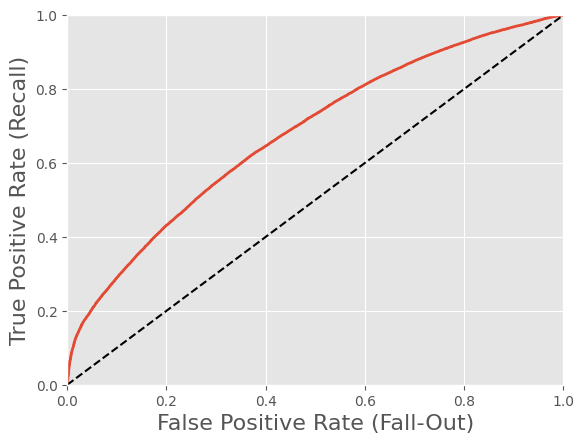

In [670]:
plot_roc_curve(fpr, tpr)

In [671]:
roc_auc_score(results_df["HasDetections"],results_df["HasDetections_Probability"])

0.6786903467282892

#### Tuning el modelo RandomForest: Overfitting y Crossvalidation

úsqueda del parámetro max_depht: analizamos el score entre train y test en función del max_depth del árbol. Cuando presente una diferencia entre train y test mayor a 1%, paramos el número de preguntas.

In [672]:
for i in range(1, 25,1):
    model_overfit = RandomForestClassifier(n_estimators=50,max_depth=i,min_samples_split=500,random_state=42)
    model_overfit.fit(X_train, y_train)
    acc_train=model_overfit.score(X_train, y_train)
    acc_test=model_overfit.score(X_test, y_test)
    acc_val=model_overfit.score(val_X, val_y)
    print("Para max_depth= ", i, " el accuracy de train es: ", round(acc_train,3), " el accuracy de test es: ", round(acc_test,3), "y el accuracy en validation es:", round(acc_val,3), "el overfitting es", round(acc_train-acc_test,3))

Para max_depth=  1  el accuracy de train es:  0.591  el accuracy de test es:  0.59 y el accuracy en validation es: 0.592 el overfitting es 0.0
Para max_depth=  2  el accuracy de train es:  0.607  el accuracy de test es:  0.605 y el accuracy en validation es: 0.609 el overfitting es 0.002
Para max_depth=  3  el accuracy de train es:  0.613  el accuracy de test es:  0.612 y el accuracy en validation es: 0.615 el overfitting es 0.001
Para max_depth=  4  el accuracy de train es:  0.614  el accuracy de test es:  0.612 y el accuracy en validation es: 0.615 el overfitting es 0.002
Para max_depth=  5  el accuracy de train es:  0.618  el accuracy de test es:  0.617 y el accuracy en validation es: 0.62 el overfitting es 0.001
Para max_depth=  6  el accuracy de train es:  0.62  el accuracy de test es:  0.617 y el accuracy en validation es: 0.62 el overfitting es 0.003
Para max_depth=  7  el accuracy de train es:  0.621  el accuracy de test es:  0.619 y el accuracy en validation es: 0.622 el overf

Podemos decir que a partir de la pregunta 20-21 el modelo empieza a presentar overfitting

##### Búsqueda del parametro min_samples_split.

In [674]:
for min_samples_split in range(50, 800, 50):
    model_overfit = RandomForestClassifier(n_estimators=50, max_depth=19,min_samples_split=min_samples_split, random_state=42)
    model_overfit.fit(X_train, y_train)
    acc_train = model_overfit.score(X_train, y_train)
    acc_test = model_overfit.score(X_test, y_test)
    acc_val=model_overfit.score(val_X, val_y)
    print("min_samples_split= ", min_samples_split, " el accuracy de train es: ", acc_train, " el accuracy de test es: ", acc_test, "y el accuracy en validation es:", acc_val, "el overfitting es", round(acc_train-acc_test,3))

min_samples_split=  50  el accuracy de train es:  0.678128125  el accuracy de test es:  0.639025 y el accuracy en validation es: 0.63887 el overfitting es 0.039
min_samples_split=  100  el accuracy de train es:  0.664890625  el accuracy de test es:  0.6379625 y el accuracy en validation es: 0.63856 el overfitting es 0.027
min_samples_split=  150  el accuracy de train es:  0.658734375  el accuracy de test es:  0.6372375 y el accuracy en validation es: 0.63778 el overfitting es 0.021
min_samples_split=  200  el accuracy de train es:  0.6561375  el accuracy de test es:  0.638075 y el accuracy en validation es: 0.63935 el overfitting es 0.018
min_samples_split=  250  el accuracy de train es:  0.65323125  el accuracy de test es:  0.6366875 y el accuracy en validation es: 0.63771 el overfitting es 0.017
min_samples_split=  300  el accuracy de train es:  0.65239375  el accuracy de test es:  0.6368625 y el accuracy en validation es: 0.63793 el overfitting es 0.016
min_samples_split=  350  el a

Notamos que el mejor resultados lo tenemos con un min_sample_split de 600

##### Analizamos el numero de estimators

In [675]:
for n_estimators in range(50, 100, 10):
    model_overfit = RandomForestClassifier(n_estimators=n_estimators, max_depth=19, min_samples_split=600, random_state=42)
    model_overfit.fit(X_train, y_train)
    acc_train = model_overfit.score(X_train, y_train)
    acc_test = model_overfit.score(X_test, y_test)
    acc_val=model_overfit.score(val_X, val_y)
    print("n_estimators= ", n_estimators, " el accuracy de train es: ", acc_train, " el accuracy de test es: ", acc_test, "y el accuracy en validation es:", acc_val, "el overfitting es", round(acc_train-acc_test,3))

n_estimators=  50  el accuracy de train es:  0.646515625  el accuracy de test es:  0.6361625 y el accuracy en validation es: 0.63677 el overfitting es 0.01
n_estimators=  60  el accuracy de train es:  0.647096875  el accuracy de test es:  0.6361875 y el accuracy en validation es: 0.63669 el overfitting es 0.011
n_estimators=  70  el accuracy de train es:  0.646853125  el accuracy de test es:  0.6365125 y el accuracy en validation es: 0.63639 el overfitting es 0.01
n_estimators=  80  el accuracy de train es:  0.646615625  el accuracy de test es:  0.636575 y el accuracy en validation es: 0.63643 el overfitting es 0.01
n_estimators=  90  el accuracy de train es:  0.646509375  el accuracy de test es:  0.6366 y el accuracy en validation es: 0.63611 el overfitting es 0.01


El numero de estimadores no influencia minimamente el resultado, finalmente lo dejamos en 60 estimadores

##### Random Forest con Kfold Validation

In [676]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [677]:
scores_list = []
for train_index, test_index in kf.split(df_Train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_X.iloc[train_index], dev_X.iloc[test_index]
    y_train, y_test = dev_y.iloc[train_index], dev_y.iloc[test_index]
    dt = RandomForestClassifier(n_estimators=90,max_depth=18,min_samples_split=350,random_state=42)
    dt.fit(X_train, y_train)
    _score = dt.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

[0.642075,
 0.63555,
 0.638475,
 0.63175,
 0.63235,
 0.633875,
 0.64005,
 0.63765,
 0.63855,
 0.630575]

In [678]:
np.mean(scores_list)

0.63609

In [679]:
np.std(scores_list)

0.0036621237008053076

No hay mejoria rescpecto al random holdout

### Random Forest con los datos de Validation

In [680]:
modef1_rf_val= RandomForestClassifier(
    n_estimators=90,
    max_depth=17,
    min_samples_split=350,
    random_state=42
)


In [681]:
#Model fit
modef1_rf_val.fit(val_X, val_y)

RandomForestClassifier(max_depth=17, min_samples_split=350, n_estimators=90,
                       random_state=42)

In [682]:
tree_list_val = modef1_rf_val.estimators_

In [683]:
modef1_rf_val.score(val_X, val_y)

0.64757

##### Ejemplo de Decision Three

In [684]:
dot_data_val = export_graphviz(
    decision_tree=tree_list_val[20],
    feature_names=X_train.columns,
    class_names=["No Detected", "Detected"],
    filled=True,
    leaves_parallel=False,
    impurity=True,
    node_ids=True,
    proportion=True,
    rotate=False,
    rounded=True,
    fontname='helvetica',
    precision=4,
)

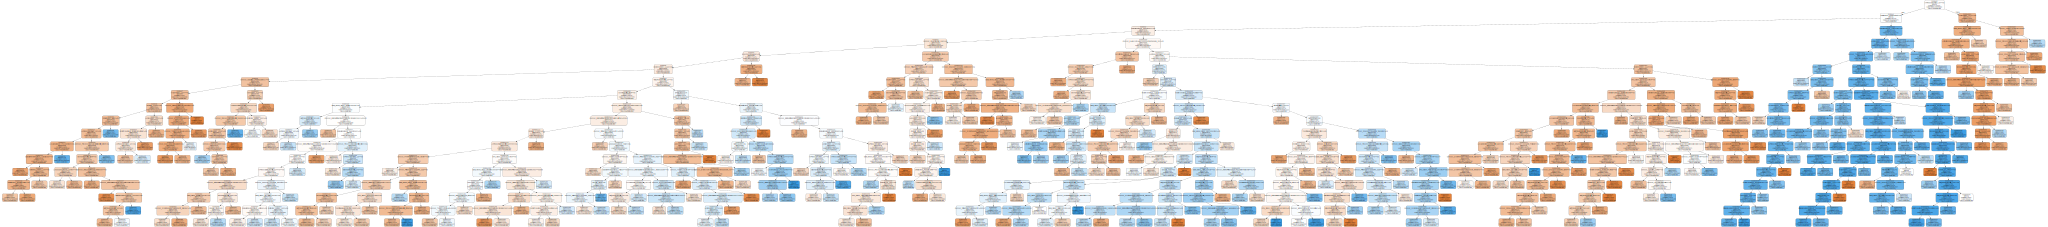

In [685]:
graphviz.Source(dot_data_val)

##### Feature importance

In [686]:
modef1_rf_val.feature_importances_
top_features=pd.DataFrame(modef1_rf_val.feature_importances_, index=val_X.columns, columns=['importance']).sort_values('importance', ascending=False).head(30)
top_features

importance
SmartScreen_ExistsNotSet                                 0.21
AVProductStatesIdentifier_53447.0                        0.06
AVProductsInstalled_1.0                                  0.06
SmartScreen_RequireAdmin                                 0.05
AVProductsInstalled_2.0                                  0.03
AVProductStatesIdentifier_Other                          0.03
SmartScreen_Other                                        0.03
AvSigVersion_1.273                                       0.03
Census_PrimaryDiskTotalCapacity                          0.02
Census_TotalPhysicalRAM                                  0.02
Census_InternalPrimaryDiagonalDisplaySizeInInches        0.02
AVProductStatesIdentifier_7945.0                         0.02
EngineVersion_1.1.15                                     0.02
Wdft_IsGamer                                             0.01
AVProductsInstalled_3.0                                  0.01
EngineVersion_1.1.14                                     0.01
Census_IsVirtualDevice                                   0.01
AvSigVersion_1.271                                       0.01
AppVersion_4.14                                          0.01
AppVersion_4.18                                          0.01
Census_InternalPrimaryDisplayResolutionHorizontal        0.01
AvSigVersion_1.269                                       0.01
AppVersion_4.16                                          0.01
InstallTypeGroup_Actualización                           0.01
Census_InternalPrimaryDisplayResolutionVertical          0.01
RtpStateBitfield                                         0.01
AvSigVersion_1.275                                       0.01
Census_IsAlwaysOnAlwaysConnectedCapable_1.0              0.01
Census_PowerPlatformRoleName_Slate                       0.01
IsProtected                                              0.01

<Axes: >

<Figure size 1500x500 with 0 Axes>

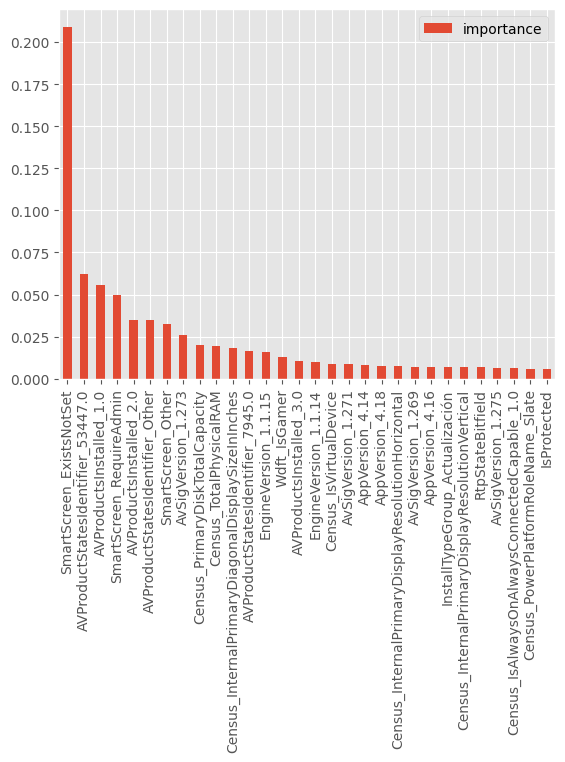

In [687]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

##### Evaluación del Modelo

###### Accuracy del modelo datos de Validación

In [688]:
#Calculamos Predicciones y lo one,o en un dataframe
y_val_pred= pd.DataFrame(modef1_rf.predict(val_X),index=val_X.index,columns=["HasDetections_Prediction"])

In [689]:
y_val_pred.head()

HasDetections_Prediction
MachineIdentifier                                         
376b1fe19f829bfc78e8bd91999ced44                         1
2db9d75a5375c95a83cadc4a84f3471c                         1
6f19c858baf1553e7871f51586784410                         0
8dfd5f486ca1abf8e568f3e5401319c1                         0
7a3436e946c709447348ed70c0fbf5c7                         1

In [690]:
y_val_Dataframe= pd.DataFrame(val_y,index=val_X.index,columns=["HasDetections"])

In [691]:
val_y.head()

MachineIdentifier
376b1fe19f829bfc78e8bd91999ced44    1
2db9d75a5375c95a83cadc4a84f3471c    1
6f19c858baf1553e7871f51586784410    0
8dfd5f486ca1abf8e568f3e5401319c1    0
7a3436e946c709447348ed70c0fbf5c7    1
Name: HasDetections, dtype: int64

In [692]:
results_RF_Val = pd.DataFrame(pd.concat([val_y, y_val_pred], axis=1))
results_RF_Val.head()

HasDetections  HasDetections_Prediction
MachineIdentifier                                                        
376b1fe19f829bfc78e8bd91999ced44              1                         1
2db9d75a5375c95a83cadc4a84f3471c              1                         1
6f19c858baf1553e7871f51586784410              0                         0
8dfd5f486ca1abf8e568f3e5401319c1              0                         0
7a3436e946c709447348ed70c0fbf5c7              1                         1

In [693]:
results_RF_Val["Sucess"]=results_RF_Val["HasDetections"]==results_RF_Val["HasDetections_Prediction"].astype(int)

In [694]:
results_RF_Val["Sucess"].value_counts()
results_RF_Val

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
376b1fe19f829bfc78e8bd91999ced44              1                         1   
2db9d75a5375c95a83cadc4a84f3471c              1                         1   
6f19c858baf1553e7871f51586784410              0                         0   
8dfd5f486ca1abf8e568f3e5401319c1              0                         0   
7a3436e946c709447348ed70c0fbf5c7              1                         1   
...                                         ...                       ...   
4b56ae3d1050aff7e898ed8dd22e5028              0                         0   
f2b5a8557af5d1987d76d2e6fb026c0f              1                         1   
12e50047852ad0face417a4367cf2578              1                         0   
d886e3ffb04ddeca3bf122834a5c9d7e              0                         0   
23433f52a6b23874ae99fc3f50bbbd89              1                         1   

                                  Sucess  
MachineIdentifier                         
376b1fe19f829bfc78e8bd91999ced44    True  
2db9d75a5375c95a83cadc4a84f3471c    True  
6f19c858baf1553e7871f51586784410    True  
8dfd5f486ca1abf8e568f3e5401319c1    True  
7a3436e946c709447348ed70c0fbf5c7    True  
...                                  ...  
4b56ae3d1050aff7e898ed8dd22e5028    True  
f2b5a8557af5d1987d76d2e6fb026c0f    True  
12e50047852ad0face417a4367cf2578   False  
d886e3ffb04ddeca3bf122834a5c9d7e    True  
23433f52a6b23874ae99fc3f50bbbd89    True  

[100000 rows x 3 columns]

In [695]:
#porcentaje de aciertos
results_RF_Val["Sucess"].value_counts(normalize=True)

Sucess
True    0.62
False   0.38
Name: proportion, dtype: float64

El porcentaje de acierto del modelo es de 65% respecto al modelo basico del 50%

###### Confusion Matrix

In [696]:
Confusion_Matrix_VAl = metrics.confusion_matrix(val_y, y_val_pred)
Confusion_Matrix_VAl

array([[28614, 21364],
       [16218, 33804]])

In [697]:
#True Positives
TP=Confusion_Matrix_VAl[1,1]
TP

33804

In [698]:
#True Negatives
TN=Confusion_Matrix_VAl[0,0]
TN

28614

In [699]:
#False Positives
FP=Confusion_Matrix_VAl[0,1]
FP

21364

In [700]:
#False Negatives
FN=Confusion_Matrix_VAl[1,0]
FN

16218

In [701]:
# el modelo indica detecta el malware el 49 como en el caso de los datos de test
(TP+FP)/len(results_RF_Val)

0.55168

In [702]:
#Precision = TP / (TP + FP)
Precision=TP/(TP+FP)
Precision

0.6127465197215777

Cada vez que el modelo predice un malware 2 de cada 3 veces acierta.

In [703]:
#Recall = TP / (TP + FN)
Recall=TP/(TP+FN)
Recall

0.6757826556315222

In [704]:
#Verifica de las metricas
print("la precision es: ", precision_score(val_y, y_val_pred))
print("el recall es: ", recall_score(val_y, y_val_pred))
#print(metrics.classification_report(y_test, y_test_pred))

la precision es:  0.6127465197215777
el recall es:  0.6757826556315222


###### Probabilidad de acierto

In [705]:
y_score_val = pd.DataFrame(modef1_rf.predict_proba(val_X)[:,1],index=val_X.index,columns=["HasDetections_Probability"])

In [706]:
y_score_val.head()

HasDetections_Probability
MachineIdentifier                                          
376b1fe19f829bfc78e8bd91999ced44                       0.58
2db9d75a5375c95a83cadc4a84f3471c                       0.54
6f19c858baf1553e7871f51586784410                       0.35
8dfd5f486ca1abf8e568f3e5401319c1                       0.41
7a3436e946c709447348ed70c0fbf5c7                       0.58

In [707]:

results_RF_Val= results_RF_Val.join(y_score_val, how='left')

results_RF_Val.head()

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
376b1fe19f829bfc78e8bd91999ced44              1                         1   
2db9d75a5375c95a83cadc4a84f3471c              1                         1   
6f19c858baf1553e7871f51586784410              0                         0   
8dfd5f486ca1abf8e568f3e5401319c1              0                         0   
7a3436e946c709447348ed70c0fbf5c7              1                         1   

                                  Sucess  HasDetections_Probability  
MachineIdentifier                                                    
376b1fe19f829bfc78e8bd91999ced44    True                       0.58  
2db9d75a5375c95a83cadc4a84f3471c    True                       0.54  
6f19c858baf1553e7871f51586784410    True                       0.35  
8dfd5f486ca1abf8e568f3e5401319c1    True                       0.41  
7a3436e946c709447348ed70c0fbf5c7    True                       0.58

###### F1 Score

In [708]:
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score=2*(Precision*Recall)/(Precision+Recall)
F1_Score

0.6427226922711284

In [709]:
#Verifica de las metricas
f1_score(val_y, y_val_pred)

0.6427226922711284

###### ROC Curve and ROC score

In [710]:
results_RF_Val.head()

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
376b1fe19f829bfc78e8bd91999ced44              1                         1   
2db9d75a5375c95a83cadc4a84f3471c              1                         1   
6f19c858baf1553e7871f51586784410              0                         0   
8dfd5f486ca1abf8e568f3e5401319c1              0                         0   
7a3436e946c709447348ed70c0fbf5c7              1                         1   

                                  Sucess  HasDetections_Probability  
MachineIdentifier                                                    
376b1fe19f829bfc78e8bd91999ced44    True                       0.58  
2db9d75a5375c95a83cadc4a84f3471c    True                       0.54  
6f19c858baf1553e7871f51586784410    True                       0.35  
8dfd5f486ca1abf8e568f3e5401319c1    True                       0.41  
7a3436e946c709447348ed70c0fbf5c7    True                       0.58

In [711]:
fpr, tpr, thresholds = metrics.roc_curve(results_RF_Val["HasDetections"],results_RF_Val["HasDetections_Probability"])

In [712]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

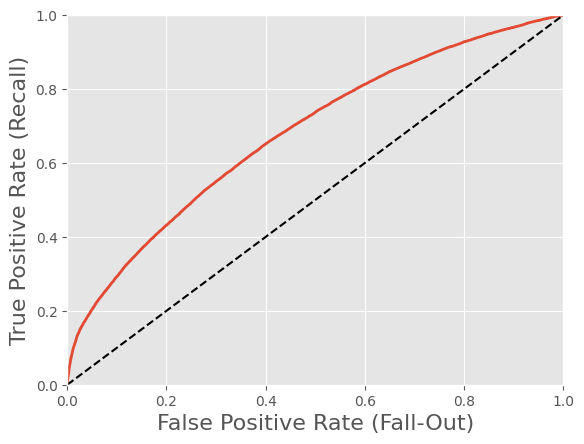

In [713]:
plot_roc_curve(fpr, tpr)

In [714]:
roc_auc_score(results_RF_Val["HasDetections"],results_RF_Val["HasDetections_Probability"])

0.6803619661180766

## 5.3 ADA BOOST

In [792]:
ada_clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

ada_clf.fit(X_train, y_train)

acc_train = ada_clf.score(X_train, y_train)
acc_test = ada_clf.score(X_test, y_test)

print(f"Accuracy en train: {round(acc_train, 3)}")
print(f"Accuracy en test: {round(acc_test, 3)}")
print(f"Overfitting: {round(acc_train - acc_test, 3)}")


Accuracy en train: 0.613
Accuracy en test: 0.619
Overfitting: -0.006


In [793]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

### Feature Importance

In [794]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Usar un árbol base con mayor profundidad
base_estimator = DecisionTreeClassifier(max_depth=3)

# Aumentar n_estimators
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=200, learning_rate=0.5, random_state=42)

# Entrenar el modelo
ada_clf.fit(X_train, y_train)

# Obtener la importancia de las características
if hasattr(ada_clf, "feature_importances_"):
    top_features = pd.DataFrame(
        ada_clf.feature_importances_,
        index=val_X.columns,
        columns=['importance']
    ).sort_values('importance', ascending=False).head(20)

    print(top_features)
else:
    print("El modelo no tiene el atributo feature_importances_")


                                                   importance
SmartScreen_ExistsNotSet                                 0.29
AVProductStatesIdentifier_53447.0                        0.09
RtpStateBitfield                                         0.08
Census_InternalPrimaryDiagonalDisplaySizeInInches        0.05
Census_IsVirtualDevice                                   0.05
AppVersion_4.18                                          0.04
SMode                                                    0.03
Census_TotalPhysicalRAM                                  0.03
AppVersion_4.14                                          0.02
AppVersion_4.16                                          0.02
AVProductStatesIdentifier_Other                          0.02
AVProductStatesIdentifier_7945.0                         0.02
AvSigVersion_1.271                                       0.02
LocaleEnglishNameIdentifier_182                          0.02
AVProductsInstalled_3.0                                  0.01
AvSigVer

<Axes: >

<Figure size 1500x500 with 0 Axes>

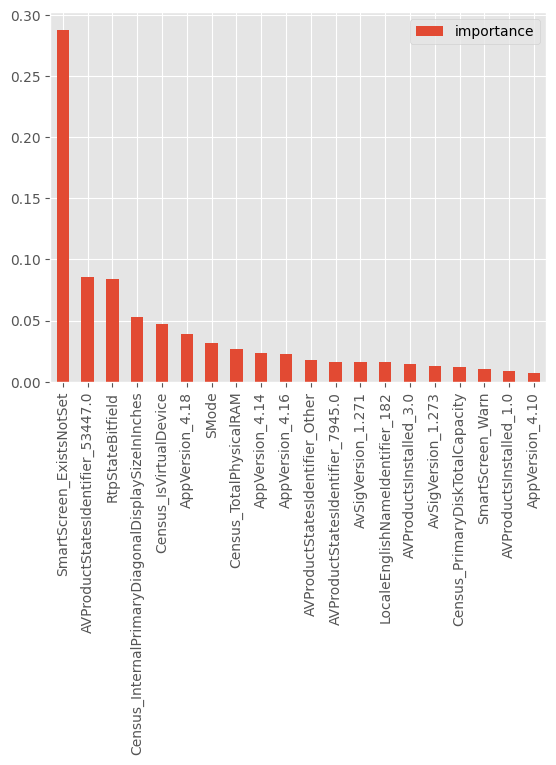

In [795]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

### Evaluación del Modelo Adaboost

#### Accuracy

In [757]:
y_test_pred= pd.DataFrame(ada_clf.predict(X_test),index=X_test.index,columns=["HasDetections_Prediction"])

In [758]:
y_test_pred.head()

HasDetections_Prediction
MachineIdentifier                                         
6c3ff3036d3ecc96729a615653742608                         0
eaa1b0097a1265915dfe8a17e4bb08be                         0
e33406a6129620f28107078aa0d48f3d                         0
f66cd10a282bd1eb06a19df3e428d184                         0
4ea7c746316d5fc5c474f11097d2131d                         0

In [759]:
y_test_Dataframe= pd.DataFrame(y_test,index=X_test.index,columns=["HasDetections_Actual"])

In [760]:
y_test.head()

MachineIdentifier
6c3ff3036d3ecc96729a615653742608    1
eaa1b0097a1265915dfe8a17e4bb08be    1
e33406a6129620f28107078aa0d48f3d    0
f66cd10a282bd1eb06a19df3e428d184    0
4ea7c746316d5fc5c474f11097d2131d    1
Name: HasDetections, dtype: int64

In [761]:
results_df_ada1 = pd.concat([y_test, y_test_pred], axis=1)

In [762]:
results_df_ada1

HasDetections  HasDetections_Prediction
MachineIdentifier                                                        
6c3ff3036d3ecc96729a615653742608              1                         0
eaa1b0097a1265915dfe8a17e4bb08be              1                         0
e33406a6129620f28107078aa0d48f3d              0                         0
f66cd10a282bd1eb06a19df3e428d184              0                         0
4ea7c746316d5fc5c474f11097d2131d              1                         0
...                                         ...                       ...
1bd7be32ec3d52a481b0eb95ff2b410c              0                         0
bf813c4960491f201e17bf5377b8e4bc              1                         0
7bfa76072db3b0c18503f12f6ac2cdcb              1                         0
1e395f5a138a77514322a1201de81a27              0                         0
a687cfd1252ee03ce9658eaf15bdf40e              0                         0

[40000 rows x 2 columns]

In [763]:
results_df_ada1["Sucess"]=results_df_ada1["HasDetections"]==results_df_ada1["HasDetections_Prediction"].astype(int)

In [764]:
results_df_ada1["Sucess"].value_counts()

Sucess
True     22823
False    17177
Name: count, dtype: int64

In [765]:
results_df_ada1

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
6c3ff3036d3ecc96729a615653742608              1                         0   
eaa1b0097a1265915dfe8a17e4bb08be              1                         0   
e33406a6129620f28107078aa0d48f3d              0                         0   
f66cd10a282bd1eb06a19df3e428d184              0                         0   
4ea7c746316d5fc5c474f11097d2131d              1                         0   
...                                         ...                       ...   
1bd7be32ec3d52a481b0eb95ff2b410c              0                         0   
bf813c4960491f201e17bf5377b8e4bc              1                         0   
7bfa76072db3b0c18503f12f6ac2cdcb              1                         0   
1e395f5a138a77514322a1201de81a27              0                         0   
a687cfd1252ee03ce9658eaf15bdf40e              0                         0   

                                  Sucess  
MachineIdentifier                         
6c3ff3036d3ecc96729a615653742608   False  
eaa1b0097a1265915dfe8a17e4bb08be   False  
e33406a6129620f28107078aa0d48f3d    True  
f66cd10a282bd1eb06a19df3e428d184    True  
4ea7c746316d5fc5c474f11097d2131d   False  
...                                  ...  
1bd7be32ec3d52a481b0eb95ff2b410c    True  
bf813c4960491f201e17bf5377b8e4bc   False  
7bfa76072db3b0c18503f12f6ac2cdcb   False  
1e395f5a138a77514322a1201de81a27    True  
a687cfd1252ee03ce9658eaf15bdf40e    True  

[40000 rows x 3 columns]

In [766]:
#porcentaje de aciertos
results_df_ada1["Sucess"].value_counts(normalize=True)

Sucess
True    0.57
False   0.43
Name: proportion, dtype: float64

El porcentaje de acierto del modelo es de 62% respecto al modelo basico del 50%


#### Confusion Matrix

In [767]:
Confusion_Matrix = metrics.confusion_matrix(y_test, y_test_pred)
Confusion_Matrix

array([[19150,   926],
       [16251,  3673]])

In [768]:
#True Positives
TP=Confusion_Matrix[1,1]
TP

3673

In [769]:
#True Negatives
TN=Confusion_Matrix[0,0]
TN

19150

In [770]:
#False Positives
FP=Confusion_Matrix[0,1]
FP

926

In [771]:
#False Negatives
FN=Confusion_Matrix[1,0]
FN

16251

In [772]:
#Precision = TP / (TP + FP)
Precision=TP/(TP+FP)
Precision

0.7986518808436617

In [773]:
#Recall = TP / (TP + FN)
Recall=TP/(TP+FN)
Recall

0.1843505320216824

In [774]:
#Verifica de las metricas
print("la precision es: ", precision_score(y_test, y_test_pred))
print("el recall es: ", recall_score(y_test, y_test_pred))
#print(metrics.classification_report(y_test, y_test_pred))

la precision es:  0.7986518808436617
el recall es:  0.1843505320216824


#### Probabilidad de acierto

In [775]:
y_score_ada = pd.DataFrame(ada_clf.predict_proba(X_test)[:,1],index=X_test.index,columns=["HasDetections_Probability"])

In [776]:
y_score_ada.head()

HasDetections_Probability
MachineIdentifier                                          
6c3ff3036d3ecc96729a615653742608                       0.15
eaa1b0097a1265915dfe8a17e4bb08be                       0.15
e33406a6129620f28107078aa0d48f3d                       0.15
f66cd10a282bd1eb06a19df3e428d184                       0.15
4ea7c746316d5fc5c474f11097d2131d                       0.15

In [777]:
results_df_ada1

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
6c3ff3036d3ecc96729a615653742608              1                         0   
eaa1b0097a1265915dfe8a17e4bb08be              1                         0   
e33406a6129620f28107078aa0d48f3d              0                         0   
f66cd10a282bd1eb06a19df3e428d184              0                         0   
4ea7c746316d5fc5c474f11097d2131d              1                         0   
...                                         ...                       ...   
1bd7be32ec3d52a481b0eb95ff2b410c              0                         0   
bf813c4960491f201e17bf5377b8e4bc              1                         0   
7bfa76072db3b0c18503f12f6ac2cdcb              1                         0   
1e395f5a138a77514322a1201de81a27              0                         0   
a687cfd1252ee03ce9658eaf15bdf40e              0                         0   

                                  Sucess  
MachineIdentifier                         
6c3ff3036d3ecc96729a615653742608   False  
eaa1b0097a1265915dfe8a17e4bb08be   False  
e33406a6129620f28107078aa0d48f3d    True  
f66cd10a282bd1eb06a19df3e428d184    True  
4ea7c746316d5fc5c474f11097d2131d   False  
...                                  ...  
1bd7be32ec3d52a481b0eb95ff2b410c    True  
bf813c4960491f201e17bf5377b8e4bc   False  
7bfa76072db3b0c18503f12f6ac2cdcb   False  
1e395f5a138a77514322a1201de81a27    True  
a687cfd1252ee03ce9658eaf15bdf40e    True  

[40000 rows x 3 columns]

In [778]:

results_df_ada1 = pd.concat([results_df_ada1, y_score_ada], axis=1)

results_df_ada1.head()

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
6c3ff3036d3ecc96729a615653742608              1                         0   
eaa1b0097a1265915dfe8a17e4bb08be              1                         0   
e33406a6129620f28107078aa0d48f3d              0                         0   
f66cd10a282bd1eb06a19df3e428d184              0                         0   
4ea7c746316d5fc5c474f11097d2131d              1                         0   

                                  Sucess  HasDetections_Probability  
MachineIdentifier                                                    
6c3ff3036d3ecc96729a615653742608   False                       0.15  
eaa1b0097a1265915dfe8a17e4bb08be   False                       0.15  
e33406a6129620f28107078aa0d48f3d    True                       0.15  
f66cd10a282bd1eb06a19df3e428d184    True                       0.15  
4ea7c746316d5fc5c474f11097d2131d   False                       0.15

#### F1 Score

In [779]:
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score=2*(Precision*Recall)/(Precision+Recall)
F1_Score

0.29955551930840435

In [780]:
#Verifica de las metricas
f1_score(y_test, y_test_pred)

0.29955551930840435

#### ROC Curve and ROC score

In [781]:
fpr, tpr, thresholds = metrics.roc_curve(results_df_ada1["HasDetections"],results_df_ada1["HasDetections_Probability"])

In [782]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

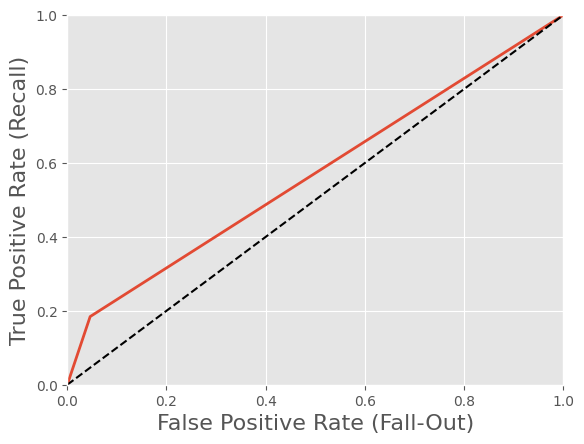

In [783]:
plot_roc_curve(fpr, tpr)

In [784]:
roc_auc_score(y_test, y_test_pred)

0.5691129029903192

###Tuning el modelo AdaBoost: Overfitting y Crossvalidation

Búsqueda del parametro max_deph: analizamos el score entre train y test en función del max_depth del árbol. cuando la diferencia entre train y test sea mayor a 1%, paramos las preguntas, ya que el modelo presentará overfitting

In [797]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

for i in range(1, 20, 1):
    base_estimator = DecisionTreeClassifier(max_depth=i)  # Definir un árbol base con max_depth
    model_overfit = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=0.5, random_state=42)

    model_overfit.fit(X_train, y_train)

    acc_train = model_overfit.score(X_train, y_train)
    acc_test = model_overfit.score(X_test, y_test)
    acc_val = model_overfit.score(val_X, val_y)

    print(f"Para max_depth= {i}, el accuracy de train es: {round(acc_train, 3)}, el accuracy de test es: {round(acc_test, 3)}, el accuracy en validation es: {round(acc_val, 3)}, el overfitting es {round(acc_train - acc_test, 3)}")


Para max_depth= 1, el accuracy de train es: 0.618, el accuracy de test es: 0.624, el accuracy en validation es: 0.62, el overfitting es -0.006
Para max_depth= 2, el accuracy de train es: 0.621, el accuracy de test es: 0.626, el accuracy en validation es: 0.622, el overfitting es -0.005
Para max_depth= 3, el accuracy de train es: 0.625, el accuracy de test es: 0.631, el accuracy en validation es: 0.625, el overfitting es -0.006
Para max_depth= 4, el accuracy de train es: 0.63, el accuracy de test es: 0.635, el accuracy en validation es: 0.63, el overfitting es -0.005
Para max_depth= 5, el accuracy de train es: 0.632, el accuracy de test es: 0.637, el accuracy en validation es: 0.632, el overfitting es -0.004
Para max_depth= 6, el accuracy de train es: 0.634, el accuracy de test es: 0.638, el accuracy en validation es: 0.634, el overfitting es -0.004
Para max_depth= 7, el accuracy de train es: 0.639, el accuracy de test es: 0.642, el accuracy en validation es: 0.638, el overfitting es -0

KeyboardInterrupt: 

##### Búsqueda del parametro min_samples_split.

In [786]:
for i in np.arange(0.1, 1.0, 0.1):
   model_overfit = AdaBoostClassifier(n_estimators=10, learning_rate=i, random_state=42)
   model_overfit.fit(X_train, y_train)
   acc_train = model_overfit.score(X_train, y_train)
   acc_test = model_overfit.score(X_test, y_test)
   acc_val=model_overfit.score(val_X, val_y)
   print("learning_rate= ", i, " el accuracy de train es: ", round(acc_train,3), " el accuracy de test es: ", round(acc_test,3), "y el accuracy en validation es:", round(acc_val,3), "el overfitting es", round(acc_train-acc_test,3))

learning_rate=  0.1  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
learning_rate=  0.2  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
learning_rate=  0.30000000000000004  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
learning_rate=  0.4  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
learning_rate=  0.5  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
learning_rate=  0.6  el accuracy de train es:  0.589  el accuracy de test es:  0.583 y el accuracy en validation es: 0.591 el overfitting es 0.005
learning_rate=  0.7000000000000001  el accuracy de train es:  0.608  el accuracy de test es:  0.604 y 

El learning rate lo dejamos a 0.1

##### Analizamos el numero de estimators

In [787]:
for n_estimators in range(50, 120, 10):
  model_overfit= AdaBoostClassifier(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
  model_overfit.fit(X_train, y_train)
  acc_train = model_overfit.score(X_train, y_train)
  acc_test = model_overfit.score(X_test, y_test)
  acc_val=model_overfit.score(val_X, val_y)
  print("n_estimators= ", n_estimators, " el accuracy de train es: ", round(acc_train,3), " el accuracy de test es: ", round(acc_test,3), "y el accuracy en validation es:", round(acc_val,3), "el overfitting es", round(acc_train-acc_test,3))

n_estimators=  50  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
n_estimators=  60  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
n_estimators=  70  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
n_estimators=  80  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
n_estimators=  90  el accuracy de train es:  0.572  el accuracy de test es:  0.571 y el accuracy en validation es: 0.572 el overfitting es 0.001
n_estimators=  100  el accuracy de train es:  0.603  el accuracy de test es:  0.601 y el accuracy en validation es: 0.605 el overfitting es 0.002
n_estimators=  110  el accuracy de train es:  0.613  el accuracy de test es:  0.609 y el accuracy en validation es: 0.614 el over

El numero de estimadores no influencia el resultado, lo dejamos a 50

### Ada Boost con Kfold Validation

In [789]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [798]:
scores_list = []
for train_index, test_index in kf.split(df_Train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_X.iloc[train_index], dev_X.iloc[test_index]
    y_train, y_test = dev_y.iloc[train_index], dev_y.iloc[test_index]
    dt = AdaBoostClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
    dt.fit(X_train, y_train)
    _score = dt.score(X_test, y_test)
    scores_list.append(_score)
scores_list

TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [    24     54     76 ... 399970 399978 399982]
TRAIN: [     0      1      3 ... 399997 399998 399999] TEST: [     2      7     11 ... 399968 399980 399984]
TRAIN: [     1      2      3 ... 399994 399996 399998] TEST: [     0     16     17 ... 399995 399997 399999]


KeyboardInterrupt: 

### Ada Boost con los datos de Validation

In [799]:
base_estimator = DecisionTreeClassifier(max_depth=5)
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=0.1, random_state=42)
ada_clf.fit(X_train, y_train)
acc_train = ada_clf.score(X_train, y_train)
acc_test = ada_clf.score(X_test, y_test)
print(f"Accuracy en train: {round(acc_train, 3)}")
print(f"Accuracy en test: {round(acc_test, 3)}")
print(f"Overfitting: {round(acc_train - acc_test, 3)}")


Accuracy en train: 0.627
Accuracy en test: 0.629
Overfitting: -0.002


In [800]:
ada_clf.fit(val_X, val_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, random_state=42)

In [801]:
ada_list_val = ada_clf.estimators_

In [802]:
ada_clf.score(val_X, val_y)

0.62865

###Feature importance

In [833]:
if hasattr(ada_clf, "feature_importances_"):
    top_features = pd.DataFrame(
        ada_clf.feature_importances_,
        index=val_X.columns,
        columns=['importance']
    ).sort_values('importance', ascending=False).head(20)

    print(top_features)
else:
    print("El modelo no tiene el atributo feature_importances_")


                                                   importance
SmartScreen_ExistsNotSet                                 0.56
AVProductStatesIdentifier_53447.0                        0.13
Census_IsVirtualDevice                                   0.03
Census_InternalPrimaryDiagonalDisplaySizeInInches        0.03
EngineVersion_1.1.15                                     0.02
AppVersion_4.18                                          0.02
AppVersion_4.14                                          0.01
AppVersion_4.16                                          0.01
Census_TotalPhysicalRAM                                  0.01
Wdft_IsGamer                                             0.01
AvSigVersion_1.271                                       0.01
Census_PrimaryDiskTotalCapacity                          0.01
EngineVersion_1.1.14                                     0.01
InstallTypeGroup_Actualización                           0.01
RtpStateBitfield                                         0.01
AvSigVer

<Axes: >

<Figure size 1500x500 with 0 Axes>

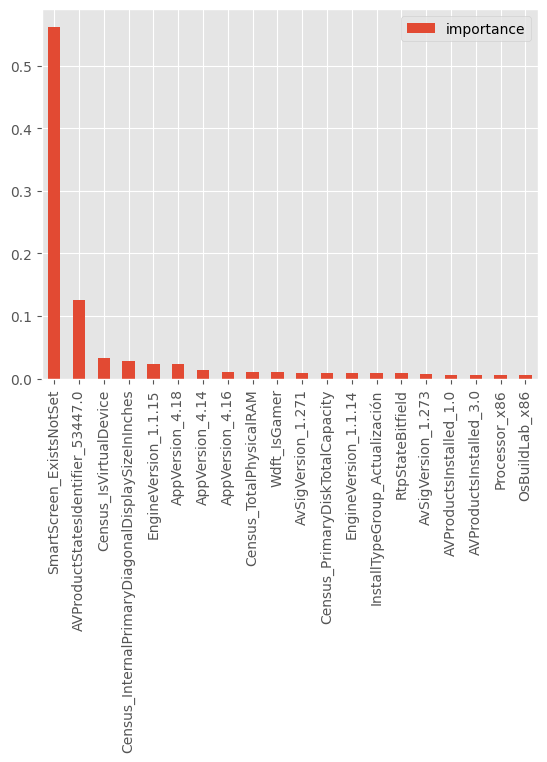

In [834]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

### Evaluacion del Modelo

##### Accuracy

In [835]:
#Calculamos Predicciones y lo one,o en un dataframe
y_val_pred= pd.DataFrame(ada_clf.predict(val_X),index=val_X.index,columns=["HasDetections_Prediction"])

In [836]:
y_val_pred.head()

HasDetections_Prediction
MachineIdentifier                                         
376b1fe19f829bfc78e8bd91999ced44                         1
2db9d75a5375c95a83cadc4a84f3471c                         1
6f19c858baf1553e7871f51586784410                         0
8dfd5f486ca1abf8e568f3e5401319c1                         0
7a3436e946c709447348ed70c0fbf5c7                         1

In [837]:
y_val_Dataframe= pd.DataFrame(val_y,index=val_X.index,columns=["HasDetections"])

In [838]:
val_y.head()

MachineIdentifier
376b1fe19f829bfc78e8bd91999ced44    1
2db9d75a5375c95a83cadc4a84f3471c    1
6f19c858baf1553e7871f51586784410    0
8dfd5f486ca1abf8e568f3e5401319c1    0
7a3436e946c709447348ed70c0fbf5c7    1
Name: HasDetections, dtype: int64

In [839]:
results_ADA_Val = pd.DataFrame(pd.concat([val_y, y_val_pred], axis=1))
results_ADA_Val.head()

HasDetections  HasDetections_Prediction
MachineIdentifier                                                        
376b1fe19f829bfc78e8bd91999ced44              1                         1
2db9d75a5375c95a83cadc4a84f3471c              1                         1
6f19c858baf1553e7871f51586784410              0                         0
8dfd5f486ca1abf8e568f3e5401319c1              0                         0
7a3436e946c709447348ed70c0fbf5c7              1                         1

In [840]:
results_ADA_Val["Sucess"]=results_ADA_Val["HasDetections"]==results_ADA_Val["HasDetections_Prediction"].astype(int)

In [841]:
results_ADA_Val["Sucess"].value_counts()
results_ADA_Val

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
376b1fe19f829bfc78e8bd91999ced44              1                         1   
2db9d75a5375c95a83cadc4a84f3471c              1                         1   
6f19c858baf1553e7871f51586784410              0                         0   
8dfd5f486ca1abf8e568f3e5401319c1              0                         0   
7a3436e946c709447348ed70c0fbf5c7              1                         1   
...                                         ...                       ...   
4b56ae3d1050aff7e898ed8dd22e5028              0                         0   
f2b5a8557af5d1987d76d2e6fb026c0f              1                         1   
12e50047852ad0face417a4367cf2578              1                         0   
d886e3ffb04ddeca3bf122834a5c9d7e              0                         0   
23433f52a6b23874ae99fc3f50bbbd89              1                         1   

                                  Sucess  
MachineIdentifier                         
376b1fe19f829bfc78e8bd91999ced44    True  
2db9d75a5375c95a83cadc4a84f3471c    True  
6f19c858baf1553e7871f51586784410    True  
8dfd5f486ca1abf8e568f3e5401319c1    True  
7a3436e946c709447348ed70c0fbf5c7    True  
...                                  ...  
4b56ae3d1050aff7e898ed8dd22e5028    True  
f2b5a8557af5d1987d76d2e6fb026c0f    True  
12e50047852ad0face417a4367cf2578   False  
d886e3ffb04ddeca3bf122834a5c9d7e    True  
23433f52a6b23874ae99fc3f50bbbd89    True  

[100000 rows x 3 columns]

In [842]:
#porcentaje de aciertos
results_ADA_Val["Sucess"].value_counts(normalize=True)

Sucess
True    0.63
False   0.37
Name: proportion, dtype: float64

El porcentaje de acierto del modelo es de 65% respecto al modelo basico del 50%

##### Confusion Matrix

In [843]:
Confusion_Matrix_VAl = metrics.confusion_matrix(val_y, y_val_pred)
Confusion_Matrix_VAl

array([[30878, 19100],
       [18035, 31987]])

In [844]:
#True Positives
TP=Confusion_Matrix_VAl[1,1]
TP

31987

In [845]:
#True Negatives
TN=Confusion_Matrix_VAl[0,0]
TN

30878

In [846]:
#False Positives
FP=Confusion_Matrix_VAl[0,1]
FP

19100

In [847]:
#False Negatives
FN=Confusion_Matrix_VAl[1,0]
FN

18035

In [848]:
# el modelo indica detecta el malware el 49 como en el caso de los datos de test
(TP+FP)/len(results_ADA_Val)

0.51087

In [849]:
#Precision = TP / (TP + FP)
Precision=TP/(TP+FP)
Precision

0.6261279777634232

In [850]:
#Recall = TP / (TP + FN)
Recall=TP/(TP+FN)
Recall

0.6394586381991924

In [851]:
#Verifica de las metricas
print("la precision es: ", precision_score(val_y, y_val_pred))
print("el recall es: ", recall_score(val_y, y_val_pred))
#print(metrics.classification_report(y_test, y_test_pred))

la precision es:  0.6261279777634232
el recall es:  0.6394586381991924


##### Probabilidad de acierto

In [852]:
y_score_val = pd.DataFrame(ada_clf.predict_proba(val_X)[:,1],index=val_X.index,columns=["HasDetections_Probability"])

In [853]:
y_score_val.head()

HasDetections_Probability
MachineIdentifier                                          
376b1fe19f829bfc78e8bd91999ced44                       0.64
2db9d75a5375c95a83cadc4a84f3471c                       0.59
6f19c858baf1553e7871f51586784410                       0.22
8dfd5f486ca1abf8e568f3e5401319c1                       0.23
7a3436e946c709447348ed70c0fbf5c7                       0.88

In [854]:

results_ADA_Val= results_ADA_Val.join(y_score_val, how='left')

results_ADA_Val.head()

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
376b1fe19f829bfc78e8bd91999ced44              1                         1   
2db9d75a5375c95a83cadc4a84f3471c              1                         1   
6f19c858baf1553e7871f51586784410              0                         0   
8dfd5f486ca1abf8e568f3e5401319c1              0                         0   
7a3436e946c709447348ed70c0fbf5c7              1                         1   

                                  Sucess  HasDetections_Probability  
MachineIdentifier                                                    
376b1fe19f829bfc78e8bd91999ced44    True                       0.64  
2db9d75a5375c95a83cadc4a84f3471c    True                       0.59  
6f19c858baf1553e7871f51586784410    True                       0.22  
8dfd5f486ca1abf8e568f3e5401319c1    True                       0.23  
7a3436e946c709447348ed70c0fbf5c7    True                       0.88

##### F1 Score

In [855]:
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score=2*(Precision*Recall)/(Precision+Recall)
F1_Score

0.632723100811995

In [856]:
f1_score(val_y, y_val_pred)

0.632723100811995

In [857]:
#Verifica de las metricas
f1_score(val_y, y_val_pred)

0.632723100811995

##### ROC Curve and ROC score

In [858]:
results_ADA_Val.head()

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
376b1fe19f829bfc78e8bd91999ced44              1                         1   
2db9d75a5375c95a83cadc4a84f3471c              1                         1   
6f19c858baf1553e7871f51586784410              0                         0   
8dfd5f486ca1abf8e568f3e5401319c1              0                         0   
7a3436e946c709447348ed70c0fbf5c7              1                         1   

                                  Sucess  HasDetections_Probability  
MachineIdentifier                                                    
376b1fe19f829bfc78e8bd91999ced44    True                       0.64  
2db9d75a5375c95a83cadc4a84f3471c    True                       0.59  
6f19c858baf1553e7871f51586784410    True                       0.22  
8dfd5f486ca1abf8e568f3e5401319c1    True                       0.23  
7a3436e946c709447348ed70c0fbf5c7    True                       0.88

In [859]:
fpr, tpr, thresholds = metrics.roc_curve(results_ADA_Val["HasDetections"],results_ADA_Val["HasDetections_Probability"])

In [860]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

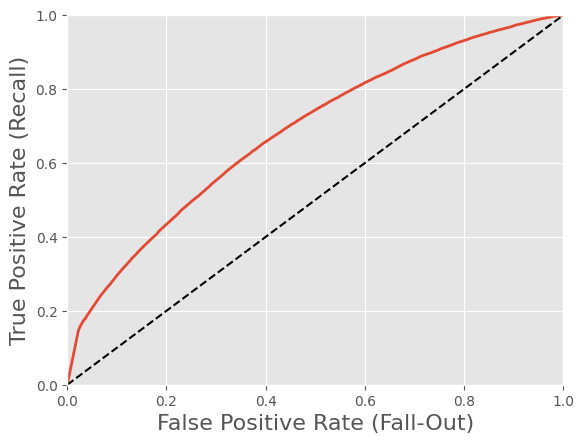

In [861]:
plot_roc_curve(fpr, tpr)

In [862]:
roc_auc_score(results_ADA_Val["HasDetections"],results_ADA_Val["HasDetections_Probability"])

0.6838267053888503

## 5.4 Gradient BOOST

In [863]:
gb_clf = GradientBoostingClassifier(
   n_estimators=50,max_depth=18,
    learning_rate=0.5
    )

In [864]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=18, n_estimators=50)

In [865]:
gb_clf.feature_importances_
top_features=pd.DataFrame(gb_clf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False).head(30)
top_features

importance
Census_InternalPrimaryDiagonalDisplaySizeInInches        0.06
SmartScreen_ExistsNotSet                                 0.06
Census_PrimaryDiskTotalCapacity                          0.04
Census_TotalPhysicalRAM                                  0.04
AVProductStatesIdentifier_53447.0                        0.03
Census_InternalPrimaryDisplayResolutionHorizontal        0.02
Wdft_IsGamer                                             0.02
Census_InternalPrimaryDisplayResolutionVertical          0.01
OrganizationIdentifier_27.0                              0.01
OrganizationIdentifier_Other                             0.01
AvSigVersion_1.273                                       0.01
AppVersion_4.18                                          0.01
AvSigVersion_1.275                                       0.01
OrganizationIdentifier_18.0                              0.01
OSBuildRevisionGroup_Común                               0.01
Census_IsSecureBootEnabled                               0.01
Census_SystemVolumeTotalCapacity_Mediana                 0.01
LocaleEnglishNameIdentifier_Other                        0.01
OSBuildRevisionGroup_Otras                               0.01
SmartScreen_RequireAdmin                                 0.01
Wdft_RegionIdentifier_1.0                                0.01
TopFirmwareManufacturer_628.0                            0.01
InstallTypeGroup_Actualización                           0.01
Wdft_RegionIdentifier_11.0                               0.01
Wdft_RegionIdentifier_10.0                               0.01
TopFirmwareManufacturer_Otros                            0.01
Census_HasOpticalDiskDrive                               0.01
Wdft_RegionIdentifier_Other                              0.01
OSBuildRevisionGroup_Antigua                             0.01
OSBuildRevisionGroup_Actualizada                         0.01

Feature importance

<Axes: >

<Figure size 1500x500 with 0 Axes>

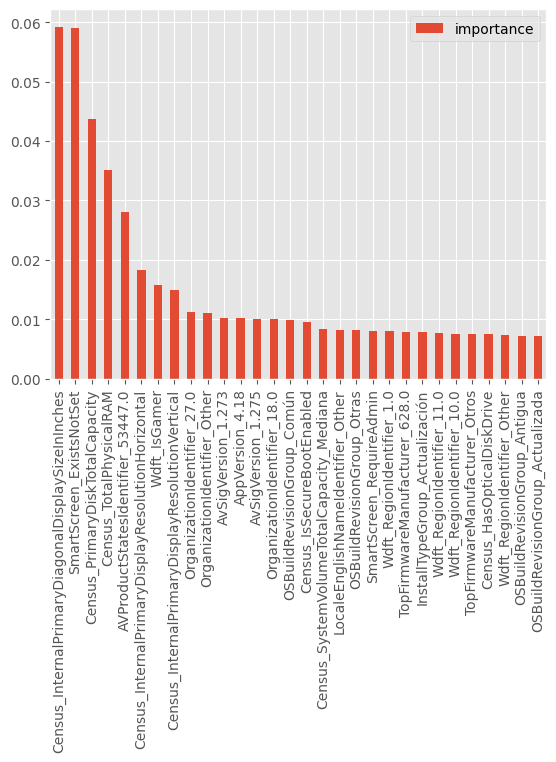

In [866]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

### Evaluation del Modelo Gradientboosting

### Accuracy

In [867]:
#Calculamos Predicciones y lo one,o en un dataframe
y_test_pred_GB= pd.DataFrame(gb_clf.predict(X_test),index=X_test.index,columns=["HasDetections_Prediction"])

In [868]:
y_test_pred_GB.head()

HasDetections_Prediction
MachineIdentifier                                         
f1cd864e97bae82bdf96523e1a539121                         1
503ff9f5e17315afd880eb6745316439                         0
9f96b12839d8aaf7c99fbf0994068991                         1
f19590026b4ad771e96978d43e6dc36b                         1
530a786e01c95d309fed558dee2b171c                         0

In [869]:
y_test_Dataframe= pd.DataFrame(y_test,index=X_test.index,columns=["HasDetections"])

In [870]:
y_test.head()

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    1
503ff9f5e17315afd880eb6745316439    0
9f96b12839d8aaf7c99fbf0994068991    1
f19590026b4ad771e96978d43e6dc36b    1
530a786e01c95d309fed558dee2b171c    1
Name: HasDetections, dtype: int64

In [871]:
results_GB = pd.concat([y_test, y_test_pred_GB], axis=1)

In [872]:
results_GB.head()

HasDetections  HasDetections_Prediction
MachineIdentifier                                                        
f1cd864e97bae82bdf96523e1a539121              1                         1
503ff9f5e17315afd880eb6745316439              0                         0
9f96b12839d8aaf7c99fbf0994068991              1                         1
f19590026b4ad771e96978d43e6dc36b              1                         1
530a786e01c95d309fed558dee2b171c              1                         0

In [873]:
results_GB["Sucess"]=results_GB["HasDetections"]==results_GB["HasDetections_Prediction"].astype(int)

In [874]:
results_GB["Sucess"].value_counts()

Sucess
True     24285
False    15715
Name: count, dtype: int64

In [875]:
#porcentaje de aciertos
results_GB["Sucess"].value_counts(normalize=True)

Sucess
True    0.61
False   0.39
Name: proportion, dtype: float64

El porcentaje de acierto del modelo es de 63% respecto al modelo basico del 50%


### Confusion Matrix

In [876]:
Confusion_Matrix_GB = metrics.confusion_matrix(y_test, y_test_pred)
Confusion_Matrix_GB

array([[17665,  2260],
       [17736,  2339]])

In [877]:
#True Positives
TP=Confusion_Matrix_GB[1,1]
TP

2339

In [878]:
#True Negatives
TN=Confusion_Matrix_GB[0,0]
TN

17665

In [879]:
#False Positives
FP=Confusion_Matrix_GB[0,1]
FP

2260

In [880]:
#False Negatives
FN=Confusion_Matrix_GB[1,0]
FN

17736

In [881]:
#Precision = TP / (TP + FP)
Precision=TP/(TP+FP)
Precision

0.5085888236573168

In [882]:
#Recall = TP / (TP + FN)
Recall=TP/(TP+FN)
Recall

0.11651307596513076

In [883]:
#Verifica de las metricas
print("la precision es: ", precision_score(y_test, y_test_pred))
print("el recall es: ", recall_score(y_test, y_test_pred))
#print(metrics.classification_report(y_test, y_test_pred))

la precision es:  0.5085888236573168
el recall es:  0.11651307596513076


##### Probabilidad de acierto

In [884]:
y_score_GB = pd.DataFrame(gb_clf.predict_proba(X_test)[:,1],index=X_test.index,columns=["HasDetections_Probability"])

In [885]:
y_score_GB.head()

HasDetections_Probability
MachineIdentifier                                          
f1cd864e97bae82bdf96523e1a539121                       0.53
503ff9f5e17315afd880eb6745316439                       0.06
9f96b12839d8aaf7c99fbf0994068991                       0.99
f19590026b4ad771e96978d43e6dc36b                       1.00
530a786e01c95d309fed558dee2b171c                       0.13

In [886]:
results_GB

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121              1                         1   
503ff9f5e17315afd880eb6745316439              0                         0   
9f96b12839d8aaf7c99fbf0994068991              1                         1   
f19590026b4ad771e96978d43e6dc36b              1                         1   
530a786e01c95d309fed558dee2b171c              1                         0   
...                                         ...                       ...   
99ab8ff0c6d6b347d8a4ce3141f5f225              1                         1   
5095d4649f1019b58ae82956653ff6e0              0                         1   
a739cacc292f3f1e745827c1ca6c6ada              0                         0   
fd16cd542d660848d272e4552bcccb1e              0                         1   
7b45dc3537e17f16305c5983ca0a1cb9              1                         1   

                                  Sucess  
MachineIdentifier                         
f1cd864e97bae82bdf96523e1a539121    True  
503ff9f5e17315afd880eb6745316439    True  
9f96b12839d8aaf7c99fbf0994068991    True  
f19590026b4ad771e96978d43e6dc36b    True  
530a786e01c95d309fed558dee2b171c   False  
...                                  ...  
99ab8ff0c6d6b347d8a4ce3141f5f225    True  
5095d4649f1019b58ae82956653ff6e0   False  
a739cacc292f3f1e745827c1ca6c6ada    True  
fd16cd542d660848d272e4552bcccb1e   False  
7b45dc3537e17f16305c5983ca0a1cb9    True  

[40000 rows x 3 columns]

In [887]:

results_GB= results_GB.join(y_score_GB, how='left')

results_GB.head()

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121              1                         1   
503ff9f5e17315afd880eb6745316439              0                         0   
9f96b12839d8aaf7c99fbf0994068991              1                         1   
f19590026b4ad771e96978d43e6dc36b              1                         1   
530a786e01c95d309fed558dee2b171c              1                         0   

                                  Sucess  HasDetections_Probability  
MachineIdentifier                                                    
f1cd864e97bae82bdf96523e1a539121    True                       0.53  
503ff9f5e17315afd880eb6745316439    True                       0.06  
9f96b12839d8aaf7c99fbf0994068991    True                       0.99  
f19590026b4ad771e96978d43e6dc36b    True                       1.00  
530a786e01c95d309fed558dee2b171c   False                       0.13

### F1 Score

In [888]:
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score=2*(Precision*Recall)/(Precision+Recall)
F1_Score

0.18959228337521278

In [889]:
#Verifica de las metricas
f1_score(y_test, y_test_pred)

0.18959228337521278

### ROC Curve and ROC score

In [890]:
fpr, tpr, thresholds = metrics.roc_curve(results_GB["HasDetections"],results_GB["HasDetections_Probability"])

In [891]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

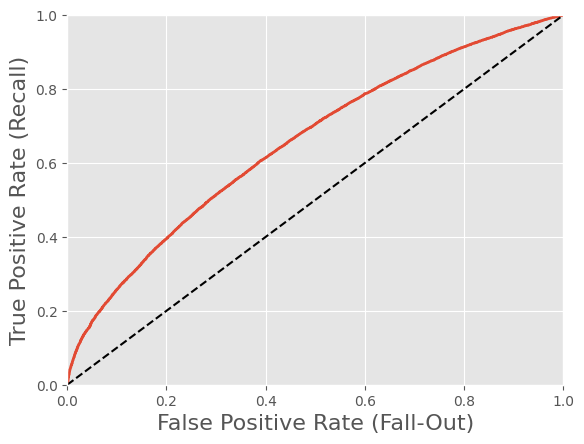

In [892]:
plot_roc_curve(fpr, tpr)

In [893]:
roc_auc_score(y_test, y_test_pred)

0.501543865460608

### Tuning el modelo RandomForest: Overfitting y Crossvalidation

Búsqueda del parametro max_depht: analizamos el score entre train y test en función del max_depth del árbol. cuando la diferencia entre train y test sea mayor a 1%, paramos las preguntas, ya que el modelo presentará overfitting

In [ ]:
for i in range(1,10,1):
    model_overfit = GradientBoostingClassifier(n_estimators=50,max_depth=i, learning_rate=0.5,random_state=42)
    model_overfit.fit(X_train, y_train)
    acc_train=model_overfit.score(X_train, y_train)
    acc_test=model_overfit.score(X_test, y_test)
    acc_val=model_overfit.score(val_X, val_y)
    print("Para max_depth= ", i, " el accuracy de train es: ", round(acc_train,3), " el accuracy de test es: ", round(acc_test,3), "y el accuracy en validation es:", round(acc_val,3), "el overfitting es", round(acc_train-acc_test,3))

Podemos decir que a partir de 6,7 preguntas o (max depth) el modelo empieza hacer overfitting

##### Busqueda del parametro min_samples_split.

In [ ]:
for i in np.arange(0.1, 1.0, 0.1):
    model_overfit = gb_clf = GradientBoostingClassifier(n_estimators=50,max_depth=5, learning_rate= i,random_state=42)
    model_overfit.fit(X_train, y_train)
    acc_train = model_overfit.score(X_train, y_train)
    acc_test = model_overfit.score(X_test, y_test)
    acc_val=model_overfit.score(val_X, val_y)
    print("learning_rate= ", i , " el accuracy de train es: ", round(acc_train,3), " el accuracy de test es: ", round(acc_test,3), "y el accuracy en validation es:", round(acc_val,3), "el overfitting es", round(acc_train-acc_test,3))

El learning rate lo dejamos a 0.1

##### Analizamos el numero de estimators

In [ ]:
for n_estimators in range(50, 100, 10):
   model_overfit= GradientBoostingClassifier(n_estimators=n_estimators ,max_depth=5, learning_rate=0.1,random_state=42)
   model_overfit.fit(X_train, y_train)
   acc_train = model_overfit.score(X_train, y_train)
   acc_test = model_overfit.score(X_test, y_test)
   acc_val=model_overfit.score(val_X, val_y)
   print("n_estimators= ", n_estimators, " el accuracy de train es: ", round(acc_train,3), " el accuracy de test es: ", round(acc_test,3), "y el accuracy en validation es:", round(acc_val,3), "el overfitting es", round(acc_train-acc_test,3))

El numero de estimadores no influencia el resultado, lo dejamos a 50

### Gradient Boost con Kfold Validation

In [894]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [895]:
scores_list = []
for train_index, test_index in kf.split(df_Train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_X.iloc[train_index], dev_X.iloc[test_index]
    y_train, y_test = dev_y.iloc[train_index], dev_y.iloc[test_index]
    gb_clf = GradientBoostingClassifier(n_estimators=50,max_depth=5, learning_rate=0.1,random_state=42)
    dt.fit(X_train, y_train)
    _score = dt.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

[0.569825,
 0.572875,
 0.568425,
 0.572775,
 0.57045,
 0.570925,
 0.573525,
 0.57445,
 0.5713,
 0.570575]

In [896]:
np.mean(scores_list)

0.5715125

In [897]:
np.std(scores_list)

0.0017580617878789147

### Gradient Boost con los datos de Validation

In [898]:
gb_clf = GradientBoostingClassifier(n_estimators=50,max_depth=5, learning_rate=0.1,random_state=42)

In [899]:
#Model fit
gb_clf.fit(val_X, val_y)

GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42)

In [900]:
gb_list_val = gb_clf.estimators_

In [901]:
gb_clf.score(val_X, val_y)

0.63999

###Feature importance

In [904]:

gb_clf = GradientBoostingClassifier()
gb_clf.fit(train_X, train_y)


top_features = pd.DataFrame(
    gb_clf.feature_importances_,
    index=val_X.columns,
    columns=['importance']
).sort_values('importance', ascending=False).head(20)


print(top_features)


NameError: name 'train_X' is not defined

In [ ]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

### Evaluacion del Modelo

##### Accuracy

In [905]:
#Calculamos Predicciones y lo one,o en un dataframe
y_val_pred= pd.DataFrame(gb_clf.predict(val_X),index=val_X.index,columns=["HasDetections_Prediction"])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [906]:
y_val_pred.head()

HasDetections_Prediction
MachineIdentifier                                         
376b1fe19f829bfc78e8bd91999ced44                         1
2db9d75a5375c95a83cadc4a84f3471c                         1
6f19c858baf1553e7871f51586784410                         0
8dfd5f486ca1abf8e568f3e5401319c1                         0
7a3436e946c709447348ed70c0fbf5c7                         1

In [907]:
y_val_Dataframe= pd.DataFrame(val_y,index=val_X.index,columns=["HasDetections"])

In [908]:
val_y.head()

MachineIdentifier
376b1fe19f829bfc78e8bd91999ced44    1
2db9d75a5375c95a83cadc4a84f3471c    1
6f19c858baf1553e7871f51586784410    0
8dfd5f486ca1abf8e568f3e5401319c1    0
7a3436e946c709447348ed70c0fbf5c7    1
Name: HasDetections, dtype: int64

In [909]:
results_GB_Val = pd.DataFrame(pd.concat([val_y, y_val_pred], axis=1))
results_GB_Val.head()

HasDetections  HasDetections_Prediction
MachineIdentifier                                                        
376b1fe19f829bfc78e8bd91999ced44              1                         1
2db9d75a5375c95a83cadc4a84f3471c              1                         1
6f19c858baf1553e7871f51586784410              0                         0
8dfd5f486ca1abf8e568f3e5401319c1              0                         0
7a3436e946c709447348ed70c0fbf5c7              1                         1

In [910]:
results_GB_Val["Sucess"]=results_GB_Val["HasDetections"]==results_GB_Val["HasDetections_Prediction"].astype(int)

In [911]:
results_GB_Val["Sucess"].value_counts()
results_GB_Val

HasDetections  HasDetections_Prediction  \
MachineIdentifier                                                           
376b1fe19f829bfc78e8bd91999ced44              1                         1   
2db9d75a5375c95a83cadc4a84f3471c              1                         1   
6f19c858baf1553e7871f51586784410              0                         0   
8dfd5f486ca1abf8e568f3e5401319c1              0                         0   
7a3436e946c709447348ed70c0fbf5c7              1                         1   
...                                         ...                       ...   
4b56ae3d1050aff7e898ed8dd22e5028              0                         0   
f2b5a8557af5d1987d76d2e6fb026c0f              1                         1   
12e50047852ad0face417a4367cf2578              1                         0   
d886e3ffb04ddeca3bf122834a5c9d7e              0                         0   
23433f52a6b23874ae99fc3f50bbbd89              1                         1   

                                  Sucess  
MachineIdentifier                         
376b1fe19f829bfc78e8bd91999ced44    True  
2db9d75a5375c95a83cadc4a84f3471c    True  
6f19c858baf1553e7871f51586784410    True  
8dfd5f486ca1abf8e568f3e5401319c1    True  
7a3436e946c709447348ed70c0fbf5c7    True  
...                                  ...  
4b56ae3d1050aff7e898ed8dd22e5028    True  
f2b5a8557af5d1987d76d2e6fb026c0f    True  
12e50047852ad0face417a4367cf2578   False  
d886e3ffb04ddeca3bf122834a5c9d7e    True  
23433f52a6b23874ae99fc3f50bbbd89    True  

[100000 rows x 3 columns]

In [912]:
#porcentaje de aciertos
results_GB_Val["Sucess"].value_counts(normalize=True)

Sucess
True    0.63
False   0.37
Name: proportion, dtype: float64

El porcentaje de acierto del modelo es de 65% respecto al modelo basico del 50%

##### Confusion Matrix

In [913]:
Confusion_Matrix_VAl = metrics.confusion_matrix(val_y, y_val_pred)
Confusion_Matrix_VAl

array([[30878, 19100],
       [18035, 31987]])

In [914]:
#True Positives
TP=Confusion_Matrix_VAl[1,1]
TP

31987

In [915]:
#True Negatives
TN=Confusion_Matrix_VAl[0,0]
TN

30878

In [916]:
#False Positives
FP=Confusion_Matrix_VAl[0,1]
FP

19100

In [917]:
#False Negatives
FN=Confusion_Matrix_VAl[1,0]
FN

18035

In [918]:
# el modelo indica detecta el malware el 49 como en el caso de los datos de test
(TP+FP)/len(results_RF_Val)

0.51087

In [919]:
#Precision = TP / (TP + FP)
Precision=TP/(TP+FP)
Precision

0.6261279777634232

In [920]:
#Recall = TP / (TP + FN)
Recall=TP/(TP+FN)
Recall

0.6394586381991924

In [921]:
#Verifica de las metricas
print("la precision es: ", precision_score(val_y, y_val_pred))
print("el recall es: ", recall_score(val_y, y_val_pred))
#print(metrics.classification_report(y_test, y_test_pred))

la precision es:  0.6261279777634232
el recall es:  0.6394586381991924


##### Probabilidad de acierto

In [922]:
y_score_val = pd.DataFrame(gb_clf.predict_proba(val_X)[:,1],index=val_X.index,columns=["HasDetections_Probability"])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_score_val.head()

In [ ]:

results_GB_Val= results_GB_Val.join(y_score_val, how='left')

results_GB_Val.head()

##### F1 Score

In [ ]:
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score=2*(Precision*Recall)/(Precision+Recall)
F1_Score

In [ ]:
f1_score(val_y, y_val_pred)

In [ ]:
#Verifica de las metricas
f1_score(val_y, y_val_pred)

##### ROC Curve and ROC score

In [ ]:
results_GB_Val.head()

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(results_GB_Val["HasDetections"],results_GB_Val["HasDetections_Probability"])

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score(results_GB_Val["HasDetections"],results_GB_Val["HasDetections_Probability"])

# 6. Resumen

 1. Importacion de Datos y Librearías.

- Se cargan las librerías necesarias para análisis y modelado.
- Se importa un dataset con 500,000 filas y 84 columnas, de las cuales:
  - 54 son numéricas.
  - 30 son categóricas.
- La variable objetivo (Target) es HasDetections (booleana: 0 o 1).
- El dataset está balanceado, con 50% de cada clase.

2. Limpieza y Procesamiento de Datos

- Se eliminan columnas con una gran cantidad de valores nulos (>200,000).
- Se eliminan columnas con baja variabilidad.
- Se reducen variables numéricas con alta correlación entre sí.
 -Se convierten variables categóricas a numéricas mediante One-Hot Encoding (OHE).

 3. Modelado y Evaluación.

- Se entrenan tres modelos de clasificación:

  - Random Forest
  - AdaBoost
  - Gradient Boosting (GBoost)

Cada modelo se evalúa con métricas como:

- Precisión (Accuracy)
- ROC-AUC Score
- Tiempo de entrenamiento

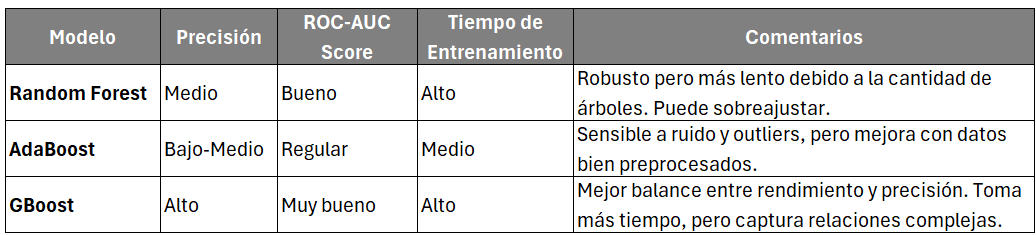

4. Conclusión.

- GBoost es el mejor modelo en términos de precisión y ROC-AUC, aunque con un mayor costo computacional.

- Random Forest es una opción estable, pero más lento y propenso a sobreajuste.

- AdaBoost puede no ser la mejor opción para este dataset debido a su menor precisión.


